### Idea 
#### search for songs that contain the name of the 5 biggest cities in each state
- Get the list of the 5 biggest cities from each state (wikipedia)
- search for occurences of the city name in the lyrics of songs (lyrics.com)
- clean up the table

In [36]:
from requests import get
import glob
import pandas as pd
from bs4 import BeautifulSoup
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from time import sleep
from random import randint

In [37]:
response = get("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")
html_soup = BeautifulSoup(response.text, 'html.parser')
states = html_soup.find_all("tr")

In [38]:
names_states =[]
names_cities =[]

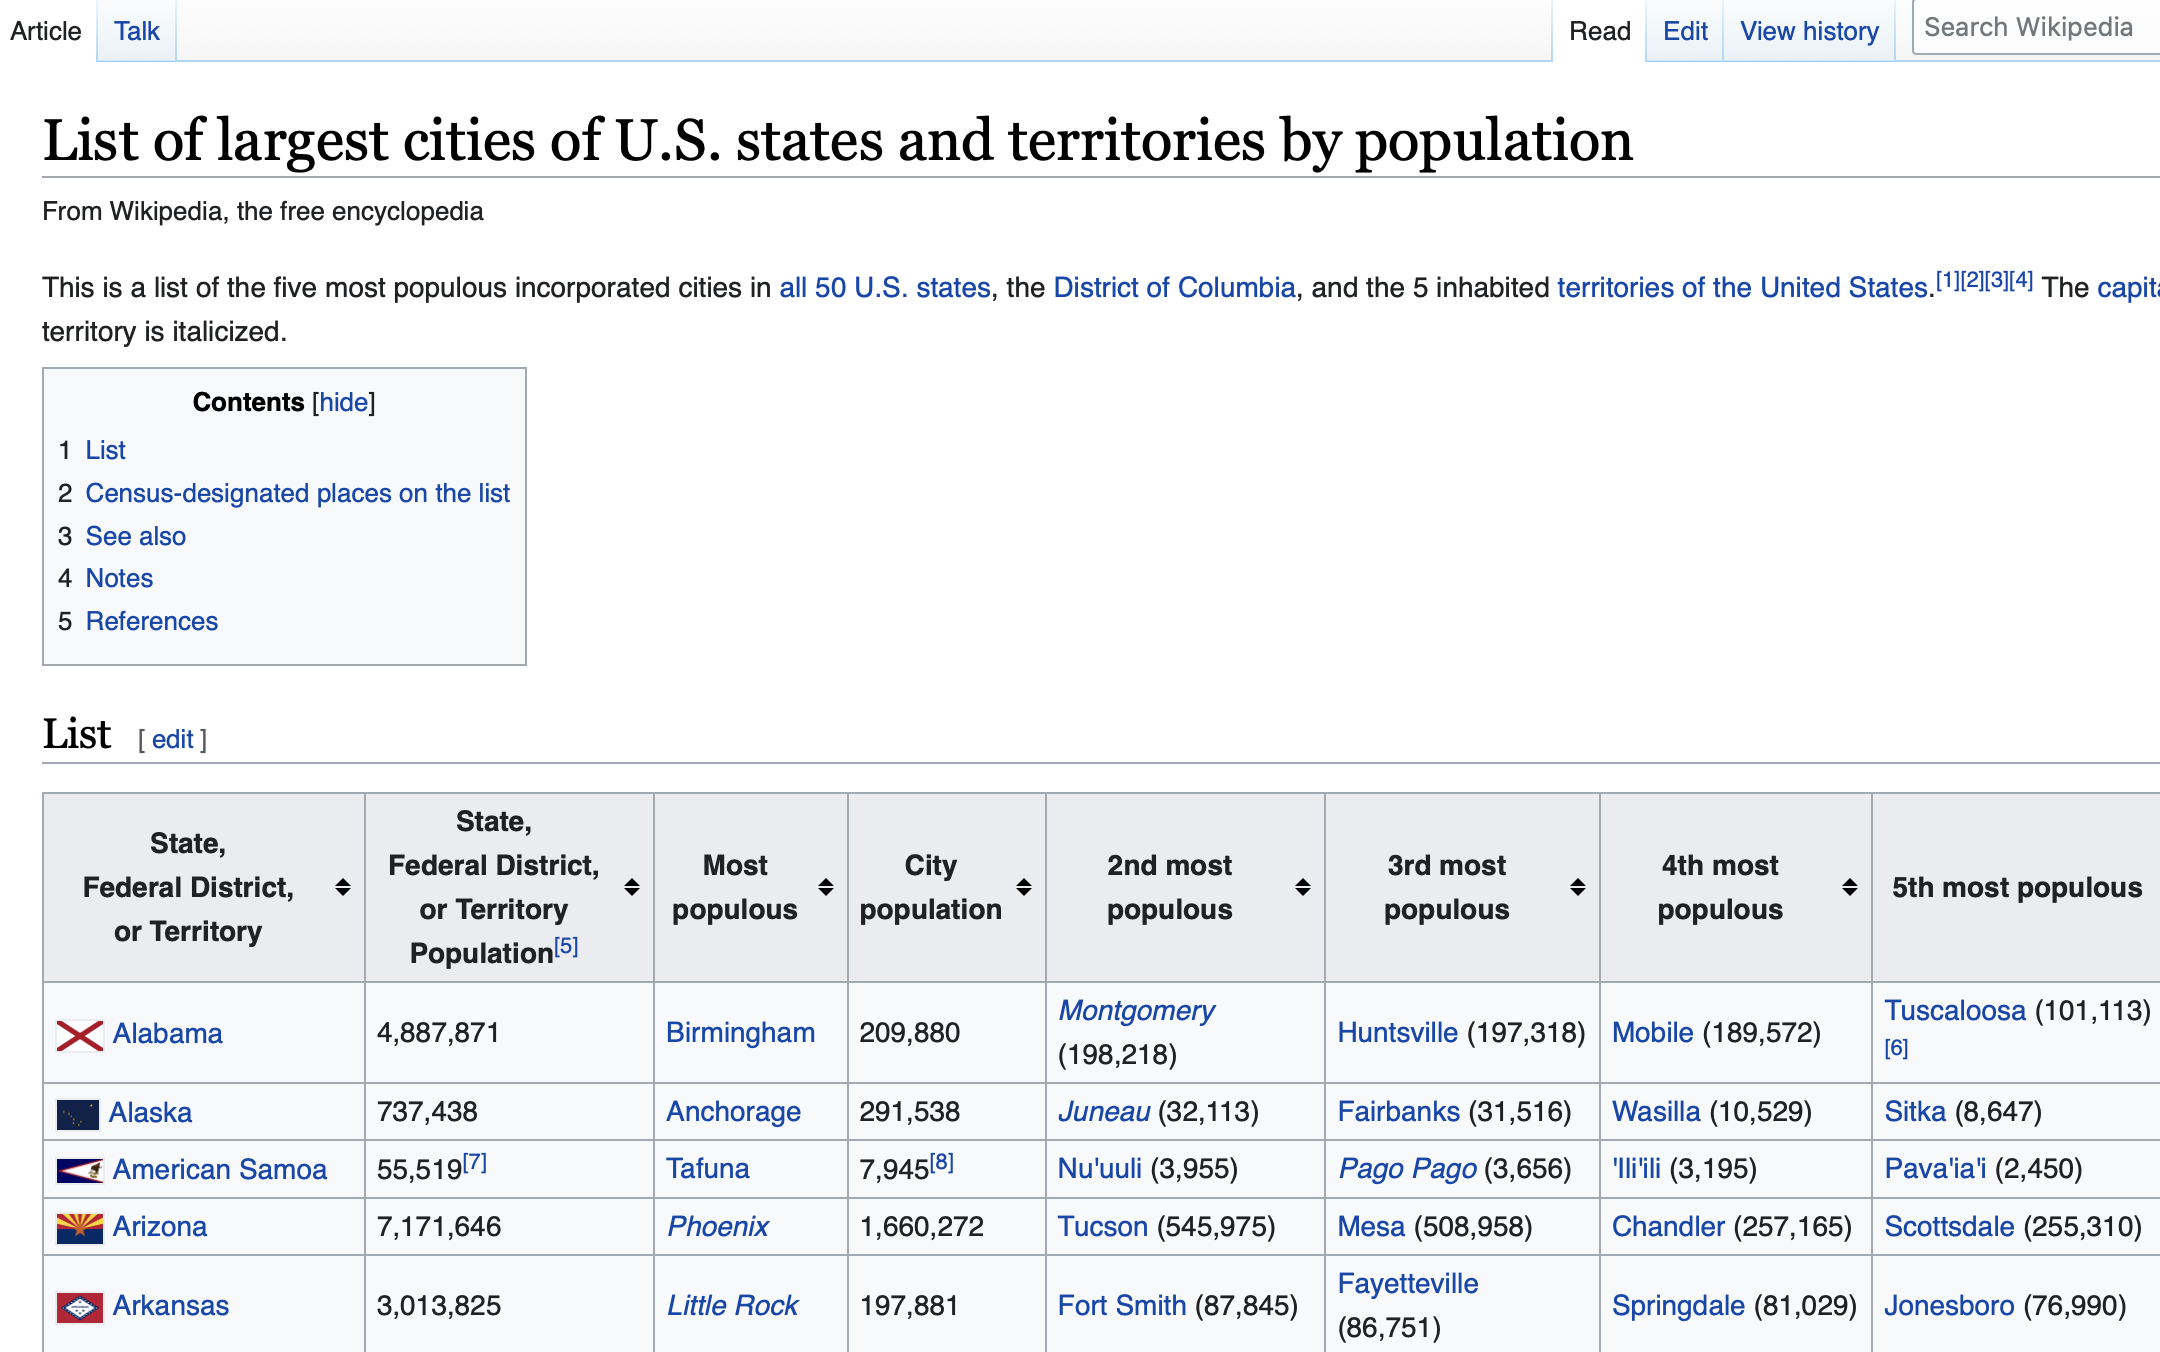

In [39]:
for state in states[1:57]:
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[0].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[2].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[4].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[5].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[6].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[7].text.split("(")[0].strip())
    
    if len(state.find_all("td")[-1])>=3:
        names_states.append(state.find_all("td")[0].text.strip())
        names_cities.append(state.find_all("td")[-1].text.split("(")[0].strip())
    

In [40]:
song_city = []
song_state = []
song_name =[]
song_artist =[]
curr_state = names_states[0]

In [41]:
def song_name_scraper(city,state):
    response = get("https://www.lyrics.com/lyrics/"+city)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    if len(html_soup.find_all("div",class_ ="pager"))>0:
        number_pages = int(html_soup.find_all("div",class_ ="pager")[-1].find_all("a")[-1].text)
    else:
        number_pages=1
    
    for page_no in range(1,number_pages+1):
        response = get("https://www.lyrics.com/lyrics/"+city+"&p="+str(page_no))
        html_soup = BeautifulSoup(response.text, 'html.parser')
        page = html_soup.find_all("div",class_ ="lyric-meta within-lyrics")
        for entry in page:
            print(city,page_no,entry.find_all("p")[0].text)
            song_city.append(city)
            song_state.append(state)
            song_name.append(entry.find_all("p")[0].text)
            song_artist.append(entry.find_all("p")[1].text)

        sleep(randint(1,2))

In [56]:
for count,city in enumerate(names_cities[204:]):
    state = names_states[count+204]
    if state!=curr_state:
        data = pd.DataFrame({"city":song_city,
              "state":song_state,
             "artist":song_artist,
              "song":song_name
             })
        data.drop_duplicates()
        data.to_csv("./songs_lyrics/"+str(curr_state)+".csv")
        curr_state = state
        song_city = []
        song_state = []
        song_name =[]
        song_artist =[]

    
    song_name_scraper(city,state)

data = pd.DataFrame({"city":song_city,
              "state":song_state,
             "artist":song_artist,
              "song":song_name
             })
data.drop_duplicates()
data.to_csv("./songs_lyrics/"+str(curr_state)+".csv")

New York 1 Streets of New York (City Life) [[Remix]]
New York 1 Where It Started At (NY)
New York 1 Streets of New York (City Life)
New York 1 New York
New York 1 New York
New York 1 New York Is Rockin'
New York 1 Rock City
New York 1 New York [Remix]
New York 1 New York!!
New York 1 New York City
New York 1 New York Shit
New York 1 Come Get everything
New York 1 I Love New York/New York, New York
New York 1 New York
New York 1 Pop Muzik [Pop Mart Mix]
New York 1 Welcome To New York
New York 1 Stress Ya
New York 1 New York Times
New York 1 Streets of New York (City Life) [DVD]
New York 1 Safe in New York City
New York 1 All the Critics Love U in New York
New York 1 All the Critics Love U in New York
New York 1 New York City
New York 1 Big City of Dreams
New York 2 New York, New York
New York 2 New York Medley: New York, New York/New York, New York
New York 2 Stress Ya
New York 2 New York Medley: New York, New York/New York, New York
New York 2 New York Medley: New York, New York/New Yo

New York 12 I Happen to Like New York
New York 12 New York Fever
New York 12 Sunday in New York
New York 12 Another Lonely Night in New York
New York 12 2 Your Streets
New York 12 New York State Of Mind
New York 12 NYC Beat
New York 12 NYC Beat
New York 12 NYC Beat
New York 12 La Nuova Stella di Broadway
New York 12 Open Letter to NYC [Acappella]
New York 12 A Star Is Born
New York 12 A Star Is Born
New York 12 New York State Of Mind
New York 12 New York State of Mind
New York 12 New York City
New York 12 No. New York
New York 12 纽约纽约
New York 12 Jamaican in New York
New York 12 New York, New York
New York 12 New York, New York
New York 12 New York, New York
New York 12 New York New York
New York 12 El Que No Salta Es Paco
New York 13 뉴욕 New York
New York 13 Down and Out in New York City
New York 13 The New Face of Zero and One
New York 13 New York, New York, New York
New York 13 Englishman In New-York
New York 13 No. New York
New York 13 Cocaine in My Brain
New York 13 A Heart in New 

New York 24 King Of New York
New York 24 New York State of Mind
New York 24 King of NY
New York 24 On the Sidewalks of New York
New York 24 Strong Enough
New York 24 King of N.Y.
New York 24 Wake Up
New York 24 The Boy from New York City
New York 24 NYC (There's No Need to Stop)
New York 24 New York Morning
New York 24 Mi Novia
New York 24 An Englishman In New York
New York 24 Un Fait Diver et Rien de Plus
New York 24 New York, Rio, Rosenheim
New York 24 Englishman In New York
New York 24 New York State of Mind
New York 24 The City
New York 24 Too Dumb for New York City
New York 24 Gotta Be There
New York 24 This Land Is Your Land
New York 24 90 's Flow
New York 24 Wake Up
New York 24 She Don't Really Care/1 Luv
New York 24 New New York
New York 25 Native New Yorker
New York 25 NYC
New York 25 New York Raining
New York 25 Arthur's Theme (Best That You Can Do)
New York 25 New York State Of Mind
New York 25 Daddy Don't Live in That New York City No More
New York 25 Money [Previously Unre

New York 35 Arthur's Theme (Best That You Can Do)
New York 35 Arthur's Theme (Best That You Can Do)
New York 35 Arthur's Theme
New York 35 Arthur's Theme
New York 35 R.I.P. Barneys
New York 35 If Heaven Ain't a Lot Like Dixie
New York 35 If I Ever Get Back to Georgia
New York 35 Stayin' Alive
New York 35 Got A Little Country
New York 35 Money Over Bitches
New York 35 She Sets The City On Fire
New York 35 New York Broken Toy
New York 35 December In New York
New York 35 Cathedrals
New York 35 Build Me a Girl
New York 35 Respiration
New York 35 Good Hit
New York 35 Thug Style
New York 35 Thug Style
New York 35 Love It or Leave It Alone/Welcome to Jamrock
New York 35 1970 Somethin'
New York 35 Chill
New York 35 On the Floor
New York 35 Big Noise, New York
New York 36 Air Algiers
New York 36 Real Women
New York 36 SWIZZMONTANA
New York 36 Up
New York 36 New York [DVD]
New York 36 Rock & Roll
New York 36 Rock & Roll
New York 36 Rock & Roll
New York 36 NY2LA
New York 36 In a New York Second
N

New York 47 Toy Soldier
New York 47 NYC's Like a Graveyard
New York 47 Winter in New York
New York 47 New York
New York 47 Keep It Low
New York 47 Slow-Mo In New York
New York 47 冷たいミルク
New York 47 トゥナイト
New York 47 Lady Close
New York 47 Black Jesus + Amen Fashion
New York 47 Levon
New York 47 Award Tour
New York 47 Darling Lorraine
New York 47 Realest N*ggas
New York 47 All in the Name of Rock 'n' Roll
New York 47 Award Tour
New York 47 She Let Herself Go
New York 47 All in the Name of Rock 'N' Roll [Alternate Version; Previously Unreleased Track; Bonus Track]
New York 47 Award Tour
New York 47 Change Clothes
New York 47 Change Clothes
New York 47 Brooklyn's Finest
New York 47 Lonely Town
New York 47 Lonely Town
New York 48 Around the World
New York 48 Hard Knocks
New York 48 The Right Profile
New York 48 Orange Blossom Special
New York 48 New York City Blues
New York 48 This Land Is Your Land
New York 48 Orange Blossom Special
New York 48 Orange Blossom Special
New York 48 Glad Tidi

New York 59 Last Exit to Brooklyn [Vocal Version]
New York 59 Make a Move
New York 59 Country Girl, City Man (Just Across the Line)
New York 59 Sidewalks of New York
New York 59 Mister Can You Spare a Dime
New York 59 Welcome2MyWorld
New York 59 My God
New York 59 Darlington County
New York 59 It's a Great Day for the Irish
New York 59 Vaca Profana
New York 59 Bright Lights [Bonus Track]
New York 59 When You Got Good Friends
New York 59 The Hollywood Dream
New York 59 Orange Blossom Special
New York 59 Westside Story
New York 59 On the Floor (Ven a Bailar) [Spanish Version]
New York 59 Westside Story
New York 59 The Crown
New York 59 This Land Is Your Land
New York 59 This Land Is Your Land
New York 59 Pest Control
New York 59 Breaking My Wrist
New York 59 LA Who Am I To Love You
New York 59 North American Scum [Onanistic Dub]
New York 60 New York Ripper
New York 60 Turn This Mutha Out
New York 60 My Secret Place
New York 60 Let's Fly Away
New York 60 It's a Great Day for the Irish
New

New York 71 Strangers
New York 71 Chuck Person
New York 71 Sunset Blow
New York 71 Bury Me Dead
New York 71 Homegrown Honey
New York 71 Everyday (Amor)
New York 71 We Be Burnin' (Recognize It)
New York 71 August & Everything After
New York 71 Crisis
New York 71 GIGI (SKITTLEZ)
New York 71 Get Low [Remix]
New York 71 Je suis africain
New York 71 Vaca Profana [Ao Vivo]
New York 71 Je suis africain
New York 71 Five Guys
New York 71 Going Back to Georgia
New York 71 Snakes
New York 71 Gimme Your Money Please
New York 71 The Geographic North Pole
New York 71 Sheena Is a Punk Rocker [Single Version]
New York 71 Piss Factory
New York 71 Copa (Cabanga)
New York 71 On the Road Again
New York 71 Orange Blossom Special
New York 72 Speak Ya Clout
New York 72 On That Day
New York 72 Cradle and All
New York 72 Ragtime
New York 72 Closing Down the Park
New York 72 Moments of Pleasure [Album Version]
New York 72 So Happy [Bonus Track]
New York 72 Speak Ya Clout
New York 72 Jettin'
New York 72 Alice
Ne

New York 83 Token of My Affection
New York 83 Teufel im Blut
New York 83 Terminal Romance
New York 83 Schönste Zeit
New York 83 Tito's Back
New York 83 Sale
New York 83 Burn Out in Vegas
New York 83 No Heroes
New York 83 Everybody wants to leave
New York 83 New York
New York 83 When She Dances (Wenn sie tanzt) [Aus "Sing meinen Song, Vol. 7"]
New York 83 Wenn sie tanzt [Akustik Version]
New York 83 I Love New York
New York 83 Africa
New York 83 ABC's of New York
New York 83 New York me manque
New York 83 Amore Digitale
New York 83 Tony Yayo Explosion
New York 83 Because I Got It Like That
New York 83 Grown Man Business (Fresh Vintage Bottles)
New York 83 Because I Got It Like That
New York 83 Because I Got It Like That
New York 83 You Surround Me
New York 83 So Brooklyn
New York 84 I Come Prepared
New York 84 I Come Prepared
New York 84 2012 (It Ain't the End)
New York 84 Tonight
New York 84 L.A. River
New York 84 Oh What a World [Best Of Version]
New York 84 Happy If You're Happy
New 

New York 95 Waves of Love
New York 95 Another Night
New York 95 Der goldene Tisch
New York 95 Bug (S)
New York 95 Down on the Farm
New York 95 It's a Texas Christmas
New York 95 Globetrotter
New York 95 All the Time
New York 95 New York
New York 95 Ecker's Last Stand
New York 95 YAS
New York 95 Stoned on the One
New York 95 Girl from New York
New York 95 Fresh out of Air
New York 95 The Hammer and the Nail
New York 95 Hjardemål klit
New York 95 Christmas in New York
New York 95 911 [Remix]
New York 95 No Remedy
New York 95 R&R Air Mail
New York 95 Equalizer [Demo]
New York 95 I Like Me Better [(TRU Concept Remix)]
New York 95 Anh Không Phải Hotboy
New York 95 Out The Window
New York 96 I Like Me Better [(Cheat Codes Remix)]
New York 96 Sundays in New York
New York 96 Posmo
New York 96 I.G.Y. (What a Beautiful World)
New York 96 Baby Please
New York 96 Daddy Jinx
New York 96 Rebound
New York 96 Hood to Hood
New York 96 Glitter in a Void (Single Version)
New York 96 The Likes of You
New 

New York 107 Get Up Offa That Thing (Release the Pressure)
New York 107 Dancing In The Street
New York 107 Dancing In The Street
New York 107 Rup Rup (Bad Inna Real Life)
New York 107 Rap Millionaire
New York 107 Poke It Out
New York 107 Now's the Time
New York 107 Intro
New York 107 Murdergram
New York 107 How About You?
New York 107 How About You?
New York 107 Save the Life of My Child
New York 107 One More Town
New York 107 Jeru
New York 107 How About You?
New York 107 How About You?
New York 107 Jeru
New York 107 Then, Now and Until the End
New York 107 Scenario
New York 107 8 Million Stories
New York 107 Trudy
New York 107 Voodoo Chile
New York 107 Psycho Daisies
New York 107 Trudy
New York 108 How About You?
New York 108 One More Chance
New York 108 Talk to Me Fiddle
New York 108 Scenario
New York 108 Elected
New York 108 Jeru
New York 108 How About You?
New York 108 Jeru
New York 108 Elected
New York 108 Voodoo Chile
New York 108 Holy Ground
New York 108 How About You
New York 1

New York 120 Pass That Dutch
New York 120 Thumbin' a Ride
New York 120 Texas (When I Die)
New York 120 Empire State Express
New York 120 Twistin' the Night Away
New York 120 It's Tricky
New York 120 Airmail Special
New York 120 Twisting the Night Away
New York 120 Devil in a Sleeping Bag
New York 120 Tennessee Homesick Blues
New York 120 Electric Relaxation
New York 120 Steve Biko (Stir It Up)
New York 120 4th of July, Asbury Park (Sandy)
New York 120 Chocolate City
New York 120 Just Like Tom Thumb's Blues
New York 120 Katmandu
New York 120 Homecoming
New York 120 C.R.E.A.M.
New York 120 The Boxer
New York 120 The Boxer
New York 120 It's Tricky
New York 120 Back in the U.S.A.
New York 120 Back in the U.S.A.
New York 120 Havana Moon
New York 121 Twistin' the Night Away
New York 121 When the Whip Comes Down
New York 121 One
New York 121 Coming of Age
New York 121 Undercover of the Night
New York 121 East St. Louis Blues (Fare Thee Well)
New York 121 Silver and Gold [Live]
New York 121 An

New York 132 Wish You Would
New York 132 The Crackhouse
New York 132 Pregnant
New York 132 Pregnant
New York 132 Marry the Night
New York 132 Dope Boys
New York 132 Wish You Would
New York 132 Pregnant
New York 132 Edge of a Revolution
New York 132 Anytime
New York 132 Just Another Day
New York 132 Fruitcakes
New York 132 Wish You Would
New York 132 Everybody Rise Again
New York 132 Roots
New York 132 Mourn You Til I Join You [Radio Edit]
New York 132 Man Down
New York 132 The Tenth World
New York 132 Silly Watch
New York 132 Original Lyrics
New York 132 A Life in the Day of Benjamin André (Incomplete)
New York 132 Control
New York 132 The Autograph
New York 132 Don't Stop
New York 133 I Come Off
New York 133 Fancy Passes
New York 133 Can't Get Any Harder
New York 133 Boss
New York 133 Cuttin off Fingaz
New York 133 Boss
New York 133 Remedy
New York 133 In Da Club
New York 133 21 Questions
New York 133 Ultraviolence
New York 133 We Ride
New York 133 Dollar Bill
New York 133 Someone
New

New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Dancing In The Street
New York 144 Part Time Suckers
New York 144 Some People [Demo]
New York 144 The Apprentice
New York 144 Pop Muzik
New York 144 Profit
New York 144 Judgement Day
New York 144 I'm More Than Satisfied
New York 144 The G.O.D.
New York 144 Judgement Day
New York 144 One's on the Way
New York 144 Fire
New York 144 Dancing in the Street
New York 144 Christian Dior Denim Flow
New York 144 Duck
New York 144 One's on the Way
New York 144 Fire
New York 144 Doin It Well
New York 144 Watcha Gon' Do?
New York 144 Superfly
New York 144 Take It There
New York 145 Jugni Ji
New York 145 Dirty AF1s
New York 145 Balladen Om Gustaf Blom
New York 145 'Bout Ya'll
New York 145 Yoü And I
New York 145 Drumshanbo Hustle
New York 145 My Heat Goes Boom
New York 145 One World
New York 145 First Class Private Mary Brown
New York 145 Honky Tonk Women
New York 145 Country Grammar 

New York 156 Un-Hunh!
New York 156 Un-Hunh!
New York 156 Hot, Hot, Hot
New York 156 Phony Rappers
New York 156 Mason Dixie Lines
New York 156 Relax Your Mind
New York 156 Dear John Letter
New York 156 You Ain't No Gangsta
New York 156 Power of the Dollar
New York 156 I'm a Hustler
New York 156 Beware [Jay-Z Remix]
New York 156 Beware [Jay-Z Remix]
New York 156 Tear Me Down
New York 156 911
New York 156 Wake Up
New York 156 It's Real
New York 156 Thugman
New York 156 Tell 'Em
New York 156 Angels Around Me
New York 156 Ladies Night
New York 156 One Way or Another
New York 156 Nowhere to Run (Vapor Trail)
New York 156 I Wish I Made That/Swagga
New York 156 Le fils de Superman
New York 157 God Must Have Blessed America
New York 157 Country Girl
New York 157 Honky Tonk Women [Previously Unreleased Track]
New York 157 Cowboy Beat
New York 157 Thou Shalt Not
New York 157 G Style
New York 157 Ain't No Stoppin' This
New York 157 Farther I Go
New York 157 Train Kept A Rollin' [Bonus Track]
New Y

New York 169 Maria
New York 169 Big Up
New York 169 Take It in Blood
New York 169 How Hard Is It?
New York 169 Is Your God a Dog
New York 169 Is Your God a Dog
New York 169 How About You
New York 169 Symphony 2000
New York 169 Put Some Money on It
New York 169 Troublemakers
New York 169 Mastermind
New York 169 Marriage Made in Hollywood
New York 169 How About You
New York 169 Rock da Spot
New York 169 So Many Girls
New York 169 Problem
New York 169 Golden Salvation (Jesus Piece)
New York 169 Outlaw State of Mind
New York 169 I'm Dope Nigga
New York 169 Blue Ridge Mtns. (Smoky Version) [Sky Blue Version]
New York 169 Fancy
New York 169 I Feel Lucky
New York 169 I'm More Than Satisfied
New York 169 This'll Be My Year
New York 170 The New World
New York 170 Millbrook
New York 170 Playaz Club
New York 170 The Wisdom of Snow
New York 170 Old Thing Back [Matoma Remix]
New York 170 It's Okay (One Blood)
New York 170 Get Up Offa That Thing
New York 170 Bosses Speak
New York 170 The Sauce
New Y

New York 181 Transit Ride
New York 181 Face the Face
New York 181 Killa Hill Niggas
New York 181 You Got Me
New York 181 Symphony
New York 181 Wear Out the Turnpike
New York 181 Show Me What You Got
New York 181 Trying to Get Away
New York 181 This Mess We're In
New York 181 Collaboration '98
New York 181 A Little Bit Independent
New York 181 Raw Deal
New York 181 Baby Come Home
New York 181 En la Fiesta Mando Yo
New York 181 Hard Candy
New York 181 Bossman
New York 181 It Ain't Safe No More
New York 181 What Up
New York 181 Hey Ladies
New York 181 It Ain't Safe No More...
New York 181 Pussy Killz
New York 181 Goodbye Pork Pie Hat
New York 181 Y.O.U.
New York 181 Sandy (4th July, Asbury Park)
New York 182 It Ain't Safe No More
New York 182 My Long Skinny Lanky Sarah Jane
New York 182 You Got Me [Live]
New York 182 The Turn
New York 182 Twelve Thirty (Young Girls Are Coming to the Canyon)
New York 182 Real Nigga Roll Call
New York 182 Grand Finale
New York 182 Earthquake Driver
New York

New York 193 Air Mail Special [Cdb Remix]
New York 193 Outlaw
New York 193 Going Diamond
New York 193 Get Dis Money
New York 193 Yoü and I
New York 193 Sunset
New York 193 Going Diamond
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 Yoü And I
New York 193 2 Reasons
New York 193 Honky Tonk Women
New York 193 First Date
New York 193 2 Reasons
New York 193 Top of the World
New York 193 Kiss Your Ass Goodbye [Remix]
New York 193 She's Every Woman
New York 193 Shake That
New York 193 Postcards from Paris
New York 193 Dope Fiend Beat
New York 193 Shake It
New York 193 Spotlight
New York 194 It's Tricky
New York 194 Lit
New York 194 I Want It All
New York 194 4th of July, Asbury Park (Sandy)
New York 194 Freedom
New York 194 Pull Up
New York 194 Si Tu Novio Te Deja Sola
New York 194 What You Like
New York 194 That's It
New York 194 A$AP Forever
New York 194 The Boxer
New York 194 You Need Me
New York 194 This Land Is Your Land
New York

New York 206 Toe Jam
New York 206 Toe Jam
New York 206 The Bay Bridge Club
New York 206 Certified Gangsta
New York 206 Moana
New York 206 Queensfinest
New York 206 Pimp of the Nation
New York 206 Da Bridge 2001
New York 206 Our Way
New York 206 Teenage Thug
New York 206 Famous Blue Raincoat
New York 206 What Would I Do
New York 206 Cherie
New York 206 Work (Remix)
New York 206 Freestyle Doo Wop Summer Jam 96
New York 206 Mrs All American
New York 206 God It
New York 206 61 Highway
New York 206 Get Outta Town
New York 206 Girl on Fire
New York 206 Bad to Be Good
New York 206 Give Up the Goods (Just Step)
New York 206 Da Bridge 2001
New York 206 Nobody Told Me
New York 207 Coast 2 Coast
New York 207 City of Silver Dreams
New York 207 The Things That Dreams Are Made of
New York 207 The Show Goes On
New York 207 29
New York 207 Gotta Let Your Nuts Hang
New York 207 I've Got A One Way Ticket To You
New York 207 Finger
New York 207 Bright Lights
New York 207 Nigo Hilfiger
New York 207 3 Pill

New York 218 Trains
New York 218 R.A.K.I.M.
New York 218 Art Star
New York 218 Deadly Habitz
New York 218 Rawkfist
New York 218 Piece of the Road
New York 218 Wabash Cannonball
New York 218 This Land Is Your Land
New York 218 Famous Blue Raincoat
New York 218 Honky Tonk Woman
New York 218 Refuge
New York 218 Down in Tennessee
New York 218 New York Girls
New York 218 One World
New York 218 Rap de Rap Show
New York 218 Cryin' Shame
New York 218 Between the Road Signs
New York 218 Rock & Roll Weekend
New York 218 The Irish Rover
New York 218 Sutter's Mill
New York 218 NY Prophesie
New York 218 Here's Looking at You
New York 218 Bond
New York 218 Top Cat
New York 219 Yesterday Is Here
New York 219 Pass the Gat
New York 219 The Travel Jam
New York 219 Steady Bootleggin'
New York 219 When It All Began
New York 219 Mr. Tanner
New York 219 Rump Shaker
New York 219 One Step Ahead of the Blues
New York 219 You're All the World to Me
New York 219 Hold On
New York 219 3 Forties & A Bottle of Moet


New York 231 The Enemy
New York 231 Double Up
New York 231 Double Up
New York 231 Nights (Feel Like Getting Down)
New York 231 Yesterday Is Here
New York 231 Texas Swing
New York 231 Fallin'
New York 231 Rainmaster
New York 231 Mack Trucks
New York 231 Yes Yes Y'all
New York 231 Girls in Jail
New York 231 Freaks
New York 231 Get Smart
New York 231 Get Smart
New York 231 We Know
New York 231 It Ain't Nothin' Wrong With You
New York 231 Brighter Day
New York 231 More Prophet
New York 231 Good Night, New York [Previously Unreleased Track]
New York 231 Prove Something
New York 231 Country Cabin Itis
New York 231 American as Apple Pie
New York 231 Losing My Edge
New York 231 Baby U Got
New York 232 Platforms
New York 232 The Body of an American
New York 232 Travelin' Man
New York 232 I Told You
New York 232 Kung Fu
New York 232 Boogie Man
New York 232 Citizen Ship
New York 232 Daybreak
New York 232 The Show Must Go On
New York 232 This Land Is Your Land
New York 232 R.A.M.O.N.E.S.
New York 

New York 243 Blackstreet (On the Radio)
New York 243 Apollo XI
New York 243 Keep Playin' That Rock & Roll
New York 243 Monkey Business
New York 243 Amity
New York 243 What Do I Care
New York 243 Do It, See It, Be It
New York 243 Deee-Lite Theme
New York 243 Pandora's Box
New York 243 No Diggity [Das Diggity Radio]
New York 243 Back in the USA
New York 243 It Was Written (Ft. Stephen Marley, Capleton & Drag-On)
New York 243 One Day
New York 243 Pandora's Box
New York 243 The Voyager
New York 243 Ridin' Dirty
New York 243 Ridin' Dirty
New York 243 Los Angeles
New York 243 Ride Your Pony
New York 243 The Movement
New York 243 Get on Up
New York 243 Manhattan Bridge Serenade
New York 243 A Casa Mia
New York 243 The Morning After
New York 244 Satellite Blues
New York 244 Occasion Avenue
New York 244 The Science
New York 244 The Sound of the Life of the Mind
New York 244 Shoot You Down
New York 244 Wood & Leather
New York 244 Headphones
New York 244 1 Hell of a Life
New York 244 Alabaster
Ne

New York 255 Love My Hood
New York 255 Peace Sign/Index Down
New York 255 Home
New York 255 Peace Sign/Index Down
New York 255 Home
New York 255 I'm Thuggin
New York 255 Ghetto
New York 255 A Gangster and a Gentleman
New York 255 You Don't Know Me
New York 255 Love This Town
New York 255 Push It Along
New York 255 I Like That
New York 255 Riptide
New York 255 Buck Jump Time
New York 255 If You So Gangsta
New York 255 50 States Of America
New York 255 Back Again
New York 255 My Apartment
New York 255 Ain't No Click
New York 255 Are You Ready
New York 255 Suicide
New York 255 Take It to the Streets
New York 255 Wimmie Nah
New York 255 Headphones
New York 256 Dayum!
New York 256 How About You
New York 256 We Like to Party
New York 256 Paris
New York 256 36" Chain [BSBD Remix]
New York 256 Everything 4 Sale
New York 256 Reload
New York 256 Ghost Says
New York 256 Hit the Block
New York 256 Basic Cable
New York 256 Secrets in the Street
New York 256 This Is How It Sounds
New York 256 No Esc

New York 267 Hoop N Yo Face
New York 267 Good to Be on the Road Back Home
New York 267 Blood Brothers
New York 267 Outside World
New York 267 Underground Town
New York 267 Saving the Best for Last
New York 267 Thug Brothers
New York 267 Singer in the Band
New York 267 Philly
New York 267 Think Locally Fuck Globally
New York 267 Standing in My Light
New York 267 I've Grown Accustomed to Her Face
New York 267 Hey Eugene
New York 267 We Know
New York 267 Checkin' on Me
New York 267 Salvami
New York 267 Country Girls
New York 267 Big Shot
New York 267 Colors
New York 267 Smarter Than U
New York 267 Love Epidemic
New York 267 Hold It Down
New York 267 A  Brighter Day
New York 267 We in Here
New York 268 Normal Em Curitiba
New York 268 Don't Even Trip
New York 268 Like Wow-Wipeout!
New York 268 Anywhere But Here
New York 268 Reeperbahn 2011 (What It's Like)
New York 268 Judy Teen
New York 268 Death Comes Callin'
New York 268 The Ghetto
New York 268 I Feel For You
New York 268 Fast Train
New 

New York 279 Narcos
New York 279 You Don't Want Drama
New York 279 You Don't Want Drama
New York 279 These Times Are Changing
New York 279 Ooo
New York 279 Light Up Ya Lighter
New York 279 Savior
New York 279 Couldn't Get It Right
New York 279 Couldn't Get It Right
New York 279 Die Hard / Working Girl Musical Medley
New York 279 I'll Keep Ramblin'
New York 279 Da' Butt
New York 279 Take a Look (At Yourself)
New York 279 Lean Back
New York 279 America
New York 279 Doing the Slop
New York 279 Couldn't Get It Right
New York 279 Chipi-Chipi
New York 279 Da' Butt
New York 279 Grow Into A Ghost
New York 279 South
New York 279 Winter Sun
New York 279 Texas Kind Of Way
New York 279 G-Dep
New York 280 Lamb Turned Lion
New York 280 Mi Primer Millon
New York 280 Sit Here
New York 280 How About You
New York 280 Ghetto Pop Life II
New York 280 Whoa!
New York 280 How About You
New York 280 Dope House Family
New York 280 When You Gonna Drop
New York 280 That Oprah
New York 280 Wipe Me Down
New York 2

New York 291 Oh My God
New York 291 I Like That
New York 291 How Deep is Your Love
New York 291 That's Hard
New York 291 Set Up Shop
New York 291 Don't Miss Your Life
New York 291 Where You Lead
New York 291 No Diggity [Das Diggity Radio]
New York 291 We Fly High [Remix]
New York 291 Work [Remix]
New York 291 I Choose U
New York 291 Back Up
New York 291 Tú No Vive Así
New York 291 But I'm Bulletproof
New York 291 Riptide [Riptide (FlicFlac Edit)]
New York 291 Bali
New York 291 Beloved
New York 291 TERMINATOR
New York 291 Dispatch
New York 291 Overseas
New York 291 Carry The Tradition
New York 291 Playin Wit A Chek
New York 291 We Got Everything
New York 291 Whiskey & Patron
New York 292 LES ENFANTS PALES
New York 292 You Ain't Big
New York 292 State of Emergency
New York 292 Ohhwee
New York 292 Parking Lot Pimpin'
New York 292 Blackout
New York 292 A New Kind of Water
New York 292 Absolute Beginners Again
New York 292 On Earth
New York 292 No Names
New York 292 Kay
New York 292 #1 Soul

New York 304 Make That Scene
New York 304 Ka-Ching
New York 304 Where I Wanna Be
New York 304 You Can't Kill Me
New York 304 Front On This
New York 304 Party Ain't a Party
New York 304 Do It
New York 304 Mundian to Bach Ke
New York 304 God bless the U.S.A.
New York 304 Vinyl Records
New York 304 Where I Wanna Be
New York 304 Wabash Cannonball
New York 304 Miss America
New York 304 What a Mess
New York 304 Coast to Coast Gangstas
New York 304 Shotgun Fire
New York 304 Champion Sound
New York 304 Drunken Styles
New York 304 No Sellout
New York 304 I Honor U
New York 304 Buckingham Palace
New York 304 Angela Baker and My Obsession with Fire
New York 304 Playboy 2
New York 304 Con un Deca
New York 305 I'm on My Way
New York 305 Where I'm From
New York 305 Corner Bar
New York 305 Ghost Town
New York 305 How Deep Is Your Man?
New York 305 Light Shit Up
New York 305 One Way or Another
New York 305 Kill the Dance (Got Something for Ya)
New York 305 Playboy 2
New York 305 Hey You
New York 305 F

New York 317 J'aurais Essayé
New York 317 Same Time
New York 317 Heimweh
New York 317 Tamdilidididam
New York 317 By the Way / Les fleurs lunaires
New York 317 She's Not Mine
New York 317 It's Good to Be Home
New York 317 THE Boxer
New York 317 Sugar Smacks
New York 317 Sie können alles
New York 317 Remember
New York 317 New York
New York 317 Coming to Get You
New York 317 Woman
New York 317 You Must Believe in Light
New York 317 Ferguson (Too Many)
New York 317 Macchu Picchu en Berlin
New York 317 Revenge
New York 317 Yet to Be
New York 317 track_3
New York 317 Vida
New York 317 Marilyn (feat. Johann Beach)
New York 317 Doğalken Daha Güzeldin
New York 317 Sailboat
New York 318 Safını Seç
New York 318 Undercover of the Night
New York 318 Chuck, Un Tipo Cornudo
New York 318 Electric Relaxation
New York 318 God Lives Through
New York 318 Steve Biko (Stir It up)
New York 318 No Way Back
New York 318 Monkey Business
New York 318 So in Love
New York 318 Opia
New York 318 Pequeña Opinión Per

New York 329 On the Regular
New York 329 Food for Thoughts
New York 329 Batterram
New York 329 Waterfront Weirdos
New York 329 Bluntz & Bakakeemis
New York 329 Goin' Down
New York 329 Up North
New York 329 Marbles
New York 329 Riding on the Back
New York 329 Dreamland
New York 329 Old Downtown
New York 329 Class War
New York 329 War
New York 329 Biggest Mistake
New York 329 A Postcard to Nina
New York 329 The Lottery
New York 329 An Animal in Your Care
New York 329 Manhattan Fault Line
New York 329 Judy Teen
New York 329 747 (Strangers in the Night) [Tommy Vance's Friday Rock Show BBC Sessio]
New York 329 I've Grown Accustomed to Her Face
New York 329 Battle Hymn of Lt. Calley
New York 329 Motorcycle Man [Live]
New York 329 747 (Strangers in the Night)
New York 330 Roadside Angel
New York 330 Flashbacks
New York 330 Orange Blossom Special [Previously Unreleased Track]
New York 330 Freedom Song
New York 330 Fresh Flesh
New York 330 Dard - E - Disco
New York 330 LA NEIGE
New York 330 Voi

New York 341 Young Adult
New York 341 Aeroporto Kennedy
New York 341 Last Time Mentioning (Good Riddance)
New York 341 Good Scare
New York 341 America (I Love America)
New York 341 Too Much Coffee
New York 341 Ma (He's Making Eyes at Me)
New York 341 Theme For The Cross
New York 341 Fairytale of New York
New York 341 Good Riddance
New York 341 Romance
New York 341 Shane
New York 341 Tu Vuò Fà l'americano
New York 341 Monopolis
New York 341 Black History
New York 341 Promises
New York 341 Back Bay Polka (But Not in Boston)
New York 341 'Bout That Time [Main]
New York 341 VSVSVS
New York 341 Too Soft
New York 341 Today
New York 341 Girls With Guitars
New York 341 Whoa!
New York 341 How About You [Duet With Sam Browne]
New York 342 Whoa
New York 342 How About You
New York 342 Whoa!
New York 342 Gun Clap Music
New York 342 Out in the World
New York 342 You Never Know
New York 342 Braid My Hair
New York 342 Lac Dogs & Hogs
New York 342 Fire Water [Bonus Track]
New York 342 Beautiful Life
Ne

New York 354 You're All the World to Me
New York 354 Horny as a Dandy [Mousse T.'s Nu Radio Mix]
New York 354 I Need a Freak
New York 354 Pretty Girls
New York 354 Fall In Love [AVenue Remix]
New York 354 Los Lujos
New York 354 Welcome to the Goondox
New York 354 Berlin Tag und Nacht
New York 354 Los Lujos Del R
New York 354 Candy Jane
New York 354 Mason-Dixon Line
New York 354 I Miss Your Face
New York 354 Let's Not Be Alone Tonight
New York 354 Pizza
New York 354 Euphoria
New York 354 Pro On the Pole [Album Version]
New York 354 Quemándose Un Gallito (El Rambo)
New York 354 Felizes (Heart To Heart)
New York 354 CIEL DE PARIS
New York 354 New York, à nos amours
New York 354 LA PAUSE
New York 354 JE NE SUIS PAS UN VIEUX SAVANT
New York 354 Me Tienen Odio
New York 354 Moskau
New York 355 All Go Go [original]
New York 355 Hot Sauce
New York 355 Sans toi
New York 355 Audi.
New York 355 Geghejazz
New York 355 Cashing Out
New York 355 Boy on a Bike
New York 355 Warlordz
New York 355 Breathe

New York 366 Midnight Girl
New York 366 Tearing Me Apart
New York 366 Spotlight On
New York 366 No Home (Steady!)
New York 366 Boomerang
New York 366 Divorce and the American South
New York 366 Smoke Dancehall
New York 366 The Woman Downstairs
New York 366 Island
New York 366 Everything
New York 366 Lonely With Me
New York 366 Serotonia
New York 366 Be Faithful
New York 366 LA VIE MODERNE
New York 366 GOLDEN BOY
New York 366 UNIVERSAL PARTY
New York 366 Le blues du businessman
New York 366 American Heartbreaker
New York 366 Young & Dumb
New York 366 It's Gonna Be Okay, Baby
New York 366 Hold Your Fire
New York 366 Don't Let It Break Your Heart
New York 366 Sally G
New York 366 La Saga
New York 367 La complainte du phoque en Alaska
New York 367 Regrets
New York 367 Jean's Been
New York 367 Amaze Me
New York 367 Six Fo
New York 367 Final Destination
New York 367 Brick City
New York 367 Roast Yourself
New York 367 Popular Americans
New York 367 Where Dem Dollas At
New York 367 Mad Dogs on

New York 378 Avec du Recul
New York 378 I Nostri Corpi Celesti
New York 378 Fairytale of New York
New York 378 La vie de rêve
New York 378 Goodnight
New York 378 Quiere Fumar [Remix]
New York 378 Everlasting
New York 378 Doscosis
New York 378 Wir bumsen deine Gang
New York 378 Break Down
New York 378 No
New York 378 Don't Talk About Me
New York 378 Big Tymin
New York 378 MESSIN'
New York 378 All These Girls
New York 378 All These Girls
New York 378 wOw
New York 378 Blackmail
New York 378 Flous Money Money
New York 378 Argo
New York 378 Enduring the Waves
New York 378 Flow Djavan
New York 378 Adrenalina
New York 378 Zelda
New York 379 Mendoza Y Ortega [Pt. 2]
New York 379 Meant to Be
New York 379 Más Más Más Más Más
New York 379 Loco Loquito
New York 379 Grimey New York (Freestyle)
New York 379 Who Run It (Freestyle)
New York 379 The Devil Went Down
New York 379 Tempo Es Tempo
New York 379 Leiser [aus "Sing meinen Song, Vol. 7"]
New York 379 EW
New York 379 Bana Gel
New York 379 Qué Ben

New York 392 Strictly Business
New York 392 No Es Una Noche Mas (Ladies Night)
New York 392 The World Turns Round
New York 392 My World
New York 392 The Dying Firefighter
New York 392 Watch Out
New York 392 Ladies Night
New York 392 Room V
New York 392 Two Zero Two
New York 392 Factory Hot Rod
New York 392 Ladies Night
New York 392 The Manual
New York 392 Outside of a Small Circle of Friends
New York 392 The Real Reality
New York 392 America Loves Gangsters
New York 392 Don't Move Away
New York 392 Wicked
New York 392 Samantha the Great
New York 392 Down on the Farm
New York 392 Spacesuit
New York 392 Ladies Night [Dance Remix]
New York 392 You Are Too Beautiful
New York 392 Man Kann Nicht Alles Haben
New York 392 Rock On
New York 393 Sombre
New York 393 Babes in the Wood
New York 393 Rugers in the Trunk
New York 393 Going Deeper
New York 393 He's Coming
New York 393 Postcard from Paris
New York 393 Around the World
New York 393 Banlieue Sale
New York 393 Tell 'Em I'm Here
New York 393

New York 404 The Bottom
New York 404 Perfect To Me
New York 404 LMP
New York 404 Kick Drum Snare!
New York 404 Pari
New York 404 Sireenit (Vain Elämää Kausi 9)
New York 404 Miroir
New York 404 All Loved Up
New York 404 Amerika
New York 404 Skeleton
New York 404 7arraga
New York 404 Licht
New York 404 Morte Di Un Poeta
New York 404 Hollywood
New York 404 1 of 1
New York 404 LE RAGAZZE DI PORTA VENEZIA [Remix]
New York 404 Emily
New York 404 Bandolero
New York 404 Musica Sotto Le Bombe
New York 404 Opa + Opa
New York 404 Zwei Freunde und du
New York 404 1975
New York 404 La complainte du phoque en Alaska
New York 404 Encro
New York 405 Last Choir
New York 405 Brány
New York 405 Heavy Metal
New York 405 So laut
New York 405 BRB
New York 405 Quel Sorriso In Volto
New York 405 Sensational Sherri
New York 405 Birkin
New York 405 Bangbang
New York 405 Sticker on My Suitcase
New York 405 Irish Rover
New York 405 Felizes
New York 405 Amigo
New York 405 Perfect To Me
New York 405 Alles schon ges

New York City 4 Another Rainy Day In New York City
New York City 4 Boy from New York City
New York City 4 New York
New York City 4 Heading Back To New York City
New York City 4 Another Rainy Day in New York City
New York City 4 My Kinda Town
New York City 4 New York City
New York City 4 New York Boy
New York City 4 Arthur's Theme (Best That You Can Do)
New York City 4 New York
New York City 4 NYC Where I'm From
New York City 4 Boy from New York City [DVD]
New York City 4 Art School Girl
New York City 4 New York, New York
New York City 4 New York, New York
New York City 4 Night the Lights Went Out
New York City 4 The Night the Lights Went Out
New York City 4 New York City
New York City 4 Jet Boy
New York City 4 NYC
New York City 4 New York City
New York City 4 International Love
New York City 4 International Love
New York City 4 I Guess the Lord Must Be in New York City
New York City 5 Jet Boy
New York City 5 Jet Boy [Live]
New York City 5 I Guess the Lord Must Be in New York City
New Y

New York City 13 My Heroes
New York City 13 Living in America [Live]
New York City 13 New York (Ya Out There)
New York City 13 冷たいミルク
New York City 13 Living in America
New York City 13 NYC's Like a Graveyard
New York City 13 American Woman
New York City 13 Mona Lisas and Mad Hatters
New York City 13 Mona Lisas and Mad Hatters
New York City 13 Here We Go
New York City 13 Buried in Detroit (Lucas Lowe Remix)
New York City 13 Darlington County
New York City 13 Honkytonk U
New York City 13 Honkytonk U
New York City 13 Darlington County
New York City 13 Olympia Wa.
New York City 13 Alice's Restaurant
New York City 13 Wouldn't Have You Any Other Way (NYC)
New York City 13 Shuttin' Detroit Down
New York City 13 Where It Started At (NY)
New York City 13 Texas on a Saturday Night
New York City 13 NYC Girls
New York City 13 Hard Knocks
New York City 13 New York City Blues
New York City 14 Paranoia Blues
New York City 14 Arthur's Theme (Best That You Can Do)
New York City 14 Rats in the Cellar
N

New York City 23 AUX ANTIPODES
New York City 23 NYC
New York City 23 Great Chicago Fire
New York City 23 Subtlety in A
New York City 23 NYC
New York City 23 Waves of Love
New York City 23 It's a Texas Christmas
New York City 23 Fresh out of Air
New York City 23 No Remedy
New York City 23 I Like Me Better [(TRU Concept Remix)]
New York City 23 I Like Me Better [(Cheat Codes Remix)]
New York City 23 Baby Please
New York City 23 The Likes of You
New York City 23 Waves
New York City 23 New York City Lights
New York City 23 Bye Bye, Baby
New York City 23 Bye Bye Baby
New York City 23 Chandeliers and Vines
New York City 23 Son of a Gun
New York City 23 Careless
New York City 23 Mama Can You Hear Me
New York City 23 NY Pie
New York City 23 September
New York City 23 Where You Lead
New York City 24 Living for the City
New York City 24 Son of a Gun
New York City 24 Tash Rules
New York City 24 Pro False Idol
New York City 24 Punk Rock Ambulance [Bonus Track]
New York City 24 How Was California?


New York City 33 Honky Tonk Women
New York City 33 No Diggity [Album Version]
New York City 33 The Boxer
New York City 33 Dancing With Mr. D
New York City 33 JU$T
New York City 33 It Takes People Like You (To Make People Like Me)
New York City 33 The Boxer
New York City 33 Dancing In the Street
New York City 33 Sweet Dreams
New York City 33 Killa Tape Intro
New York City 33 Smokey Put the Sweat on Me
New York City 33 Unemployment Line
New York City 33 The Friends of Mr. Cairo
New York City 33 If You're Gonna Play in Texas (You Gotta Have a Fiddle in the ...) [Liv]
New York City 33 American Gangster
New York City 33 Night Train [Live]
New York City 33 Intro
New York City 33 American Gangster
New York City 33 Flipmode Squad Meets Def Squad
New York City 33 Big City
New York City 33 Bright Lights
New York City 33 Guess Who's Back
New York City 33 Sweetwater Jones
New York City 33 Livin La Vida Loca
New York City 34 Livin' la Vida Loca
New York City 34 21 Questions
New York City 34 Niggaz 

New York City 43 Detroit, Michigan
New York City 43 Detroit, Michigan
New York City 43 The War's On
New York City 43 Be Easy
New York City 43 Homegrown Honey
New York City 43 Homegrown Honey
New York City 43 Blue Ridge Mountains
New York City 43 Honky Tonk Woman
New York City 43 Animal Instinct
New York City 43 Twelve-Thirty (Young Girls Are Coming to the Canyon)
New York City 43 Fairytale of New York
New York City 43 Houston, Dallas, San Antone
New York City 43 Pig Meat Papa
New York City 43 Thela Hun Ginjeet
New York City 43 The Train Kept A Rollin'
New York City 43 Dreamland
New York City 43 Too Tough Hide
New York City 43 Now That We Found Love
New York City 43 You Got Me
New York City 43 Now That We Found Love
New York City 43 Horny
New York City 43 Highway 61
New York City 43 Hitch A Ride
New York City 43 Honky Tonk Women
New York City 44 Hitch A Ride
New York City 44 How Hard Is It?
New York City 44 Blue Ridge Mtns. (Smoky Version) [Sky Blue Version]
New York City 44 Big City Gi

New York City 53 Statue of Liberty
New York City 53 Fairytale of New York
New York City 53 Eye for Eye
New York City 53 The Steak Place
New York City 53 45:33
New York City 53 Make the Music with Your Mouth, Biz
New York City 53 Toe Jam
New York City 53 Toe Jam
New York City 53 Westside Story
New York City 53 Westside Story
New York City 53 NEWS TODAY
New York City 53 The Smoke Off
New York City 53 Giant Size
New York City 53 Giant Size
New York City 53 Mozi-Wozi
New York City 53 Mobile Shack
New York City 53 Rising to the Top
New York City 53 Grown Man Business (Fresh Vintage Bottles)
New York City 53 Get Right
New York City 53 Get Right
New York City 53 Say Something
New York City 53 News Report (Skit)
New York City 53 Country Dreams
New York City 53 I Am Crack
New York City 54 Super Hero
New York City 54 Daybreak
New York City 54 Magic Moments
New York City 54 Don Queen
New York City 54 New York [DVD]
New York City 54 Ride Your Pony
New York City 54 Never Comin' Down
New York City 5

New York City 64 Hope in a Hopeless World
New York City 64 Trying Not to Think About It
New York City 64 Ghetto
New York City 64 Riptide
New York City 64 Penitentiary Chances
New York City 64 Penitentiary Chances
New York City 64 Dayum!
New York City 64 The Immigrants
New York City 64 Jeannie With the Light Brown Cadillac
New York City 64 Ghost
New York City 64 London Boys
New York City 64 Get the Money
New York City 64 Ride Your Pony
New York City 64 Back Again
New York City 64 Music Makes Me High
New York City 64 Unexplained
New York City 64 Pit of Snakes
New York City 64 Props Over Here
New York City 64 Music Makes Me High
New York City 64 Da Game
New York City 64 New York Banker
New York City 64 My God
New York City 64 Cradle and All
New York City 64 Respect My Gangsta
New York City 65 Baby Girl
New York City 65 Smoke Of Dreams
New York City 65 Voodoo City
New York City 65 Secrets in the Street
New York City 65 No Diggity
New York City 65 New York City Music
New York City 65 My Chr

New York City 76 Peace, Love and Unity
New York City 76 Waiting
New York City 76 In My Head
New York City 76 Violent Pink
New York City 76 Sunday in New York
New York City 76 Ne Me Quitte Pas
New York City 76 Heart of Gold, Jacket of Leather
New York City 76 Practice, Practice, Practice
New York City 76 Only Live Once
New York City 76 Plug Me In
New York City 76 A Little of This
New York City 76 Make That Scene
New York City 76 Front On This
New York City 76 Party Ain't a Party
New York City 76 What a Mess
New York City 76 I'm on My Way
New York City 76 Friends
New York City 76 I Am The Cool
New York City 76 Dancing in the Street
New York City 76 New York, NY
New York City 76 CITY GRRRL
New York City 76 Happy New Year
New York City 76 All Pro
New York City 76 Biggest Mistake
New York City 77 Livin' It Up
New York City 77 Dong Dikki Dikki Dong
New York City 77 Get Back to the West Side
New York City 77 This Time
New York City 77 I Feel Better
New York City 77 The Pond
New York City 77 F

New York City 87 Streetwise Professor
New York City 87 Soho
New York City 87 Get-A-Way
New York City 87 Hail
New York City 87 Volcano
New York City 87 The Tame, the Half-Born, the Wild and You
New York City 87 The Angels Sing in New York City
New York City 87 Farm [From Children's Symphony]
New York City 87 Horny as a Dandy [Tom Novy's "After the Beef Mix"]
New York City 87 Horny as a Dandy [So Phat! Remix]
New York City 87 Hail [Live at Pinkpop]
New York City 87 Country Girls
New York City 87 Good To Be On The Road Back Home Again
New York City 87 Shiraz
New York City 87 Georgia O'Keeffe
New York City 87 Hey There Delilah [New Version]
New York City 87 Horny as a Dandy [Mousse T.'s Nu Radio Mix]
New York City 87 Pizza
New York City 87 Pro On the Pole [Album Version]
New York City 87 Felizes (Heart To Heart)
New York City 87 Hot Sauce
New York City 87 Sick Server
New York City 87 Innocent Man
New York City 87 Sweet Symsonia
New York City 88 The Boxer
New York City 88 Days of Thunder
Ne

New York City 98 One More American
New York City 98 When You're Gone
New York City 98 Saggy Denim
New York City 98 Ja, ja... deine Mudder [Deejay Punk-Roc Remix]
New York City 98 Anybody's Boy
New York City 98 C'est la Vie
New York City 98 Travelers
New York City 98 Miami
New York City 98 Miami
New York City 98 Miami
New York City 98 House-Pitality
New York City 98 Gotta Get Up
New York City 98 Toy Soldier
New York City 98 Graveyard Chamber
New York City 98 From New York to L.A.
New York City 98 Ride Wit Me
New York City 98 Miami
New York City 98 Ease Up
New York City 98 Ease Up [Bonus Track; Bonus Track]
New York City 98 Ride Wit Me
New York City 98 California Girl
New York City 98 New York, New York
New York City 98 Hot in the City
New York City 98 8 Million Stories
New York City 99 Big City
New York City 99 Realest N*ggas
New York City 99 It's Alright
New York City 99 It's Alright
New York City 99 Now Y
New York City 99 ABC's of New York
New York City 99 Coyotes
New York City 99 Coy

New York City 109 New York
New York City 109 Punk Junkies from New York
New York City 109 King of New York
New York City 109 New York Groove [Live Largo 1979]
New York City 109 Tokyo
New York City 109 New York
New York City 109 New York
New York City 109 Respiration
New York City 109 Crunk Juice
New York City 109 NEW YORK
New York City 109 Autumn in New York
New York City 109 New York Moon
New York City 109 Dream Like New York
New York City 109 New York, New York [On The Town]
New York City 109 New York Minute
New York City 109 New York, New York
New York City 109 New York, New York
New York City 109 Rotten Apple
New York City 109 January 28th
New York City 109 Mr. Walker It's All Over
New York City 109 The Rap Monument
New York City 109 New York Girls
New York City 109 LA Who Am I To Love You
New York City 109 Thank You
New York City 110 New York Narcotic
New York City 110 Autumn in New York
New York City 110 Wake Up
New York City 110 New York, New York
New York City 110 The Schuyler 

New York City 119 New York Telephone Conversation
New York City 119 Suck No Dick
New York City 119 Love This Town
New York City 119 Big City Lights
New York City 119 Puppet Museum
New York City 119 New York E Nocciola
New York City 119 Real New York
New York City 119 Going to New York
New York City 119 Metaphor Kingpin
New York City 119 Going Back to Georgia
New York City 119 Jettin'
New York City 119 Everything I Love
New York City 119 Love Is Sweeping the Country
New York City 119 Daylight
New York City 119 New York State Of Mind
New York City 119 New York State Of Mind
New York City 119 New York State Of Mind
New York City 119 New York, I Love You But You're Bringing Me Down
New York City 119 City Girls
New York City 119 La La Lost You
New York City 119 Take It In Blood
New York City 119 Take It in Blood
New York City 119 King of New York
New York City 119 Stayin' Alive
New York City 120 Comfy (Freestyle)
New York City 120 Twin Cities
New York City 120 Kingdom Come
New York City 120

New York City 129 Scrape The Bowl
New York City 129 New York Shuffle
New York City 129 New York (Hold Her Tight)
New York City 129 I'm More Than Satisfied
New York City 129 Two Brothers With Checks (San Francisco, Harvey)
New York City 129 City's Burning
New York City 129 Planet Rock 2k [Down South Remix]
New York City 129 Englishman In New York
New York City 129 La Nuova Stella di Broadway
New York City 129 Away from Home [Short]
New York City 129 Autumn in New York
New York City 129 Autumn in New York
New York City 129 Magnolia
New York City 129 5 Million Ways to Kill a C.E.O.
New York City 129 Brand New
New York City 129 Brand New
New York City 129 Broken Glass
New York City 129 There They Go
New York City 129 Accelerate
New York City 129 Roll Call
New York City 129 Thug Mentality
New York City 129 Cleanin' Up the Town
New York City 129 King Kong
New York City 129 South Bay Cities
New York City 130 Live from New York
New York City 130 Turnpike Divides
New York City 130 Tour The Stat

New York City 140 Passion
New York City 140 That's Crazy [Remix]
New York City 140 Diddy Rock
New York City 140 It's Tricky
New York City 140 Run
New York City 140 It's Tricky
New York City 140 Church for Thugs
New York City 140 Blood Is Thicker Than Water
New York City 140 Compton
New York City 140 ALL AROUND THE WORLD
New York City 140 New York Girls
New York City 140 Ride Your Pony
New York City 140 Accidents Don't Happen
New York City 140 The Very Last Pearl
New York City 140 Throw Back
New York City 140 B.B.S.
New York City 140 Christmas in New York
New York City 140 I.G.Y. (What a Beautiful World)
New York City 140 Daddy Jinx
New York City 140 Rebound
New York City 140 9AM [Live]
New York City 140 Dr. Octagon
New York City 140 Tragedy
New York City 140 Country Grammar (Hot...)
New York City 141 High Civilization
New York City 141 Outro (Red Bandanna)
New York City 141 Spanglish [Bonus Track]
New York City 141 Country Grammar
New York City 141 Permanent Scar
New York City 141 Post

New York City 151 That Ain't Right
New York City 151 Berlin Tag und Nacht
New York City 151 City of Angels
New York City 151 Hairshirt Fracture
New York City 151 We Won't Stop
New York City 151 Almost There
New York City 151 9th Wonder (Blackitolism) [Sam Napier Mix]
New York City 151 Insane
New York City 151 Money Sprung
New York City 151 4 Min Convo (Favorite Song)
New York City 151 Nice With It
New York City 151 If You Can Huh...
New York City 151 Don't You Write Her Off
New York City 151 She Just Happened
New York City 151 B.K. Anthem
New York City 151 Passion [Bonus Track]
New York City 151 The Bizness
New York City 151 L.E.S.
New York City 151 Twistin USA
New York City 151 Baby Boomerang
New York City 151 She's Mine
New York City 151 West Coast Shit
New York City 151 NYC
New York City 151 Money [Previously Unreleased Track]
New York City 152 Trouble
New York City 152 Back in the Day
New York City 152 New Flow
New York City 152 (When Kim Say) Can You Hear Me Now? [Bonus Track]
New

New York City 161 Lost in New York
New York City 161 Straight Talk from NY
New York City 161 Take Your Dead Ass Home
New York City 161 Takeover
New York City 161 There's a Boat Dat's Leavin' Soon For New York
New York City 161 Come Back...Be Here
New York City 161 Come Back...Be Here
New York City 161 Sub Me In
New York City 161 Ready for Romancin'
New York City 161 City Lights
New York City 161 City Lights
New York City 161 New York's Best Kept Secret
New York City 161 Indianola
New York City 161 Finale Ultimo
New York City 161 Bumpin and Grindin
New York City 161 Shake It Off
New York City 161 Everyday
New York City 161 Passion
New York City 161 Admit It!!!
New York City 161 Twistin' USA
New York City 161 City Lights
New York City 161 There's a Boat Dat's Leavin' Soon for New York
New York City 161 There's a Boat Dat's Leavin' Soon for New York
New York City 161 Rock and Roll
New York City 162 Rock 'N' Roll
New York City 162 Flow de Kilero
New York City 162 Da Mob
New York City 162 B

New York City 172 New York Slave
New York City 172 Kansas City
New York City 172 Kansas City
New York City 172 Vibes
New York City 172 Están Pa' Mí
New York City 172 3500
New York City 172 Cold Rock Party
New York City 172 All We Got Iz Us
New York City 172 In the Trunk Flown
New York City 172 Make Me Down
New York City 172 Mason-Dixon Line
New York City 172 Sensitive
New York City 172 Out in the Dark
New York City 172 American Whore
New York City 172 So New Orleans!
New York City 172 How About You?
New York City 172 How About You?
New York City 172 We Celebrate
New York City 172 New York
New York City 172 Car Chase City
New York City 172 City Lights
New York City 172 Compton
New York City 172 Passions
New York City 172 Size 'Em Up
New York City 173 '98 Freestyle
New York City 173 All That
New York City 173 Some Kind of Jet Pilot
New York City 173 Around Everything
New York City 173 Iroquois
New York City 173 Time
New York City 173 Represent
New York City 173 Church Bell Toll
New York 

New York City 183 Sweet City Woman
New York City 183 Cali Sunshine
New York City 183 Cali Sunshine
New York City 183 On the Floor [No Rap Radio Edit]
New York City 183 Sunday New York Times
New York City 183 New York Times
New York City 183 Fell in the Sun
New York City 183 Bricks Two
New York City 183 Bricks Two
New York City 183 We All Want the Same Thing
New York City 183 Building the City of Light
New York City 183 Defend Dade
New York City 183 Brand New Day
New York City 183 Rowdy Rowdy
New York City 183 We Like to Party
New York City 183 Award Tour [Radio Version]
New York City 183 On the Floor [Radio Edit-No Rap]
New York City 183 Can't Complain
New York City 183 Hang 'Em High
New York City 183 Istanbul
New York City 183 Girlfriend Ringtone
New York City 183 Raise Your Hands [Live]
New York City 183 An  Englishman in New York
New York City 183 Doe Or Die
New York City 184 Dangerous City
New York City 184 Perfect Way To Die
New York City 184 My Gang
New York City 184 Kalifornia
N

New York City 193 Let's Fly Away
New York City 193 Rudeboy Salute
New York City 193 Let's Fly Away
New York City 193 Orange Blossom Special [Live]
New York City 193 Around the World
New York City 193 2012 [It Ain't the End]
New York City 193 On the Floor
New York City 193 Krazy
New York City 193 Krazy
New York City 193 OPHELIE FLAGRANT DES LITS
New York City 193 Bom Bom Bom
New York City 193 New Patek
New York City 193 Me or Him
New York City 193 I Was Scared & I'm Sorry [Bonus Track]
New York City 193 Write a Book
New York City 193 Recognize
New York City 193 Stairway to Cleveland (We Do What We Want)
New York City 193 Murders, Pimps +Thugs
New York City 193 L.O.V.E.
New York City 193 One in the Same
New York City 193 Burn This City
New York City 193 Rock Your Body, Rock
New York City 193 Rock Your Body Rock [Rennie Pilgrem's Hum Remix]
New York City 193 Wake Me Up
New York City 194 Jughead
New York City 194 Mortal Man
New York City 194 Dis Ain't What You Want (Remix)
New York City 19

New York City 203 Money, Cash, Hoes
New York City 203 Valley of Death
New York City 203 Schuyler Defeated
New York City 203 Orange Blossom Special
New York City 203 Orange Blossom Special
New York City 203 Marie Provost
New York City 203 Marie Provost
New York City 203 China
New York City 203 Your Phone's Off The Hook, But You're Not
New York City 203 Your Phone's Off The Hook, But You're Not
New York City 203 Knives Of New Orleans
New York City 203 Knives Of New Orleans
New York City 203 Intro (We the Best)
New York City 203 Stop It
New York City 203 All Stops
New York City 203 Yellow New Yorker
New York City 203 Music City USA
New York City 203 Heartbreak Ridge and New Hope Road
New York City 203 Men of Respect
New York City 203 Pop Muzik
New York City 203 New York Minute
New York City 203 Central Booking
New York City 203 YKTS
New York City 203 We Be Burnin' (Recognize It)
New York City 204 Get Low [Remix]
New York City 204 Je suis africain
New York City 204 Vaca Profana [Ao Vivo]
N

New York City 213 Life in the City
New York City 213 Cash
New York City 213 Kansas City
New York City 213 Selfish
New York City 213 Heartbreak Ridge and Hew Hope Road
New York City 213 Outro
New York City 213 Wasabi
New York City 213 Mesias
New York City 213 Believe That It's So
New York City 213 Ashley
New York City 213 Ashley
New York City 213 Light Up The Night
New York City 213 Akshon (Yeah!) [Dirty Album Version]
New York City 213 Citykings
New York City 213 Na Na Na Na
New York City 213 Gimme Your Money Please
New York City 213 Human Mic
New York City 213 Growth
New York City 213 Venus
New York City 213 New York Shit
New York City 213 Los Angeles Times
New York City 213 The Rare Ould Times
New York City 213 The Rare Ould Times
New York City 213 City of New Orleans
New York City 214 Opp Wit a Glock
New York City 214 FORTE
New York City 214 My City
New York City 214 Eternal E
New York City 214 G-Unit the Gang
New York City 214 City of Blue Stories
New York City 214 Trouble Knows My

New York City 223 Moon in June
New York City 223 Just Ride
New York City 223 Buss Down
New York City 223 I'm On 3.0
New York City 223 Another One
New York City 223 Heaven
New York City 223 Single for the Summer
New York City 223 Single for the Summer
New York City 223 Came a Long Way
New York City 223 Put 'Em On
New York City 223 Bitch, Don't Kill My Vibe
New York City 223 Bitch, Don't Kill My Vibe
New York City 223 City Lights
New York City 223 City Lights
New York City 223 New Tattoo
New York City 223 Fancy Passes
New York City 223 Boss
New York City 223 Cuttin off Fingaz
New York City 223 Boss
New York City 223 Remedy
New York City 223 12 O'Clock
New York City 223 If I Told You Who It Was [Previously Unreleased Track]
New York City 223 Know Yourself
New York City 223 New Delhi Freight Train
New York City 224 This Land Is Your Land
New York City 224 Queens Everywhere
New York City 224 California
New York City 224 In Charlotte
New York City 224 Summer in the City
New York City 224 Pet

New York City 235 Rhythm of the City
New York City 235 Fancy
New York City 235 Talk Dirty
New York City 235 Los Angelenos
New York City 235 How About You?
New York City 235 Blondes (Have More Fun)
New York City 235 How About You?
New York City 235 Call the Ambulance
New York City 235 Scenario [LP Version]
New York City 235 Lights, Camera, Action
New York City 235 How About You
New York City 235 We Are Hungry Men
New York City 235 Da B Side
New York City 235 Elevated
New York City 235 Take It Back
New York City 235 Take It Back
New York City 235 How About You?
New York City 235 One Two Shit
New York City 235 Definition of a Hotti
New York City 235 Land of Promise
New York City 235 Lights Camera Action
New York City 235 The Hands That Built America
New York City 235 Dammit Man Remix
New York City 235 Call the Ambulance
New York City 236 How We Do
New York City 236 Put You on the Game
New York City 236 Exodus (Intro)
New York City 236 Talk Dirty
New York City 236 The Killing Of Georgie, P

New York City 246 The Downtown Cliche
New York City 246 Get the F*** Outta Dodge
New York City 246 How About You?
New York City 246 Get Loose Now
New York City 246 It's My Thing
New York City 246 I'm Bad, I'm Nationwide
New York City 246 Fancy
New York City 246 NYC
New York City 246 Come Around
New York City 246 Undone
New York City 246 Miami Memory
New York City 246 New Orleans
New York City 246 Hannah
New York City 246 Scissor Quickstep
New York City 246 Never Been to Memphis
New York City 246 Get Down Saturday Night [Remix '98; Bonus Track]
New York City 246 Seneca Falls
New York City 246 Special Edition
New York City 246 California Songs
New York City 246 10th Avenue Freakout
New York City 246 Dream On
New York City 246 Talking Hoover Dam Blues
New York City 246 Tha Realness
New York City 246 The Incumbent
New York City 247 For the Lust of Money/The Grandz
New York City 247 Stripes
New York City 247 Come on Baby
New York City 247 Real
New York City 247 Calico Indians
New York City 

New York City 257 First Day Out [Remix]
New York City 257 Running Off With the Fun City Girls
New York City 257 City of Hope
New York City 257 Keep the Nation Warm
New York City 257 How It Be
New York City 257 This Is My City
New York City 257 Exile Rag
New York City 257 NADOR CITY GANG
New York City 257 Had To Quit Fucking With You
New York City 257 Soundtrack to the Streets
New York City 257 How About You?
New York City 257 You Nasty Hev
New York City 257 So Vicious
New York City 257 Keepin It Gangsta [Remix; Bonus Track]
New York City 257 Fancy
New York City 257 Future Thug
New York City 257 Why
New York City 257 The Don
New York City 257 How About You?
New York City 257 Can You Handle It
New York City 257 Get the Fuck Outta Dodge
New York City 257 Get Down
New York City 257 Say Something
New York City 257 Lighters Up
New York City 258 Lighters Up [Amended]
New York City 258 Freshy
New York City 258 TOUCHDOWN
New York City 258 435
New York City 258 Rodeo
New York City 258 Channel Ze

New York City 267 POA
New York City 267 Interstate 10
New York City 267 Billionaire
New York City 267 Mae Jean Goes to Hollywood [Bonus Track]
New York City 267 Night Song
New York City 267 Summer in the City
New York City 267 While the City Sleeps
New York City 267 Villuminati
New York City 267 Dollar and a Dream
New York City 267 I'm on One
New York City 267 The Third Man Theme
New York City 267 Third Man Theme
New York City 267 Murs Superstar
New York City 267 Disrespectful
New York City 267 Ain't Nothing
New York City 267 New Orleans
New York City 267 Outta Here Safe
New York City 267 Cuttin' Headz
New York City 267 How About You?
New York City 267 How I Get Down
New York City 267 Resistance
New York City 267 Watch Out
New York City 267 Watch Out
New York City 267 Where Do They Make Balloons?
New York City 268 Nickel Bags
New York City 268 Barbershop
New York City 268 Barbershop
New York City 268 Wings of the Morning [Album Version]
New York City 268 How About You
New York City 268

New York City 277 Orange Blossom Special
New York City 277 Paddy's Green Shamrock Shore
New York City 277 Lock All the Windows
New York City 277 Air Mail Special [Live]
New York City 277 Faded Rose
New York City 277 Don't Stop What You're Doing
New York City 277 Chicago Style
New York City 277 Childhood's End
New York City 277 We Be Clubbin'
New York City 277 Man and a Woman
New York City 277 Look Thru My Eyes
New York City 277 Baby There's Nothing Like You
New York City 277 Dear Old Donegal
New York City 277 Watch Out
New York City 277 Hold Up
New York City 277 Crazy
New York City 277 Crazy
New York City 277 We Be Clubbin' [From the Players Club]
New York City 277 Throw Your Hands Up
New York City 277 Fuck You
New York City 277 Why You Hate the Game [Exclusive]
New York City 277 Around the World
New York City 277 P.I.M.P. [Remix]
New York City 277 Triumph
New York City 278 The Watcher
New York City 278 Murda Mami
New York City 278 Hate
New York City 278 Orange Blossom Special
New York

New York City 287 Menace to My City
New York City 287 Second Hand Coat
New York City 287 Vibe Tonight
New York City 287 Clock In
New York City 287 The Perfect Day
New York City 287 I Want It All
New York City 287 This Town Is Boring
New York City 287 It's a Great Day for the Irish
New York City 287 Raise the Roof
New York City 287 Pop Muzik
New York City 287 It's a Great Day for the Irish
New York City 287 Supermodel
New York City 287 It Ain't All Hugs and Handshakes
New York City 287 Amaze Me
New York City 287 It's a Great Day for the Irish
New York City 287 Six Fo
New York City 287 It's a Great Day for the Irish
New York City 287 It's a Great Day for the Irish
New York City 287 Bowling for Midgets
New York City 287 Sunshine in the Rain
New York City 287 Rock 'N' Roll
New York City 287 Walking Down
New York City 287 Shine On
New York City 287 Sound of San Francisco [Progressive Ext. Mix]
New York City 288 Sunshine in the Rain
New York City 288 Sunshine in the Rain
New York City 288 Ou

New York City 299 Summer Time
New York City 299 All Around The World
New York City 299 Play Around
New York City 299 Lookin' at Us
New York City 299 Espacio
New York City 299 Lookin' at Us
New York City 299 Espacio
New York City 299 Play Around
New York City 299 Waiting on the Other Shoe to Fall
New York City 299 Antidote
New York City 299 Carbar
New York City 299 The Winter of the Long Hot Summer
New York City 299 Old Skool
New York City 299 Old Skool
New York City 299 Finale
New York City 299 Il Volo (The Flight)
New York City 299 Il Volo (The Flight)
New York City 299 I Might Have Been Queen
New York City 299 Gorgeous
New York City 299 After Taxes
New York City 299 LUST.
New York City 299 Maybe
New York City 299 2STYLISH
New York City 299 WELFARE
New York City 300 Night Hawk
New York City 300 Humo
New York City 300 City of Macks
New York City 300 Show Off
New York City 300 Young New England
New York City 300 Creeque Alley
New York City 300 Light Another
New York City 300 Act Too (Lo

New York City 310 Hey, That's No Way to Say Goodbye
New York City 310 Blackheart Man
New York City 310 Blackheart Man
New York City 310 Hey Iggy
New York City 310 BIG MOUTH
New York City 310 Capital City
New York City 310 Petrified
New York City 310 HANABI
New York City 310 Proud Mary
New York City 310 New Mexico
New York City 310 Poke Chop Sandwich
New York City 310 Country Girl
New York City 310 God Bless the USA
New York City 310 Utmost
New York City 310 Pick These Hoes Apart
New York City 310 Now I'm Here
New York City 310 Story of Jonathon (Prologue to the Crimson Idol) [Bonus Track]
New York City 310 New Joc City (Intro)
New York City 310 Twurkulator
New York City 310 Party to the Break-A-Day
New York City 310 You Need Some Lovin'
New York City 310 New Money
New York City 310 Forever People
New York City 310 Lord Forgive Me
New York City 312 It Ain't Safe No More
New York City 312 My Long Skinny Lanky Sarah Jane
New York City 312 The Turn
New York City 312 Grand Finale
New York C

New York City 321 Tia Told Me
New York City 321 Air Mail Special [Cdb Remix]
New York City 321 Outlaw
New York City 321 Going Diamond
New York City 321 Get Dis Money
New York City 321 Yoü and I
New York City 321 Sunset
New York City 321 Going Diamond
New York City 321 Yoü And I
New York City 321 Yoü And I
New York City 321 Yoü And I
New York City 321 Yoü And I
New York City 321 Yoü And I
New York City 321 First Date
New York City 321 Kiss Your Ass Goodbye [Remix]
New York City 321 She's Every Woman
New York City 321 Shake That
New York City 321 Spotlight
New York City 321 Lit
New York City 321 4th of July, Asbury Park (Sandy)
New York City 321 Freedom
New York City 321 Pull Up
New York City 321 Si Tu Novio Te Deja Sola
New York City 321 What You Like
New York City 322 That's It
New York City 322 A$AP Forever
New York City 322 Está Rico
New York City 322 This Land Is Your Land
New York City 322 Ain't Mine
New York City 322 BAPS
New York City 322 Gossip
New York City 322 Leiser
New York 

New York City 331 Nina
New York City 331 Spend Some Cheese
New York City 331 Spend Some Cheese
New York City 331 Everything I Got
New York City 331 It Makes Me Mad
New York City 331 Life After Death (MGK Diss)
New York City 331 Peace (Freestyle)
New York City 331 Cop a Benz (feat. Nbhd Nick)
New York City 331 High Line
New York City 331 Slippers and Robes
New York City 331 Formula
New York City 331 Turn Heads
New York City 331 Turn Heads
New York City 331 Walter Mitty
New York City 331 Center City
New York City 331 Kick It In
New York City 331 Scene Six: Home
New York City 331 Ball of Confusion (That's What the World Is Today)
New York City 331 Ball of Confusion
New York City 331 Twisted
New York City 331 Somethin' Grand
New York City 331 Traveler's Suite
New York City 331 Buckshot
New York City 331 Ms. New Booty [Edit]
New York City 332 Ms. New Booty [Edited Version; Edit]
New York City 332 London Is Burning
New York City 332 Moana
New York City 332 Gunpowder
New York City 332 Gold Bo

New York City 342 Thrilla
New York City 342 Art Star
New York City 342 Deadly Habitz
New York City 342 Rawkfist
New York City 342 Piece of the Road
New York City 342 Wabash Cannonball
New York City 342 This Land Is Your Land
New York City 342 Famous Blue Raincoat
New York City 342 Refuge
New York City 342 Down in Tennessee
New York City 342 New York Girls
New York City 342 One World
New York City 342 Rap de Rap Show
New York City 342 Cryin' Shame
New York City 342 Here's Looking at You
New York City 342 Bond
New York City 342 Top Cat
New York City 342 Pass the Gat
New York City 342 The Travel Jam
New York City 342 Steady Bootleggin'
New York City 342 When It All Began
New York City 342 Mr. Tanner
New York City 342 Rump Shaker
New York City 342 One Step Ahead of the Blues
New York City 343 You're All the World to Me
New York City 343 3 Forties & A Bottle of Moet
New York City 343 The Way It's Goin' Down
New York City 343 Dirty Ol' Man
New York City 343 No One's
New York City 343 The Pla

New York City 352 Cold
New York City 352 Kids In Love
New York City 352 Soldiersinmycity
New York City 352 Run Tings
New York City 352 Can't Say No
New York City 352 WOLVES
New York City 352 Fast Life
New York City 352 Sweet Texas
New York City 352 Things That Dreams Are Made Of [DVD]
New York City 352 Problem Child (50 Cent Diss!!!)
New York City 352 Rubias de New York
New York City 352 Get Wild
New York City 352 Problem Child
New York City 352 A Little Bit Independant
New York City 352 Loud
New York City 352 A-Yo [Explicit Version]
New York City 352 Project Niggas
New York City 352 Thugged Out
New York City 352 Money In the Way
New York City 352 Landing in London [Live]
New York City 352 Beauty
New York City 352 Love Riot
New York City 352 Minnesota
New York City 352 Too Many Years
New York City 353 Hawaii
New York City 353 Las Calles de Mi Isla
New York City 353 No Meds
New York City 353 The One With My Friends
New York City 353 Bloody
New York City 353 When A Rose Dies
New York Cit

New York City 363 Fall Back
New York City 363 Whoa!
New York City 363 Dreamin'
New York City 363 Honey Tree
New York City 363 Nah Gwan a Jamaica
New York City 363 Relentless
New York City 363 Join the Army
New York City 363 Iron Mic
New York City 363 How About You? [Swing Version]
New York City 363 How About You?
New York City 363 Sonset
New York City 363 How About You?
New York City 363 All Night
New York City 363 How About You
New York City 363 How About You?
New York City 363 Braid My Hair
New York City 363 Charlotte Street [BBC Session; Live]
New York City 363 Relentless [Main (dirty)]
New York City 363 Whoa
New York City 363 Alarm Clock Music
New York City 363 Everything'll Be Alright (Will's Lullaby)
New York City 363 I'm Back
New York City 363 I Don't Dance
New York City 363 Tremé Mardi Gras
New York City 364 Everybody Out of the Water (New Frontier)
New York City 364 The Extinction Agenda
New York City 364 Bounce Back
New York City 364 Bounce Back
New York City 364 Riot
New Yor

New York City 374 OHMNI 202091
New York City 374 We Gangsta
New York City 374 Third Man Theme
New York City 374 Third Man Theme
New York City 374 Come On
New York City 374 Talk Dirty
New York City 374 Legend
New York City 374 Natural High
New York City 374 Packages
New York City 374 Sleep Talking
New York City 374 Piece of Mind
New York City 374 Cocaine Parties In LA
New York City 374 A LA GARE SAINT LAZARE
New York City 374 Zero
New York City 374 All Summer
New York City 374 Winter
New York City 374 Bandana
New York City 374 Backyard
New York City 374 Time Traveling Blues
New York City 374 Love Regions
New York City 374 Sprpunk
New York City 374 Pay Me
New York City 374 Offendin Me
New York City 374 Mi Casa
New York City 375 English 9 (Enriched)
New York City 375 The Beginning (feat. GodLee)
New York City 375 The Beginning (feat. GodLee)
New York City 375 The Prophecy
New York City 375 Circle
New York City 375 Riviera Beach
New York City 375 17th Amendment
New York City 375 Five (feat

New York City 385 Chillin Tonite
New York City 385 Pimpin' Chipp
New York City 385 Alone In Vegas Outro
New York City 385 Pablo Picasso
New York City 385 Late Night Arrival
New York City 385 Abra Cadabra
New York City 385 It Was Written
New York City 385 I Love Women (My Momma Can't Stand)
New York City 385 Odd Couple
New York City 385 I Only Say It Cause It's True
New York City 385 No Sunshine
New York City 385 Want You Back
New York City 385 All of Me
New York City 385 Liberace
New York City 385 Concorde
New York City 385 And The Band Plays
New York City 385 Krippy Kush
New York City 385 Tampering With Evidence
New York City 385 Step
New York City 385 Mon vieil Atlantique
New York City 385 I Won't Tell
New York City 385 Kung Fu
New York City 385 Checc
New York City 385 Attention
New York City 386 Way Too Fly
New York City 386 N'importe quoi
New York City 386 Open Door (See You Later)
New York City 386 Lemme Get 2
New York City 386 Cure
New York City 386 Shake It Fast
New York City 38

New York City 396 Can't Hold Us
New York City 396 Make Me
New York City 396 My Faith
New York City 396 Coming Up
New York City 396 Jodeci
New York City 396 Summer Sixteen
New York City 396 Man Of The Year
New York City 396 Once Bitten, Twice Shy
New York City 396 King
New York City 396 Gaspar Yanga
New York City 396 Sebago
New York City 396 The Long Way Home
New York City 396 Doggy Dogg World
New York City 396 Hello in There
New York City 396 Country Girl
New York City 396 Through My Sails
New York City 396 The Many and the Few
New York City 396 Black Man
New York City 396 Golden Streets of Glory
New York City 396 What Is Truth
New York City 396 Country Girl
New York City 396 Interlude
New York City 396 Doggy Dogg World
New York City 396 Doggy Dogg World [DVD]
New York City 397 Let's Take a Walk Around the Block
New York City 397 The Lucky One
New York City 397 Doggy Dogg World [DVD]
New York City 397 Lost Somebody
New York City 397 Six Degrees Of Separation
New York City 397 The Lucky

New York City 406 Regulate
New York City 406 Born Again Virgins
New York City 406 Shorty on the Lookout
New York City 406 Rip It Up
New York City 406 One of My Kind
New York City 406 N
New York City 406 Luca Brasi Freestyle
New York City 406 Freestyle
New York City 406 Going Up the Country
New York City 406 Whine and Grine/Stand Down Margaret
New York City 406 Product of the Environment
New York City 406 The Stars of Track and Field
New York City 406 The Stars of Track and Field
New York City 406 Whine and Grine/Stand Down Margaret
New York City 406 Front Row
New York City 406 We Do This
New York City 406 Bout It, Bout It II
New York City 406 San Francisco Blues
New York City 406 The Little Girl
New York City 406 Route 66
New York City 406 Ghost
New York City 406 Let's Take a Walk Around the Block
New York City 406 Party to Damascus
New York City 406 Let's Take a Walk Around the Block
New York City 407 5 AM in Toronto [Care Package]
New York City 407 Talking To My Diary
New York City 4

New York City 417 Avenues & Alleyways
New York City 417 Beyond This World
New York City 417 Low Down (And High Up)
New York City 417 Metropolis, Pt. 1: The Miracle and the Sleeper
New York City 417 The Wild West is Where I Want to Be
New York City 417 Goin' Up the Country
New York City 417 The Ghost of Tom Joad
New York City 417 Black Beatles
New York City 417 Roll Wit Me
New York City 417 Loose
New York City 417 Communication
New York City 417 Love Yourz
New York City 417 Big Lie Small World
New York City 417 Nobody Liver
New York City 417 Sex in the Summer
New York City 417 I'm Bout It, Bout It
New York City 417 Beat Goes On
New York City 417 A Lot to Drink About
New York City 417 Money To Blow
New York City 417 Money to Blow [Street Version]
New York City 417 Money to Blow
New York City 417 It's Been a Pleasure
New York City 417 Money To Blow [Street Version]
New York City 417 What It's Gonna Be
New York City 418 Little Friend
New York City 418 So In Love
New York City 418 Big Lie, 

New York City 427 Foul Cats
New York City 427 Kill Street Blues
New York City 427 Maintain
New York City 427 High as Hell
New York City 427 Daydreamin' [Acappella]
New York City 427 Nowhere and Everywhere
New York City 427 Most Def
New York City 427 Shade Business
New York City 427 Devil's Toe
New York City 427 Dem a Question
New York City 427 Living in This World
New York City 427 La Cancion de Hollywood
New York City 427 Headache
New York City 427 Barcelona
New York City 427 Horsementality
New York City 427 Games
New York City 427 Bounce
New York City 427 Sound of da Police
New York City 427 Into the Blue
New York City 427 Daydreamin'
New York City 427 Three
New York City 427 We Get Low
New York City 427 My Block
New York City 427 What U Lookin' At?
New York City 428 Finale
New York City 428 Who's Sleeping
New York City 428 My Hood to Your Hood
New York City 428 Horsementality
New York City 428 Whatever We Want
New York City 428 Lady Sings the Blues
New York City 428 Sound of da Poli

New York City 440 It's On
New York City 440 I've Been Born Again
New York City 440 Love and Laughter
New York City 440 Power of Two
New York City 440 War Child
New York City 440 Let The River Run
New York City 440 Dime Pa' Qué
New York City 440 Living Up To Let You Down
New York City 440 Tattoos, New Boots & A Noose
New York City 440 G.U.R.U.
New York City 440 What I Do
New York City 440 Inside Story
New York City 440 G.U.R.U.
New York City 440 How About You?
New York City 440 Ocean Bizarre
New York City 440 If You (With All)
New York City 440 How About You?
New York City 440 How About You
New York City 440 Ride Out
New York City 440 How About You
New York City 440 One More Chance [Live]
New York City 440 How About You?
New York City 440 How About You
New York City 440 I'm Sad Too
New York City 441 Let's Go
New York City 441 How About You
New York City 441 Nächster Halt Top Ten
New York City 441 How About You?
New York City 441 Iron Mic
New York City 441 Bodya
New York City 441 How Abo

New York City 451 Macchu Picchu en Berlin
New York City 451 Revenge
New York City 451 track_3
New York City 451 Doğalken Daha Güzeldin
New York City 451 Sailboat
New York City 451 Safını Seç
New York City 451 Undercover of the Night
New York City 451 Chuck, Un Tipo Cornudo
New York City 451 Electric Relaxation
New York City 451 God Lives Through
New York City 451 Monkey Business
New York City 451 Opia
New York City 451 Pequeña Opinión Personal
New York City 451 Mayday
New York City 451 Stiller
New York City 451 SOPPAN ÄR SLUT
New York City 451 Securing the Bag
New York City 451 Beyond My Control
New York City 451 Parts Unknown
New York City 451 Volveré a Mi Tierra
New York City 451 Dice Game
New York City 451 Andre mennesker
New York City 451 Raya Blanca
New York City 451 Backup Plan
New York City 452 #nofilter
New York City 452 Sexy German Accent
New York City 452 Lustnow
New York City 452 Then
New York City 452 Piano Bar / Rubias de New York
New York City 452 Vvs
New York City 452 De

New York City 461 Life on a Chain
New York City 461 Banana Clipper
New York City 461 When I Get to Heaven
New York City 461 Walking in the Garden
New York City 461 Back to the Coast
New York City 461 The Girl's Gone Wild
New York City 461 Gotta Get Paid
New York City 461 Celebrity
New York City 461 The Death of You and Me
New York City 461 Lose My Mind
New York City 461 Potty Mouth
New York City 461 Suplexes Inside of Complexes and Duplexes
New York City 461 I F****d My Aunt
New York City 461 The Ghost of Tom Joad
New York City 461 Lose My Mind
New York City 461 Baby Pluto
New York City 461 Somebody
New York City 461 Goin' Up the Country
New York City 461 At the Speed of Life
New York City 461 It's Not a Game
New York City 461 Girl From Oakland
New York City 461 Let's Ride
New York City 461 Let's Ride
New York City 461 Right There
New York City 462 Trapline Bling
New York City 462 Chinx & Max / Paid For
New York City 462 Wraith Talk
New York City 462 离开便离开
New York City 462 Piece N Cha

New York City 472 Hell Of A Life
New York City 472 Days Of Fire
New York City 472 Trap Music
New York City 472 What About Us
New York City 472 Definitely Not in Love
New York City 472 Bad Publicity
New York City 472 Rainbow Veins
New York City 472 The Way I Live
New York City 472 The Way I Live
New York City 472 Biters Block
New York City 472 Get Your Shit Together
New York City 472 It'll Be Me Babe
New York City 472 I've Been Born Again
New York City 472 Baker Street
New York City 472 International Affair
New York City 472 Vice Verses
New York City 472 Groovin' Tonight [Bonus Track]
New York City 472 Renovation / Swag
New York City 472 New Day
New York City 472 Area Codes
New York City 472 What You Been On
New York City 472 Numb
New York City 472 Neighborhood Superstar
New York City 472 Ball of Confusion (That's What the World Is Today)
New York City 473 Smash It Up
New York City 473 Arranged Marriage
New York City 473 Ball of Confusion (That's What the World Is Today)
New York City 4

New York City 482 Broke As Shit
New York City 482 2 The Face
New York City 482 They Wanna Kill You
New York City 482 La Lecon De Musique
New York City 482 How It Feel
New York City 482 The Band Fuel
New York City 482 Mouthbreather
New York City 482 Calm Me Down
New York City 482 Police Myself
New York City 482 Waffendealer
New York City 482 Shutdown
New York City 482 Need a Sign
New York City 482 Everything Almost
New York City 482 Me & Mines
New York City 482 No Hoodie (Nothin' To Lose)
New York City 482 Forget America
New York City 482 Heimweh
New York City 482 La saison des pluies
New York City 482 Righteous Child
New York City 482 Amelia
New York City 482 Runaway Romeo
New York City 482 Vhs
New York City 482 Havana Moon
New York City 482 Back in the USA
New York City 483 The End of the World
New York City 483 Yo Te Enseño
New York City 483 Goodlove
New York City 483 Headstone
New York City 483 Le mal du pays
New York City 483 Le Encanta
New York City 483 Still Dipset
New York City 

New York City 494 Chemical X
New York City 494 Love What's Gone
New York City 494 P.I.M.P.
New York City 494 Got It Locked
New York City 494 Making Eyes
New York City 494 Unpersuaded
New York City 494 Ladies Night
New York City 494 Brave Bear Woman
New York City 494 Bag Lady (I Wonder)
New York City 494 For All My Peoples
New York City 494 Sugar Honey Ice Tea [Radio Edit]
New York City 494 Paint by Numbers
New York City 494 Midnight Meat Train
New York City 494 Pierre
New York City 494 This Is What It Is
New York City 494 Here to New York
New York City 494 Like It or Not
New York City 494 Toca's Intro [Album Version]
New York City 494 Boom
New York City 494 Angel of DeAth
New York City 494 Get U Home
New York City 494 Get Up
New York City 494 Conflict
New York City 494 War
New York City 495 Intro
New York City 495 Nasty Girl
New York City 495 P.I.M.P.
New York City 495 Soreen
New York City 495 God Bless The USA
New York City 495 Tango in Harlem
New York City 495 Hey, That's No Way to S

New York City 505 까리 Kari
New York City 505 El Norte y el Sur
New York City 505 Competition is None
New York City 505 Geeked Up
New York City 505 SOLD OUT
New York City 505 Love Hate Interlude
New York City 505 Buenos Aires No Tiene la Culpa Bis
New York City 505 Oh Baby
New York City 505 Emotionally Scarred
New York City 505 The Hero and the Madman
New York City 505 Pit Bull Fights
New York City 505 Pit Bull Fights
New York City 505 Down Here Below
New York City 505 Illuminated
New York City 505 Party Ain't Over
New York City 505 Party Ain't Over
New York City 505 The Hero and the Madman
New York City 505 Monster Muzik
New York City 505 Feeling Right
New York City 505 Take Notice
New York City 505 Killa Cam (Intro)
New York City 505 Ms. New Booty
New York City 505 Take Notice
New York City 505 Ride with Me
New York City 506 Body Parts
New York City 506 Upon This Deathbed of Cold Fire
New York City 506 Chopped Up
New York City 506 Fortress of Solitude
New York City 506 Viberian Sun, Pt

New York City 515 Say Goodbye to Hollywood
New York City 515 Say Goodbye to Hollywood
New York City 515 Billy the Kid
New York City 515 In the Mood
New York City 515 Seven Island Suite
New York City 515 Christmas Can't Be Very Far Away
New York City 515 Gonna Get You
New York City 515 Always in the Rain
New York City 515 Whispering Jesse
New York City 515 Capital Radio Two
New York City 515 Capital Radio
New York City 515 Route 66
New York City 515 Every Heart That Is Breaking
New York City 515 Who Got Some Gangsta Shit?
New York City 515 Honest with Me
New York City 515 Who We Be
New York City 515 Gone to California
New York City 515 Dialogue, Pts. 1 & 2 [Single Version; Edit; Bonus Track]
New York City 515 People in Your Neighborhood
New York City 515 Memphis Beat
New York City 515 Route 66
New York City 515 Billy the Kid
New York City 515 Dialogue, Pts. 1 & 2
New York City 515 Every Heart That Is Breaking
New York City 516 Capital Radio One
New York City 516 Wild Montana Skies
New Y

New York City 525 One Shot One Kill
New York City 525 Before the Rollie
New York City 525 Why I Sing The Blues
New York City 525 I Love You
New York City 525 Sorry
New York City 525 The Rocky Road To Dublin
New York City 525 No Limit
New York City 525 Trust Issues [Remix]
New York City 525 Light Up
New York City 525 Solidarity Forever
New York City 525 Crew Love
New York City 525 People Are Different
New York City 525 '03 Bonnie & Clyde
New York City 525 Motor City
New York City 525 Saturday Night
New York City 525 Marcy Me
New York City 525 Forever
New York City 525 Baker Street
New York City 525 Kissin' Time
New York City 525 It'll Be Me
New York City 525 Baker Street
New York City 525 Underbart
New York City 525 Baker Street
New York City 525 Feels Like Summer
New York City 526 goonies vs. E.T.
New York City 526 Street Life
New York City 526 Nowhere to Run [LP Version]
New York City 526 Where in the World Is Greencastle Indiana?
New York City 526 Magnum Be I
New York City 526 I Wann

New York City 536 BLING-BLING
New York City 536 RAP COLLECTIF
New York City 536 COMME GEORGES BAILEY
New York City 536 CASINO
New York City 536 HAN COOLIE
New York City 536 Il pleut bergère
New York City 536 COMME UN ENFANT
New York City 536 PLANETE HIP-HOP
New York City 536 COUPE, COUPE, TONTON MACOUTE
New York City 536 PARIS
New York City 536 LA CHANSON DU PRODUCTEUR
New York City 536 Danju Danju am Micro
New York City 536 First Girl I Loved
New York City 536 Quicksand
New York City 536 Nicht Vorbei (Bis Es Vorbei Ist)
New York City 536 Pulsschlag
New York City 536 ALF
New York City 536 Tutto Il Mondo È Periferia
New York City 536 Tubature
New York City 536 Hiro
New York City 536 Allan et Louise
New York City 536 Enmarcando Recuerdos
New York City 536 ACAB
New York City 536 King Fall
New York City 537 Sugar Sugar
New York City 537 Invece No
New York City 537 Mon neighborwood
New York City 537 Madame la Marquise
New York City 537 Slowoperation
New York City 537 I Love Paris
New York C

New York City 548 Christmas in the Air
New York City 548 Otis
New York City 548 Harder
New York City 548 Go Girl
New York City 548 Lil Homie
New York City 548 Growing Pains (Do It Again)
New York City 548 Don't Bring Me Down
New York City 548 Kids of the Future
New York City 548 Movies
New York City 548 Area Codes
New York City 548 Traumatized
New York City 548 I'm Legit
New York City 548 Smilin'
New York City 548 Chop Me Up
New York City 548 1st Key
New York City 548 Let It Roll
New York City 548 R.I.P.
New York City 548 Pandemonium
New York City 548 Before He Walked
New York City 548 3-Way (The Golden Rule)
New York City 548 3-Way [The Golden Rule]
New York City 548 Fire
New York City 548 Nothing Is Stopping You
New York City 548 Worst Behavior
New York City 549 Options
New York City 549 High Hopes
New York City 549 Once in a Lifetime
New York City 549 Intro
New York City 549 Highlights
New York City 549 On The Way
New York City 549 What If
New York City 549 Why I Do It
New York City

New York City 559 Cowboys
New York City 559 Summer Friends
New York City 559 How Great
New York City 559 Streets Of London
New York City 559 Twisted
New York City 559 The World Is Yours
New York City 559 The World Is Yours
New York City 559 All Is Clear
New York City 559 Gangsta
New York City 559 Hold It Down
New York City 559 Sauce
New York City 559 Bring Em Out
New York City 559 Goodbye to the Village
New York City 559 WAKING UP
New York City 559 Niice
New York City 559 No Hook
New York City 559 PINK ARMY
New York City 559 Checkmate
New York City 559 Ninety [Electric]
New York City 559 Night of Museums
New York City 559 The City Broke You
New York City 559 Room to Improve
New York City 559 Summary (All I Ever Want)
New York City 559 Free Spirit
New York City 560 P.M.A.D.
New York City 560 Sanctuary Cities
New York City 560 Turn Around
New York City 560 Bartlett Rd.
New York City 560 Mary Jane (Faster)
New York City 560 Chi Roads
New York City 560 Corrugated Prince (feat. Chris Charle

New York City 570 The Empty City
New York City 570 Captain of the City
New York City 570 Around Again
New York City 570 Live Me Long
New York City 570 Doomsday
New York City 570 Crash and Burn
New York City 570 Luther's Got the Blues
New York City 570 Building the Even More Perfect Asshole Parade
New York City 570 Get Up While You Can
New York City 570 Long Live the Queen
New York City 570 One Two
New York City 570 Hold On
New York City 570 The Hex
New York City 570 Metalshock
New York City 570 Cold Win
New York City 570 Regardless
New York City 570 Left and Leaving
New York City 570 Route 66
New York City 570 In My Own World (Check the Method)
New York City 570 Public Enema Number One
New York City 570 Strictly Genteel
New York City 570 Nadine
New York City 570 Oh My Sweet Carolina
New York City 570 Bootlegger King
New York City 571 The Streets Are Like a Jungle
New York City 571 The Story
New York City 571 Match the Name With the Voice
New York City 571 Vampires
New York City 571 The

New York City 580 Servin
New York City 580 Hard
New York City 580 R.I.P.
New York City 580 Wit Me [Explicit]
New York City 580 R.I.P.
New York City 580 The End
New York City 580 Hip Hop
New York City 580 We In This Bitch
New York City 580 What You 'Bout
New York City 580 APB
New York City 580 Misconceptions 3
New York City 580 Money Talk
New York City 580 Why I Sing the Blues
New York City 580 No Broken Hearts
New York City 580 Drug Dealers Anonymous
New York City 580 Slave II
New York City 580 Murder
New York City 580 Lyin' Eyes
New York City 580 Coming Home
New York City 580 That's My Nigga
New York City 580 El Gato's Revenge
New York City 580 By Chance
New York City 580 Good Dank
New York City 580 Take Me Back To London [Remix]
New York City 581 Stuck In My Ways
New York City 581 Bentley Truck
New York City 581 The  Calm
New York City 581 Forever
New York City 581 DEALER [Remix]
New York City 581 Hammer Time
New York City 581 Hot Summer
New York City 581 Raise Up
New York City 581 S

New York City 591 It'll Chew You Up and Spit You Out
New York City 591 Re-Animate
New York City 591 Freedom's Waiting
New York City 591 Homicide
New York City 591 Whack Rappers
New York City 591 Ms. New Booty
New York City 591 Radio
New York City 591 Joke About Jamaica
New York City 591 Cards to Your Heart
New York City 591 Games
New York City 591 Lean
New York City 591 I Lean
New York City 591 The Saw Is the Law
New York City 591 The Saw Is the Law
New York City 591 LAMB TALK
New York City 591 Electric Heart
New York City 591 Three Marlenas
New York City 591 April 29, 1992 (Miami)
New York City 591 The Few
New York City 591 Koala Sprint
New York City 591 Warp Asylum
New York City 591 Heartland
New York City 591 Twilight of a Champion
New York City 591 Wildside
New York City 592 Defenders of the Flag
New York City 592 Nostradamus
New York City 592 Test
New York City 592 Georgia on a Fast Train
New York City 592 Jet Airliner
New York City 592 It's the R
New York City 592 A Century of El

New York City 601 Falling
New York City 601 Worthless
New York City 601 Chipolopolo
New York City 601 Fire Squad
New York City 601 Clever These Japanese
New York City 601 Clever These Japanese
New York City 601 Cherry
New York City 601 Stay With Me
New York City 601 Tourbillon
New York City 601 Flawed Design
New York City 601 Eighteen Eight One
New York City 601 Middle Finger to Tha Haterz
New York City 601 No Bills (Prod. By CashMoneyap) [interlude]
New York City 601 Descriptions (feat. K.I.A & NemRaps)
New York City 601 Angel
New York City 601 Days N' Nights Interlude
New York City 601 Rastaman Love
New York City 601 Background Story
New York City 601 Win or Lose
New York City 601 Mitrv (Prod. By TRZ)
New York City 601 Hold Me Down
New York City 601 Free Thinking
New York City 601 Gassin On'em
New York City 601 Lord Knows
New York City 602 The Oracle
New York City 602 Background / One Day (feat. Luno Moon)
New York City 602 Plug FR
New York City 602 Kings Culture (feat. DJ Sanchez)
N

New York City 612 Turn It Into Hate
New York City 612 No Greater Love
New York City 612 It's a Hard World
New York City 612 Rock with Me
New York City 612 I Do
New York City 612 Intro
New York City 612 Game Over
New York City 612 Alexandria
New York City 612 Omb
New York City 612 Echo Leader
New York City 612 Adrenaline Rush
New York City 612 My Life Is Sweet
New York City 612 Lookin' For Love
New York City 612 At the Crack of Dawn
New York City 612 Ride
New York City 612 Goin' Up the Country [DVD]
New York City 612 9 Lives
New York City 612 Ride Wit Me
New York City 612 After Rain
New York City 612 Dancing With My Confusion
New York City 612 Proud Mary
New York City 612 924
New York City 612 Going Up the Country
New York City 612 More
New York City 613 Ghetto
New York City 613 Ride Wit Me
New York City 613 If I Could Do It Again
New York City 613 Broken Town Blues
New York City 613 The Exit
New York City 613 Stormwater
New York City 613 Lake Geneva
New York City 613 Wind Like Stroke
N

New York City 623 This Gift
New York City 623 Sins of My Youth
New York City 623 What Is It
New York City 623 No Mercy
New York City 623 The Swing of Things [Demo #3; Previously Unreleased Track; Demo Version]
New York City 623 The Swing of Things
New York City 623 Picture Window
New York City 623 Monkeys Uptown
New York City 623 Picture Window [London, UK 2011; Live; Previously Unreleased Track]
New York City 623 Santa Ana Wind
New York City 623 Float Intro
New York City 623 Verona
New York City 623 7 Weeks
New York City 623 Rich Forever
New York City 623 Wait
New York City 623 Quiet
New York City 623 Anywhere U Go
New York City 623 Party In Heaven
New York City 623 The Funeral
New York City 623 Stuck with Me
New York City 623 Jumbo
New York City 623 Victory or Death
New York City 623 Hypnotize Cash Money
New York City 623 How It Be
New York City 624 Golden Streets of Glory
New York City 624 Obituary
New York City 624 If I Was a King
New York City 624 Why They
New York City 624 Chitty

New York City 635 Land
New York City 635 Push Em Back
New York City 635 Us Government
New York City 635 When the Gun Draws
New York City 635 Hoe Cakes
New York City 635 39 Thieves
New York City 635 The Ballad of Kathryn Johnston
New York City 635 Something to Me
New York City 635 Welcome to the Ghetto
New York City 635 A Little Bit of Riddim
New York City 635 Rude Boys Back in Town
New York City 635 Babylon Fall [Bonus Track]
New York City 635 Makeshift Patriot
New York City 635 Cats Van Bags
New York City 635 Corrosion Creeps
New York City 635 The Intro
New York City 635 Intro [Version]
New York City 635 A Little Bit of Riddim
New York City 635 Push Em Back
New York City 635 Calculated Amalgamation
New York City 635 Ginger Man
New York City 635 Deth Starr
New York City 635 Hoe Cakes
New York City 635 Ho's a Housewife
New York City 636 Armoire
New York City 636 Still Here
New York City 636 Street Soldier
New York City 636 Conversation
New York City 636 Live It Up
New York City 636 Flip

New York City 646 Didn't I
New York City 646 Burn Baby Burn
New York City 646 Holla Back
New York City 646 South Bronx 2002
New York City 646 Dayz Ahead
New York City 646 360
New York City 646 I'm Gonna Move On
New York City 646 Vibrate
New York City 646 Frontline
New York City 646 Master Thesis
New York City 646 Grippin' Grain
New York City 646 Gentle Arms of Eden
New York City 646 Bazooka Tooth
New York City 646 Easy
New York City 646 Cook It Up
New York City 646 Awol
New York City 646 Living Beyond My Means
New York City 646 Multiples
New York City 646 Lies & Rumors
New York City 646 Slag Aid
New York City 646 Another Day
New York City 646 Dear Diary
New York City 646 Won't Make It Better
New York City 646 Playa Like Me and You
New York City 647 Represent
New York City 647 Universal Soldiers
New York City 647 Only Words
New York City 647 Flatlands
New York City 647 Not to Be Fucked With
New York City 647 Asleep
New York City 647 The Recipe
New York City 647 P-Town
New York City 647 

New York City 657 Eazy (Life of an Artist)
New York City 657 Faith
New York City 657 Ballin' (feat. C-Dric)
New York City 657 Color Coded
New York City 657 Wrist Lock (feat. Curzon)
New York City 657 Caged Bird
New York City 657 Train Called Music
New York City 657 Kontrakt (feat. 40k)
New York City 657 Red Shoes
New York City 657 Drop
New York City 657 Wrist Lock (feat. Curzon)
New York City 657 The Plan
New York City 657 PSA (Prod. D Williams)
New York City 657 Blue Paradise
New York City 657 411
New York City 657 Coming Down
New York City 657 Calling
New York City 657 Fishnets (400 Flat)
New York City 657 Home
New York City 657 Just Like Always (feat. Relic)
New York City 657 Seed Love
New York City 657 I Do So Much in a Day (feat. Young Kemet)
New York City 657 Glowing
New York City 657 Used To
New York City 658 Ziploc
New York City 658 Some Things Take a Long Time
New York City 658 Belial
New York City 658 WAV
New York City 658 The Wrap Up
New York City 658 3st Cypher
New York Cit

New York City 668 Denial
New York City 668 Blood Thicker
New York City 668 I'm Mo
New York City 668 Woman as Salvation
New York City 668 Anything
New York City 668 Final Chapter
New York City 668 I Give Up Nuthin
New York City 668 Rhymes Too Funky, Pt. 1 [Live at Lonzo's 1988]
New York City 668 Let It Slide
New York City 668 Home
New York City 668 Night Life
New York City 668 Heavy Load
New York City 668 You're Lucky to Be Alive
New York City 668 Never Will Come for Us
New York City 668 Sunset Gun
New York City 668 Will It Ever Be Quiet?
New York City 668 R.N.S.
New York City 668 4 Yo Ear
New York City 668 Action Figure
New York City 668 If You Feel Like I Feel
New York City 668 Flawed Like a Diamond
New York City 668 Urban Legends
New York City 668 Sac-A-Indo (Where I'm From)
New York City 668 Fallow
New York City 669 Patriotism
New York City 669 That's a Plan
New York City 669 Big Time
New York City 669 Replacement Parts
New York City 669 Shades
New York City 669 Stars Shine Quietly


New York City 678 Superthug
New York City 678 Woman from Tokyo (Baba O'Riley)
New York City 678 Got to Tell Somebody
New York City 678 Intro
New York City 678 California Justice
New York City 678 Area Codes
New York City 678 How Gee
New York City 678 (Get Your Kicks On) Route 66
New York City 678 Superthug
New York City 678 Texas Takeover
New York City 678 Ezekiel (The Visionary)
New York City 678 Waitin' on Obama
New York City 678 Hold Up
New York City 678 Route 66
New York City 678 Scottie Pippen
New York City 678 Intro Seven 13
New York City 678 Gonna Get Easier
New York City 678 Nuthin' Left
New York City 678 You & I
New York City 678 Area Codes
New York City 678 Hold Up
New York City 678 Anti-Matter
New York City 678 Superthug
New York City 678 A Couple Grand
New York City 679 Couple Grand
New York City 679 Wishful Thinking
New York City 679 4 What
New York City 679 F.A.M.E.
New York City 679 Cake Boy
New York City 679 The Hour Before Christmas
New York City 679 Problems
New York 

New York City 689 Meine Geschichte
New York City 689 Crown Me
New York City 689 Balance Is Good
New York City 689 Fuck The Summer Up
New York City 689 Elephant Eyes
New York City 689 Comfortable
New York City 689 HeadAss
New York City 689 Gone
New York City 689 Baton Rouge
New York City 689 Concrete Frontier
New York City 689 Promises
New York City 689 Weekend in New England
New York City 689 Get Up
New York City 689 Seek and Destroy
New York City 689 Woman from Tokyo
New York City 689 Weightless
New York City 689 Last Name London
New York City 689 Weekend in New England
New York City 689 You and Me
New York City 689 Playin Fair
New York City 689 Lil Wayne
New York City 689 John Snow
New York City 689 Never Go Against The Family
New York City 689 High School Never Ends
New York City 690 B 4 PREZ
New York City 690 We Like Ourselves
New York City 690 Watch & See
New York City 690 Nashville
New York City 690 Just Wanna Be Me
New York City 690 Corned Beef City
New York City 690 Nu Africa
N

New York City 701 Ypres
New York City 701 Lockstep
New York City 701 Look into My Eyes
New York City 701 Hold Up
New York City 701 Call the Cops
New York City 701 Perfect Life
New York City 701 You Call That a Knife? This Is a Knife!
New York City 701 The Hardest
New York City 701 Crook N Porter
New York City 701 My Story
New York City 701 ATLast
New York City 701 Sittin Low
New York City 701 Through
New York City 701 Left Boy's Coming
New York City 701 In the Zone
New York City 701 I Didn't Mean It
New York City 701 Got Love
New York City 701 Blitzkrieg
New York City 701 White Knuckles
New York City 701 Far
New York City 701 Médiocratie
New York City 701 Warm Enough
New York City 701 Outcast
New York City 701 No L's
New York City 702 Ear
New York City 702 Ancestors (Family Mix)
New York City 702 Un mec qui sombre
New York City 702 Move On Up
New York City 702 Cockmeat Sandwich-Pissin' Between Train Cars
New York City 702 Freak Show
New York City 702 You Wish
New York City 702 The Next

Buffalo 7 Me and Paul
Buffalo 7 Indian Outlaw [Dance Mix; Bonus Track]
Buffalo 7 Jesse James
Buffalo 7 One Buffalo, Two Buffali
Buffalo 7 Buffalo Gals
Buffalo 7 Faking Love
Buffalo 7 Prada Process
Buffalo 7 The Minotaur's Song
Buffalo 7 The Battle of Kookamonga
Buffalo 7 The Battle of Kookamonga
Buffalo 7 Now That the Buffalo's Gone
Buffalo 7 The Battle of Kookamonga
Buffalo 7 Howdy Doody in the Woodshed
Buffalo 7 Howdy Doody in the Woodshed II
Buffalo 7 Me and Paul
Buffalo 7 Let's Go Away for Awhile
Buffalo 7 Me And Paul
Buffalo 7 Fannin Street
Buffalo 7 Fannin Street
Buffalo 7 Winnipeg
Buffalo 7 Stacking
Buffalo 7 Buffalo
Buffalo 7 Wanted Man [DVD]
Buffalo 7 Wanted Man
Buffalo 8 Boy From Tupelo
Buffalo 8 Boy From Tupelo
Buffalo 8 Straight American Slave
Buffalo 8 J-TREE
Buffalo 8 Tripe Face Boogie
Buffalo 8 Willy the Wandering Gypsy and Me
Buffalo 8 You I Wind Land and Sea
Buffalo 8 Pasties and a G-String
Buffalo 8 The Cruel Ship's Captain
Buffalo 8 Betty is convinced that she’s a bu

Buffalo 19 Suicide Chump
Buffalo 19 Mandolin Wind
Buffalo 19 Talk to the Animals
Buffalo 19 Oh Boy
Buffalo 19 Camarillo Brillo
Buffalo 19 Everybody Rise
Buffalo 19 Empty Saddles
Buffalo 19 Untitled
Buffalo 19 Wkya (Drop)
Buffalo 19 Everybody Rise Again
Buffalo 19 The Song of the Cebú
Buffalo 19 Forever Everyday
Buffalo 19 This Shirt
Buffalo 19 Bannerman
Buffalo 19 Wicked
Buffalo 19 Empty Saddles
Buffalo 19 Talk to the Animals
Buffalo 19 Comin' to Your City
Buffalo 19 Worldwide: One
Buffalo 19 Nah Mean
Buffalo 19 Japanese Buffalo
Buffalo 19 My House
Buffalo 19 Scarecrow
Buffalo 19 Hold a Candle to This
Buffalo 20 Perfect Circle/God Speed
Buffalo 20 Comin' to Your City
Buffalo 20 Hot
Buffalo 20 The Three Great Stimulants
Buffalo 20 The Dream's Lost on Me
Buffalo 20 LSD
Buffalo 20 House in California
Buffalo 20 I'm an Old Cowhand (From the Rio Grande)
Buffalo 20 Hold a Candle to This [Alternate Version; Alternate Take; Bonus Track]
Buffalo 20 Dream's Lost on Me
Buffalo 20 Wicked
Buffalo 2

Buffalo 31 Chain
Buffalo 31 The Venue
Buffalo 31 Pasta Slut
Buffalo 31 Stars in the Cave
Buffalo 31 L.A.
Buffalo 31 Hiawatha Lake
Buffalo 31 American Insanity
Buffalo 31 Weak (Prod. Snuggles)
Buffalo 31 Unda' Ground Radio (feat. Tibuc and A.P.)
Buffalo 31 Souvenance Indienne
Buffalo 31 Souvenance Indienne
Buffalo 31 The Perjury
Buffalo 31 The Only Thing I Feel for You
Buffalo 31 Riding Through
Buffalo 31 Truck Meet
Buffalo 31 Home on the Range
Buffalo 31 Let's Drive
Buffalo 31 Motherlode Mk I
Buffalo 31 É a União Flasco
Buffalo 31 The Ballad of Buffalo Bill
Buffalo 31 Your Cash Ain't Nothin' but Trash
Buffalo 31 Peanuts Pretzels Cookies
Buffalo 31 Pocahontas
Buffalo 31 Here Comes the Girls
Buffalo 32 1998
Buffalo 32 Everything Changes
Buffalo 32 If I Ever Find My Pants (Someone's Gonna Die)
Buffalo 32 Hey Kamerat
Buffalo 32 Serpiente (feat. Syon & Willx Boy)
Buffalo 32 Dancehall Dynasty feat.RUDEBWOY FACE
Buffalo 32 Ready Or Not
Buffalo 32 Freedom Street
Buffalo 32 Too Hot (To Get Marr

Yonkers 1 Colossus
Yonkers 1 Get Up Stand Up
Yonkers 1 Keke Palmer
Yonkers 1 Real Rap
Yonkers 1 Who Cares? (As Long as You Care for Me)
Yonkers 1 Who Cares? (As Long as You Care for Me) [DVD]
Yonkers 1 914
Yonkers 1 Against All Opps
Yonkers 1 Freddie HotSpot
Yonkers 1 Spreadin' Rhythm Around
Yonkers 1 Who Cares?
Yonkers 1 If You Knew Susie (Like I Know Susie)
Yonkers 1 Manhattan
Yonkers 1 Spreadin' Rhythm Around
Yonkers 1 Manhattan
Yonkers 1 Who Cares?
Yonkers 1 Manhattan
Yonkers 1 Who Cares?
Yonkers 1 New York, New York [On The Town]
Yonkers 1 Who Cares?
Yonkers 1 Manhattan
Yonkers 1 Who We Be
Yonkers 1 If You Knew Susie Like I Know Susie
Yonkers 1 Who Cares?
Yonkers 2 Who Cares?
Yonkers 2 Who Cares?
Yonkers 2 Who Cares?
Yonkers 2 Who We Be
Yonkers 2 Who We Be
Yonkers 2 Who Cares?
Yonkers 2 Who We Be
Yonkers 2 Coming From
Yonkers 2 Back Down
Yonkers 2 Back Down
Yonkers 2 Who Cares?
Yonkers 2 Who Cares?
Yonkers 2 Manhattan
Yonkers 2 Manhattan Serenade
Yonkers 2 Manhattan
Yonkers 2 Who 

North Carolina 5 White Lightning
North Carolina 5 Clementine (From New Orleans)
North Carolina 5 White Lightning
North Carolina 5 White Lightnin'
North Carolina 5 Jordan Diddy
North Carolina 5 White Lightning
North Carolina 5 Care To Say About It
North Carolina 5 Clifton
North Carolina 5 The Travel Jam
North Carolina 5 My Jeanine
North Carolina 5 Down Wit Us
North Carolina 5 Get a Life
North Carolina 5 Ballad of Bill Crump
North Carolina 5 Doggz II
North Carolina 5 Had Me a Girl
North Carolina 5 What I Call Home
North Carolina 5 Bang Bang
North Carolina 5 Forecast
North Carolina 5 Free Love
North Carolina 5 It's a Big Daddy Thing
North Carolina 5 White Lightning [Live]
North Carolina 5 William Brown
North Carolina 5 Aginst Th' Law
North Carolina 5 The Great Debate
North Carolina 6 Ridin' Dirty
North Carolina 6 Ridin' Dirty
North Carolina 6 I Am I Be
North Carolina 6 White Lightning
North Carolina 6 Icing on the Cake
North Carolina 6 Living a Lie
North Carolina 6 Living a Lie
North Caro

Charlotte 5 Working on the Highway
Charlotte 5 Working on the Highway
Charlotte 5 Promised Land
Charlotte 5 Summer '68
Charlotte 5 How Can I Tell Her
Charlotte 5 Johnson Rag
Charlotte 5 The Promised Land
Charlotte 5 This Could Be the Start of Something
Charlotte 5 Christmas in Dixie
Charlotte 5 Kissin' Time
Charlotte 5 Johnson Rag
Charlotte 5 Christmas in Dixie
Charlotte 5 This Could Be the Start of Something Big
Charlotte 5 My Many Hurried Southern Trips
Charlotte 5 Maria
Charlotte 5 The Johnson Rag
Charlotte 5 Christmas in Dixie
Charlotte 5 This Could Be the Start of Something
Charlotte 5 Johnson Rag
Charlotte 5 Sidewalks of Chicago
Charlotte 5 Dreams Money Can Buy
Charlotte 5 Johnson Rag
Charlotte 5 This Could Be the Start of Something Big [Previously Unreleased Track]
Charlotte 5 This Could Be the Start of Something Big [Bonus Track]
Charlotte 6 Promised Land
Charlotte 6 Hi-Five
Charlotte 6 Hi-Five
Charlotte 6 Human Chandelier
Charlotte 6 Under The Sun
Charlotte 6 Hey
Charlotte 6 P

Raleigh 3 All That Glitters Is Not Gold
Raleigh 3 Apollo Kids
Raleigh 3 Blow Wind Blow
Raleigh 3 Wanna Play
Raleigh 3 Round Table Discussion
Raleigh 3 Groundhog Day
Raleigh 3 Reminiscing
Raleigh 3 Intro - Broken Silence
Raleigh 3 Promised Land
Raleigh 3 One Eyed Shooters
Raleigh 3 Dixie Avenue
Raleigh 3 Shout Mountain Music
Raleigh 3 Apollo Kids
Raleigh 3 U Got a Fan
Raleigh 3 Highs and Lows
Raleigh 3 Wakko's America
Raleigh 3 Promised Land
Raleigh 3 I'm So Tired
Raleigh 3 Stick 'Em Up
Raleigh 3 Still Lives Through
Raleigh 3 Still Lives Through
Raleigh 3 Welcome to the Minstrel Show
Raleigh 3 The Feel
Raleigh 3 I Gotchoo
Raleigh 4 Directors
Raleigh 4 I'm So Tired
Raleigh 4 I Told Y'all
Raleigh 4 Going Nowhere Slow
Raleigh 4 I Told Y'all
Raleigh 4 Jumpin' off the Wagon
Raleigh 4 I'm So Tired
Raleigh 4 Kill Bill
Raleigh 4 The Lone Wolf Theory (feat. King Sho & P-Batters)
Raleigh 4 Carolina
Raleigh 4 Nocturnal
Raleigh 4 Another Good Day
Raleigh 4 Pinky Up
Raleigh 4 Ferguson (Too Many)
Ral

Fargo 3 Textbook Stuff
Fargo 3 Get Down
Fargo 3 Dead People
Fargo 3 We
Fargo 3 Me and Billy the Kid
Fargo 3 Timothy Where You Been
Fargo 3 I've Been Everywhere
Fargo 3 Real Hitta
Fargo 3 Never Seen
Fargo 3 Crazy Lemon
Fargo 3 Black Elvis
Fargo 3 The Girls Don't Like the Job
Fargo 3 I Don't Play
Fargo 3 Brothers Feel Fly
Fargo 3 Leave Me Alone
Fargo 3 Me and Billy the Kid
Fargo 3 Me and Billy the Kid [Live]
Fargo 3 Crazy Lemon
Fargo 3 Me and Billy the Kid
Fargo 3 Ultra Reunion
Fargo 3 Mexico
Fargo 3 Comin For Ya Head
Fargo 3 Comin For Ya Head
Fargo 3 Killah Hills 10304
Fargo 5 Mama Had a Baby and His Head Popped Off
Fargo 5 Ultra Reunion
Fargo 5 Time Stopped
Fargo 5 Time Stopped
Fargo 5 The Antagonist
Fargo 5 Loose Cannons
Fargo 5 I'll Be There
Fargo 5 Put the Lead on Ya
Fargo 5 Hey Leonardo
Fargo 5 The Gumption
Fargo 5 I Might
Fargo 5 Yayo
Fargo 5 Bajopiedra
Fargo 5 Jack Be Nimble (Live)
Fargo 5 Moon Rock
Fargo 5 Audi
Fargo 5 Knife
Fargo 5 Speedy
Fargo 5 Se Te Derritió el Ken
Fargo 5 Y

Northern Mariana Islands 2 California Girls
Northern Mariana Islands 2 Northern Sky
Northern Mariana Islands 2 California Girls
Northern Mariana Islands 2 Blood Slakes the Sand at the Circus Maximus
Northern Mariana Islands 2 The Great Pixley Train Robbery
Northern Mariana Islands 2 I'm So High
Northern Mariana Islands 2 I'm So High
Northern Mariana Islands 2 Brother Jedidiah
Northern Mariana Islands 2 Back from the Mine
Northern Mariana Islands 2 Marbles
Northern Mariana Islands 2 When the Tears Fall
Northern Mariana Islands 2 Wild and the Free
Northern Mariana Islands 2 A Thousand Words
Northern Mariana Islands 2 The  Cool Change
Northern Mariana Islands 2 Cautionary Tales
Northern Mariana Islands 2 Expedition
Northern Mariana Islands 2 Revenge
Northern Mariana Islands 2 Abbasanta
Northern Mariana Islands 2 The Pale Mist Hovers Towards the Nightly Shores
Northern Mariana Islands 2 Shove the Dove
Northern Mariana Islands 2 Be a Man
Tinian 1 He Looks Like Spencer Tracy Now
Rota 1 Rota


Rota 15 Irremediable
Rota 15 Yaad Teri Aaye
Rota 15 Judaai
Rota 15 Aaj Ki Taza Khabar
Rota 15 Carmina Burana [O Fortuna]
Rota 15 Neón
Rota 15 La Prueba
Rota 15 Pressa
Rota 15 Vo Mello bis ge Schoppornou
Rota 15 La Fuerza de Mi Corazón
Rota 15 Galliyan
Rota 15 Sistema De Comunicação
Rota 15 Siempre Se Gana
Rota 15 Poesia Acústica #1: Descompasso do Compasso
Rota 15 Sendo Assim
Rota 15 La Chica del Espejo
Rota 15 O Girassol Da Caverna [O Ouro do Pó da Estrada]
Rota 15 Kayakokolishi
Rota 15 Forró de Roda
Rota 15 Favrón Cabor
Rota 15 Lluvia
Rota 15 Ciclo Das Águas
Rota 15 COMO
Rota 15 Caviar E Cocaína
Rota 16 Bus Driver Blues
Rota 16 Kumbia Zombie
Rota 16 Baba Bolta Hain Bas Ho Gaya
Rota 16 Déjame Volar
Rota 16 Ele é Black
Rota 16 Aceso
Rota 16 Canção Pra Nós
Rota 16 O Porto
Rota 16 Guerra
Rota 16 Nuestro Último Baile
Rota 16 LUZ DELITO
Rota 16 Shock
Rota 16 Confio
Rota 16 Nazrat ed sojihomos
Rota 16 De Palabras, Pan y Rosas
Rota 16 San Miguel
Rota 16 Inhumanos
Rota 16 Sonrisas Tristes
Rot

Rota 30 Tren de la Alegría
Rota 30 A Volta Pra Casa
Rota 30 El Tiempo Paso
Rota 30 Intezaar Title
Rota 30 Ficción
Rota 30 Sal de Mi Ruta
Rota 30 Cuando Se Acaba La Nota
Rota 30 Nos hicimos los muertos
Rota 30 Oro
Rota 30 Water
Rota 30 Bambino
Rota 30 Quase Amor
Rota 30 Está Bn
Rota 30 Via Dei Mille
Rota 30 Destilações
Rota 30 Conceição Ou Tambor Que Se Chama Esperança
Rota 30 Campo Minado
Rota 30 Eu Vou
Rota 30 Katliam 3
Rota 30 Bu Yaz
Rota 30 30 Bandido
Rota 30 Microphone Show
Rota 30 Que Se Acabe El Mundo, Por Favor
Rota 30 Contigo Siempre Estaré
Rota 31 Não Basta Ser Rasta
Rota 31 Surdat
Rota 31 Intro
Rota 31 Instinto Animal
Rota 31 Poetas No Topo 1
Rota 31 Poetisas No Topo
Rota 31 ABC
Rota 31 Bala Perdida
Rota 31 Reis
Rota 31 Oro
Rota 31 Boss
Rota 31 Quase Amor [Ao Vivo]
Rota 31 María
Rota 31 Mi Templo
Rota 31 Solo Tú
Rota 31 Ana E O Mar
Rota 31 Mala Mía
Rota 31 Pepita
Rota 31 René [Cuarentena]
Rota 31 Rapiña
Rota 31 WAISI
Rota 31 Set DJ Gm 3.0
Rota 31 Hoy
Rota 31 Pé na Porta
Rota 

Ohio 3 Banks of the Ohio
Ohio 3 Van Lear Rose
Ohio 3 Toledo
Ohio 3 Look at Miss Ohio
Ohio 3 Toledo
Ohio 3 Fire It Up
Ohio 3 Toledo
Ohio 3 South of Cincinnati
Ohio 3 South of Cinnicinnati [Live; Previously Unreleased Track; Live]
Ohio 3 South of Cinnicinnati
Ohio 3 Chagrin Falls
Ohio 3 Country Girl
Ohio 3 Beloved (For Toni Morrison)
Ohio 3 Ohio
Ohio 3 Chagrin Falls
Ohio 3 Bloodbuzz Ohio
Ohio 3 Dayton Ohio
Ohio 3 Teacup Woozy
Ohio 3 Ohio
Ohio 3 Ohio
Ohio 3 Bloodbuzz Ohio
Ohio 3 Banks of the Ohio
Ohio 3 Banks of the Ohio
Ohio 3 Detroit Tapes
Ohio 4 Somewhere in Ohio
Ohio 4 Go Higher
Ohio 4 Bloodbuzz Ohio
Ohio 4 O'HighO
Ohio 4 Look at Miss Ohio
Ohio 4 Never Make a Move Too Soon
Ohio 4 Wanted Man
Ohio 4 Wanted Man
Ohio 4 Wanted Man
Ohio 4 Wanted Man
Ohio 4 In My Reply
Ohio 4 Wanted Man [Live]
Ohio 4 My Ohio Home
Ohio 4 Sample the Funk
Ohio 4 Wanted Man
Ohio 4 Never Make Your Move Too Soon
Ohio 4 Never Make a Move Too Soon
Ohio 4 Don't Don't Do It!
Ohio 4 Carry Me Ohio
Ohio 4 Remember How I 

Ohio 17 Country Must Be Country Wide
Ohio 17 Red Dot Music
Ohio 17 Generation
Ohio 17 Baby [DVD]
Ohio 17 Down and Out
Ohio 17 Pancho & Lefty
Ohio 17 Get Up Offa That Thing (Release the Pressure)
Ohio 17 Poncho and Lefty
Ohio 17 Pancho and Lefty
Ohio 17 Uptown
Ohio 17 Spaz on Yall
Ohio 17 I'm a Hustla
Ohio 17 I'm a Hustla
Ohio 17 Power and the Glory
Ohio 17 Billy the Mountain
Ohio 17 Billy the Mountain
Ohio 17 Country Must Be Country Wide
Ohio 17 Southern State of Mind
Ohio 17 Country Must Be Country Wide [Music Video]/Kick It in the Sticks [Music
Ohio 17 Raw Sh*t
Ohio 17 What?
Ohio 17 Doggz II
Ohio 17 This'll Be My Year
Ohio 17 Kentucky in the Morning
Ohio 18 The Year That Clayton Delaney Died
Ohio 18 In Old Mexico
Ohio 18 Power and the Glory
Ohio 18 60 Second Assassins
Ohio 18 Dónde Están
Ohio 18 Sunday School
Ohio 18 April 29, 1992 (Miami)
Ohio 18 Simon
Ohio 18 Never Make Your Move Too Soon
Ohio 18 Boom Boom Mancini
Ohio 18 Power and the Glory
Ohio 18 Africa Dream
Ohio 18 Big del fro

Ohio 31 Gospel Song
Ohio 31 Hitchhiker
Ohio 31 All the Mayors of Roadsville
Ohio 31 Still the Same Nigga
Ohio 31 Are You Ready
Ohio 31 Shine On Me
Ohio 31 Natalino Pacchetti
Ohio 31 Don't Give Up
Ohio 31 It Ain't Easy
Ohio 31 Bits [Remix]
Ohio 31 Ohio
Ohio 31 Trappin' With a Pyro
Ohio 31 Elisabeth
Ohio 31 Vueltas de La Vida
Ohio 31 Be Thankful
Ohio 31 The Recipe
Ohio 31 Heroes of 2020
Ohio 31 Roots of Blue
Ohio 31 The Big (Myopian) Buck Boy Spins
Ohio 31 Talkin' Prairie Boy
Ohio 31 The Riddle Song
Ohio 31 God Church
Ohio 31 Girl
Ohio 31 Santa Diss Track
Ohio 32 Ishq Da Hukka
Ohio 32 Easter Gunday 3
Ohio 32 Living Wrong
Ohio 32 Bullets (feat. Conway the Machine)
Ohio 32 More To Life Than Baseball
Ohio 32 Black Heart Wench of Death
Ohio 32 Bounce With Me
Ohio 32 Yonder Comes a Freight Train
Ohio 32 I'm a Ramblin' Man
Ohio 32 Restless
Ohio 32 Oh, How You Must Know
Ohio 32 Paul Henry
Ohio 32 Ça balance pas mal à Paris
Ohio 32 Talion
Ohio 32 Threesome
Ohio 32 Southern Girl
Ohio 32 Suburbill

Columbus 9 How Long Has This Been Going On?
Columbus 9 How Long Has This Been Going On?
Columbus 9 They All Laughed
Columbus 9 Thug Mentality
Columbus 9 An American Prayer
Columbus 9 You Never Done It Like That
Columbus 9 Today's Message
Columbus 9 Champagne Sí, Agua No
Columbus 9 How Long Has This Been Going On
Columbus 9 How Long Has This Been Going On? [From Funny Face & Rosalie]
Columbus 9 How Long Has This Been Going On)
Columbus 9 How Long Has This Been Going On?
Columbus 9 How Long Has This Been Going On?
Columbus 9 How Long Has This Been Going On
Columbus 9 How Long Has This Been Going On? [From Funny Face]
Columbus 9 How Long Has This Been Going On
Columbus 9 How Long Has This Been Going On
Columbus 9 They All Laughed
Columbus 9 They All Laughed
Columbus 9 They All Laughed
Columbus 9 How Long Has This Been Going On?
Columbus 9 The Basement
Columbus 9 Good Advice
Columbus 9 How Long Has This Been Going On?
Columbus 10 How Long Has This Been Going On?
Columbus 10 How Long Has Th

Columbus 18 How Long Has This Been Going On?
Columbus 18 How Long Has This Been Going On
Columbus 18 How Long Has This Been Going On
Columbus 18 How Long Has This Been Going On
Columbus 18 Return of the Mecca
Columbus 18 Wakko's America
Columbus 18 How Long Has This Been Going On?
Columbus 18 Hot Jelly Roll Blues
Columbus 18 How Long Has This Been Going On?
Columbus 18 How Long Has This Been Going On?
Columbus 18 Time
Columbus 18 How Long Has This Been Going On?
Columbus 18 Red Light
Columbus 18 How Long Has This Been Going On?
Columbus 18 How Long Has This Been Going On?
Columbus 18 How Long Has This Been Going On
Columbus 18 How Long Has This Been Going On
Columbus 18 Columbus
Columbus 18 Red Light
Columbus 18 Good Timin'
Columbus 18 How Long Has This Been Going On [Bonus Track]
Columbus 18 How Long Has This Been Going On?
Columbus 18 Hold On II
Columbus 18 God Created Woman
Columbus 19 Babalou
Columbus 19 40 Oz. Quartet, Pt. 2
Columbus 19 How Long Has This Been Going On?
Columbus 19

Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 Overflow
Columbus 28 How Long Has This Been Going On? [From Rosalie]
Columbus 28 How Long Has This Been Going On?, song (from Rosalie, musical)
Columbus 28 How Long Has This Been Going On?
Columbus 28 How Long Has This Been Going On?
Columbus 28 Next to You [Acoustic]
Columbus 28 How Long Has This Been Going On
Columbus 28 How Long Has This Been Going On?, song (from Rosalie, musical)
Columbus 28 How long has this been going on?
Columbus 28 How Long Has This Been Going On
Columbus 28 How 

Cleveland 8 Hook It Up
Cleveland 8 Oh My Sweet Carolina
Cleveland 8 I Tried
Cleveland 8 I Tried
Cleveland 8 Rebirth
Cleveland 8 Pay What They Owe
Cleveland 8 Rebirth
Cleveland 8 I Tried
Cleveland 8 Selfish [DVD]
Cleveland 8 Holla @ Cha' Boy
Cleveland 8 Sound the Same
Cleveland 8 I Tried
Cleveland 8 Sound the Same
Cleveland 8 Solo Dolo, Pt. 2
Cleveland 8 The Rockers
Cleveland 8 Good-Bye
Cleveland 8 Pancho and Lefty
Cleveland 8 Story to Tell
Cleveland 8 Story to Tell
Cleveland 8 Hook It Up
Cleveland 8 Get Up & Get It
Cleveland 8 Thug Mentality
Cleveland 8 Still the Greatest
Cleveland 8 I'm Bone
Cleveland 9 Theres a Small Hotel
Cleveland 9 Everybody Drunk
Cleveland 9 Murda on U
Cleveland 9 Those Kinda Nights
Cleveland 9 Handle the Vibe
Cleveland 9 Clog up Yo Mind
Cleveland 9 U Ain't Bone
Cleveland 9 All Original
Cleveland 9 Let the Law End
Cleveland 9 Whom Die They Lie
Cleveland 9 The Wild Horse
Cleveland 9 More Freaky Tales
Cleveland 9 Frontline Warrior
Cleveland 9 Hook It Up
Cleveland 9

Cleveland 20 Ohio (Come Back to Texas)
Cleveland 20 Two Brothers With Checks (San Francisco, Harvey)
Cleveland 20 The Possibility
Cleveland 20 La, La, La
Cleveland 20 Schizophrenic
Cleveland 20 Don't Be Dumb
Cleveland 20 Never Grow
Cleveland 20 Be Careful
Cleveland 20 Time Passing Us By
Cleveland 20 Rodeo
Cleveland 20 Le chardon, la rose, le trèfle et le lys
Cleveland 20 No Smoking in the House
Cleveland 20 Sand Castles
Cleveland 20 Liner Notes (Prod by Trackpros)
Cleveland 20 Ced N Dre
Cleveland 20 What's Shakin'
Cleveland 20 Prosper
Cleveland 20 Bugs Bunny
Cleveland 20 Wahoo Is My Waifu
Cleveland 20 The Vikings Will Roll!
Cleveland 20 Too Tall to Fall
Cleveland 20 In My Bag (feat. Z-Wells)
Cleveland 20 Animal in Me
Cleveland 20 My City
Cleveland 21 Prosper
Cleveland 21 Unconditional
Cleveland 21 Ferguson (Too Many)
Cleveland 21 New England Edition
Cleveland 21 Nine (feat. Gene Perlin)
Cleveland 21 Rock Ola
Cleveland 21 Rise and Fall
Cleveland 21 El Canto del Bracero
Cleveland 21 Star

Cincinnati 7 So Good
Cincinnati 7 Twistin USA
Cincinnati 7 Ridin'
Cincinnati 7 Learn Truth
Cincinnati 7 A Summer in Ohio
Cincinnati 7 Ramblin' Man
Cincinnati 7 Barber Shop
Cincinnati 7 (I'm A) Ramblin' Man
Cincinnati 7 Chicago [Acoustic Version; Version]
Cincinnati 7 Rockets
Cincinnati 7 Quick to Back Down
Cincinnati 7 Happy Timbuck2 Day
Cincinnati 7 Turf Accountant Daddy
Cincinnati 7 Jump on It [Album Version]
Cincinnati 7 Wasted
Cincinnati 7 Jesus, Take the Wheel
Cincinnati 7 Nah Mean
Cincinnati 7 Gangsta Niggaz
Cincinnati 7 Coffee Coffee Coffee
Cincinnati 7 The Dope Man
Cincinnati 7 Laura
Cincinnati 7 Rikers Island Redux
Cincinnati 7 All This (And More)
Cincinnati 7 Armageddon's Back In Town
Cincinnati 8 Country
Cincinnati 8 How Many
Cincinnati 8 Palythoa
Cincinnati 8 All Praise Due
Cincinnati 8 Clap Hands
Cincinnati 8 I'm a Ramblin' Man
Cincinnati 8 For the Love
Cincinnati 8 Sweet Kentucky Ham
Cincinnati 8 Freeborn Man
Cincinnati 8 Goodbye-Goodbye
Cincinnati 8 Light Leaves
Cincinna

Oklahoma 6 Good Christian Soldier
Oklahoma 6 Never Been to Spain
Oklahoma 6 Never Been to Spain
Oklahoma 6 Do-Re-Mi
Oklahoma 6 Route 66
Oklahoma 6 Route 66
Oklahoma 6 Pretty Boy Floyd
Oklahoma 6 Route 66
Oklahoma 6 Route 66
Oklahoma 6 Up Against the Wall, Redneck Mother
Oklahoma 6 Do-Re-Mi
Oklahoma 6 Press
Oklahoma 6 Route 66
Oklahoma 6 Do-Re-Mi
Oklahoma 6 Ride the Train
Oklahoma 6 Route 66
Oklahoma 6 Black Cowboys
Oklahoma 6 I Need You
Oklahoma 6 I Need You
Oklahoma 6 I Need You
Oklahoma 6 I Need You
Oklahoma 6 Route 66
Oklahoma 6 Route 66
Oklahoma 6 Don't Make Me Come to Tulsa
Oklahoma 7 A Little to Loose
Oklahoma 7 Never Been to Spain
Oklahoma 7 Another One
Oklahoma 7 Pretty Boy Floyd
Oklahoma 7 Oklahoma
Oklahoma 7 Lady America
Oklahoma 7 Do-Re-Mi
Oklahoma 7 City Boys
Oklahoma 7 Route 66
Oklahoma 7 (Get Your Kicks On) Route 66
Oklahoma 7 Route 66 (Get Your Kicks On)
Oklahoma 7 Pretty Boy Floyd
Oklahoma 7 Kid from Spavinaw
Oklahoma 7 Oklahoma City
Oklahoma 7 Oklahoma
Oklahoma 7 Souve

Oklahoma 18 Route 66
Oklahoma 18 Three Button Hand Me Down
Oklahoma 18 Boll Weevil
Oklahoma 18 Boll Weevil
Oklahoma 18 Rapid Roy (The Stock Car Boy)
Oklahoma 18 I've Been Everywhere
Oklahoma 18 I've Been Everywhere
Oklahoma 18 The Boll Weevil
Oklahoma 18 Holiday for States
Oklahoma 18 Boll Weevil
Oklahoma 18 The Hostess With the Mostes' On the Ball
Oklahoma 18 Boll Weevil
Oklahoma 18 Boll Weevil
Oklahoma 18 Murder
Oklahoma 18 Murder
Oklahoma 18 Route 66
Oklahoma 18 Leroy's Dustbowl Blues
Oklahoma 18 Hold Me Down
Oklahoma 18 Hold Me Down
Oklahoma 18 American Bad Ass
Oklahoma 18 Everybody Rise Again
Oklahoma 18 Caruso
Oklahoma 18 Get Your Kicks on Route 66
Oklahoma 18 Boogie Back to Texas
Oklahoma 19 Never Do That [DVD]
Oklahoma 19 By the Time I Get to Phoenix
Oklahoma 19 Slow Night, So Long
Oklahoma 19 Case Closed
Oklahoma 19 Da Bump
Oklahoma 19 Bump
Oklahoma 19 Dislocation
Oklahoma 19 Hell on a Highway
Oklahoma 19 Boll Weevil
Oklahoma 19 Boll Weevil
Oklahoma 19 Boll Weevil
Oklahoma 19 

Oklahoma 30 When Gentry Plays Guitar
Oklahoma 30 Oklahoma
Oklahoma 30 The Heart of Rock & Roll
Oklahoma 30 The Heart of Rock & Roll
Oklahoma 30 I'm the Funkiest
Oklahoma 30 Nothing Better to Do [Live]
Oklahoma 30 Everybody's Gotta Grow Up Sometime
Oklahoma 30 Kidney in a Cooler
Oklahoma 30 I Remember Me
Oklahoma 30 Music from the Motor Court
Oklahoma 30 Chocolate Supa Highway
Oklahoma 30 Kreep
Oklahoma 30 Locomotive Joe
Oklahoma 30 I Can Live with That
Oklahoma 30 Bayou Tortous
Oklahoma 30 I Love Planet Earth
Oklahoma 30 Preaching to the Deaf
Oklahoma 30 Tulsa Time
Oklahoma 30 Route 66
Oklahoma 30 Highway 80 (She's a Mighty Good Road)
Oklahoma 30 Little Red Wagon
Oklahoma 30 By the Time I Get to Phoenix
Oklahoma 30 Heart Worn Highway
Oklahoma 30 California Cotton Fields
Oklahoma 31 Left My Woman
Oklahoma 31 So Many Bridges
Oklahoma 31 By the Time I Get to Phoenix
Oklahoma 31 Till I Die
Oklahoma 31 Rock Shit
Oklahoma 31 My Baby
Oklahoma 31 Tall Man
Oklahoma 31 Anyplace That's Wild
Oklah

Oklahoma City 8 Lady America
Oklahoma City 8 I've Been Everywhere [Live]
Oklahoma City 8 Honkytonk U
Oklahoma City 8 Honkytonk U
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 Delta Dirt
Oklahoma City 8 Taking Country to the City
Oklahoma City 8 I've Been Everywhere
Oklahoma City 8 What I Call Home
Oklahoma City 8 We Can Dance
Oklahoma City 8 We Can Dance
Oklahoma City 8 American Bad Ass
Oklahoma City 8 Detroit, Michigan
Oklahoma City 8 Detroit, Michigan
Oklahoma City 8 Jersey (feat. Alex Mack)
Oklahoma City 8 By the Time I Get to Phoenix
Oklahoma City 8 Cowboy Hat in Dallas
Oklahoma City 8 Only in America
Oklahoma City 9 Only in America [Live]
Oklahoma City 9 Anti-City Strategy
Oklahoma City 9 Let the Music (Lift You Up)
Oklahoma City 9 Let the Music Lift You U

Norman 2 Nine to Five
Norman 2 Room with a View
Norman 2 Day Of The Diesels
Norman 2 Puttin' Work In
Norman 2 Ocean Club
Norman 2 Shimmy Shimmy Ya
Norman 2 Shimmy Shimmy Ya
Norman 2 Touch Di Road
Norman 2 Friends of Mine
Norman 2 The French Inhaler
Norman 2 French Inhaler [Live]
Norman 2 Shimmy Shimmy Ya
Norman 2 Sandra's Having Her Brain Out
Norman 2 Wayside (Back in Time)
Norman 2 Gordon Brown Gets Me Down
Norman 2 Santa Monica
Norman 2 Boys from Oklahoma
Norman 2 Sandra's Having Her Brain Out
Norman 2 Norman's Kitchen
Norman 2 Wayside/Back in Time
Norman 2 Lucius
Norman 2 Hello Cruel World
Norman 2 Red [Album Version]
Norman 2 Great Blow for a Day Job
Norman 3 Run for Your Life
Norman 3 High Life
Norman 3 Kobe Face
Norman 3 Kill You
Norman 3 Role Model
Norman 3 Old Marcus Garvey
Norman 3 A Simple Desultory Philippic (Or How I Was Robert McNamara'd into Submission)
Norman 3 Horny Lil' Devil
Norman 3 Role Model
Norman 3 Kill You
Norman 3 A Simple Desultory Philippic (Or How I Was Robe

Broken Arrow 3 Western Movie
Broken Arrow 3 All About You
Broken Arrow 3 Wanted Man
Broken Arrow 3 Fly Away
Broken Arrow 3 Western Movie
Broken Arrow 3 Wash Us Away
Broken Arrow 3 The Bull
Broken Arrow 3 Big Bang
Broken Arrow 3 Alpha Centauri
Broken Arrow 3 Blind Revolution Mad
Broken Arrow 3 We Will Overcome
Broken Arrow 3 Saints & Sinners
Broken Arrow 3 Boy Toy (I'm the Boy)
Broken Arrow 3 Cupid Full of Eros
Broken Arrow 3 Super Fluke
Broken Arrow 3 California Justice
Broken Arrow 3 California Justice [DVD]
Broken Arrow 3 Aporia
Broken Arrow 3 Night Train
Broken Arrow 3 Little Sparrow
Broken Arrow 3 Broken Arrows
Broken Arrow 3 Glacier
Broken Arrow 3 See What Love Did to Me
Broken Arrow 3 Family Functions
Broken Arrow 4 Nomad
Broken Arrow 4 To Just Grow Away
Broken Arrow 4 Down the Road Tonight
Broken Arrow 4 On the Way Home
Broken Arrow 4 Bow and Arrow
Broken Arrow 4 War on Love
Broken Arrow 4 Sued
Broken Arrow 4 Thunder to the Ground
Broken Arrow 4 Black Holes (Solid Ground)
Broken

Broken Arrow 14 Rattlesnakes
Broken Arrow 14 You're the Top [Bonus Track]
Broken Arrow 14 Perfect Weapon
Broken Arrow 14 You're the Top
Broken Arrow 14 You're the Top
Broken Arrow 14 Crystasis
Broken Arrow 14 Any Direction
Broken Arrow 14 You're the Top [From Anything Goes]
Broken Arrow 14 You're the Top
Broken Arrow 14 Dis-Affected
Broken Arrow 14 There Is No Such Thing as Love
Broken Arrow 14 You're the Top
Broken Arrow 14 Cold War
Broken Arrow 14 Cold War
Broken Arrow 14 Second Second
Broken Arrow 14 Last Cypher
Broken Arrow 14 Alone
Broken Arrow 14 Chimes of Freedom
Broken Arrow 14 You're the Top [From Anything Goes]
Broken Arrow 14 You're the Top
Broken Arrow 14 You're the Top
Broken Arrow 14 Silver Apples
Broken Arrow 14 You're the Top
Broken Arrow 14 You're the Top
Broken Arrow 15 You're the Top [From Anything Goes]
Broken Arrow 15 No Defence
Broken Arrow 15 You're the Top
Broken Arrow 15 Out of Tears
Broken Arrow 15 You're the Top
Broken Arrow 15 You're the Top
Broken Arrow 15 

Portland 3 Home
Portland 3 The Discontented Rag
Portland 3 Petaluma Afternoons
Portland 3 Most of the Country
Portland 3 the 1
Portland 3 I Ain't Been Anywhere
Portland 3 Operator [DVD]
Portland 3 Operator
Portland 3 African
Portland 3 Nothing But Time
Portland 3 Morning Ride
Portland 3 It's a Long, Long Ride
Portland 3 Portland Oregon
Portland 3 Love's Been Good to Me
Portland 3 Love's Been Good to Me
Portland 3 Always True to You in My Fashion
Portland 3 African [Live]
Portland 3 Portland, Oregon
Portland 3 It's a Long Long Ride
Portland 3 African
Portland 3 African
Portland 3 Always True to You in My Fashion
Portland 3 Chrome Wheels
Portland 3 Always True to You in My Fashion
Portland 4 Always True to You in My Fashion
Portland 4 Elevated
Portland 4 Brothers of the Highway
Portland 4 Love's Been Good to Me
Portland 4 Getting Divorce
Portland 4 We Can't Make It Here
Portland 4 Paranoid
Portland 4 Thank You
Portland 4 Ya Boy
Portland 4 So International
Portland 4 Love's Been Good to M

Salem 5 Human Nature
Salem 5 Bad Man
Salem 5 Human Nature
Salem 5 Sugar Hill
Salem 5 Rapness Monster Remix
Salem 5 Sugar Hill
Salem 5 The Exorcist
Salem 5 If They Only Knew
Salem 5 Aftermath
Salem 5 Pégate y Bailemos
Salem 5 Kìa Bà Nào
Salem 5 Majbul bil Karahiyé
Salem 5 Spectre
Salem 5 50 States Of America
Salem 5 When We're All Free
Salem 5 חיכאיה
Salem 5 El mima
Salem 5 I Can't Feel My Pain
Salem 5 Pregnancy Photo Shoots
Salem 5 Juditha Triumphans, RV 644, pars altera: Aria (Holopherne) ""Noli, o cara, te adorantis""
Salem 5 På nåden
Salem 5 White Magic
Salem 5 Black Liquid
Salem 5 Moth and the Streetlight
Salem 6 The Hate and the Blame
Salem 6 "*!*!" What U Heard
Salem 6 Highwomen
Salem 6 Love Song for a Witch
Salem 6 Skin and Bone
Salem 6 The Roommate from Hell
Salem 6 85 To Africa
Salem 6 Tour The States
Salem 6 Twenty Six and Gone
Salem 6 Mark vs Simmons (a Secret Drum Story of Houston, TX) [feat. Mark Simmons Narrated Robert ""Sput"" Searight, Jeremy Gaddie, Craig A. Green & Ad

Pennsylvania 5 Pennsylvania [Snippet]
Pennsylvania 5 Messin' with My Cru
Pennsylvania 5 Intercourse, PA
Pennsylvania 5 The Dope
Pennsylvania 5 Bad Without You
Pennsylvania 5 Tour The States
Pennsylvania 5 Home for the Holidays
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Philadelphia Lawyer
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Philadelphia Lawyer
Pennsylvania 5 All Aboard
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Psycho Daisies
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Philadelphia Lawyer
Pennsylvania 5 Allentown
Pennsylvania 5 Chattanooga Choo Choo
Pennsylvania 5 Polka Dots and Moonbeams
Pennsylvania 5 As Long as the Grass Shall Grow
Pennsylvania 5 Mama from the Train
Pennsylvania 5 Cry a While [Bonus Track]
Pennsylvania 5 As Long as the Grass Shall Grow
Pennsylvania 6 New Sensations
Pennsylvania 6 Battle of Bull Run
Pennsylvania 6 Psycho Daisies
Pennsylvania 6 Go West, Young Man
Pennsylvania 6 Chattanooga 

Pennsylvania 15 Rhode Island Is Famous for You
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo [Cha-Cha]
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Have You Forgotten?
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Rhode Island Is Famous For You
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Straylin Street
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Postcards
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Chattanooga Choo Choo
Pennsylvania 15 Have You Forgotten?
Pennsylvania 16 Close the Crackhouse
Pennsylvania 16 For Once in My Life
Pennsylva

Philadelphia 6 Elected [Live]
Philadelphia 6 Gone to California
Philadelphia 6 The Fresh Prince of Bel Air
Philadelphia 6 I'm in Love With a Big Blue Frog
Philadelphia 6 Getting Ready for Christmas Day
Philadelphia 6 Dancing In The Street
Philadelphia 6 Dancing In The Street
Philadelphia 6 Ring-Around-a-Rosy Rag
Philadelphia 6 Boogie Back to Texas
Philadelphia 6 Look Ma, No Hands
Philadelphia 6 People Get Up and Drive Your Funky Soul [Remix; Previously Unreleased Track]
Philadelphia 6 It's On
Philadelphia 6 Harold's Super Service
Philadelphia 6 Goin' Places
Philadelphia 6 House Announcer
Philadelphia 6 People Get Up and Drive Your Funky Soul
Philadelphia 6 On the Atchison, Topeka and the Santa Fe
Philadelphia 6 Land of Promise
Philadelphia 6 Dancing In The Street
Philadelphia 6 All I Know
Philadelphia 6 Oh, How I Hate to Get Up in the Morning
Philadelphia 6 Night Train [Live]
Philadelphia 6 It's On
Philadelphia 6 Coisas De Minas
Philadelphia 7 Land of Promise
Philadelphia 7 Trouble In 

Pittsburgh 4 Sweet Little Sixteen
Pittsburgh 4 Fireworks
Pittsburgh 4 In America
Pittsburgh 4 In America
Pittsburgh 4 Sweet Little Sixteen
Pittsburgh 4 Sweet Little Sixteen
Pittsburgh 4 Settle Down (Goin' Down That Highway)
Pittsburgh 4 Power
Pittsburgh 4 In America
Pittsburgh 4 U Better Recognize
Pittsburgh 4 Forty Hour Week (For a Livin')
Pittsburgh 4 Sweet Little Sixteen
Pittsburgh 4 Pain
Pittsburgh 4 Trapped in the Drive-Thru
Pittsburgh 4 America
Pittsburgh 4 Boogie Back to Texas
Pittsburgh 4 Six Days on the Road
Pittsburgh 4 Dearie
Pittsburgh 4 Six Days on the Road
Pittsburgh 4 Harold's Super Service
Pittsburgh 4 Till I Hear It from You
Pittsburgh 4 Gangbangn 101
Pittsburgh 4 Brothers of the Highway
Pittsburgh 4 That's Tha Homie
Pittsburgh 5 Born in the Trap
Pittsburgh 5 Sweet Little 16
Pittsburgh 5 I've Been Everywhere
Pittsburgh 5 Gangbangn 101
Pittsburgh 5 Benz Friendz (Whatchutola)
Pittsburgh 5 Living in America
Pittsburgh 5 Life During Wartime
Pittsburgh 5 Beez In The Trap
Pi

Erie 2 Day After Day
Erie 2 Millworker
Erie 2 Day After Day
Erie 2 Thoughts of a Dying Atheist
Erie 2 You'd Be Surprised, song (from "Ziegfeld Follies of 1919")
Erie 2 Rainy Night in Rio
Erie 2 Back in Buffalo
Erie 2 Gun Street Girl
Erie 2 Gun Street Girl
Erie 2 Thoughts of a Dying Atheist
Erie 2 Ain't That Pretty at All
Erie 2 The Bottomless Lake
Erie 2 Money Talks
Erie 2 Money Talks
Erie 2 Sittin' on Chrome
Erie 2 Mrs. Hippopotamuses'
Erie 2 Sittin' on Chrome [Beat]
Erie 2 Sittin' on Chrome
Erie 2 Lonesome Traveler
Erie 2 Heart Prejudice
Erie 2 Scars (feat. King Gordy, Cyam & Lilac Sheer)
Erie 2 Book of Answers
Erie 2 First Dance
Erie 2 Rusty Stainless
Erie 3 Microphones in 2020
Erie 3 The Ghost of Ol' Man Mose
Erie 3 You'd Be Surprised
Erie 3 Souled
Erie 3 Great Lake Canoe
Erie 3 John Maynard
Erie 3 I Been [Remix]
Erie 3 Officer Tom
Erie 3 La fabrique
Erie 3 A Rainy Night in Rio
Erie 3 Dear My Friends
Erie 3 Pre-Ex-Girlfriend
Erie 3 Horribly Horrifying
Erie 3 La fabrique
Erie 3 Sitt

Reading 12 Day in America
Reading 12 I'm Blue (The Gong-Gong Song)
Reading 12 I'm Blue
Reading 12 Drown Me In Your Love
Reading 12 不再爱
Reading 12 坏孩子
Reading 12 Gimme Some Truth
Reading 12 Gimme Some Truth
Reading 12 Know The Rules
Reading 12 Generation Zero
Reading 12 Pen & Paper
Reading 12 Question Mark
Reading 12 God Knows I've Tried
Reading 12 Slaughter House Jive
Reading 12 Deep Sea Fish 심해어
Reading 12 Tarzan At Barok
Reading 12 shadowfreak
Reading 12 Wonder
Reading 12 Clean Socks
Reading 12 Pills
Reading 12 Pills
Reading 12 Sugar Smacks
Reading 12 When She Takes a Hold of You
Reading 12 Uncover
Reading 13 Red Hot Fire
Reading 13 Mouth of the Abyss
Reading 13 Chapter
Reading 13 Gone Forever
Reading 13 Open Fields
Reading 13 Twenty-Twenty (Wrong Kind of Hindsight)
Reading 13 I Thought You Guys Did Satire
Reading 13 Comedy Gold
Reading 13 Text
Reading 13 Lost
Reading 13 Blackwood Secrecy
Reading 13 Seasons Are Turning
Reading 13 Nobody
Reading 13 Psychic Reader
Reading 13 Lost key
R

Reading 25 Sweet Little Somethin'
Reading 25 You & the 6
Reading 25 Sideways
Reading 25 See You Again
Reading 25 Let Us Begin
Reading 25 If What You Say Is True
Reading 25 Famous
Reading 25 Fireflies
Reading 25 Healer
Reading 25 Half Life
Reading 25 Old Letters
Reading 25 Komputermelody
Reading 25 Equally Sympathy
Reading 25 Splendid Boyz
Reading 25 The Colour of My Dreams
Reading 25 Demon Teeth
Reading 25 Permanent Sigh
Reading 25 Taking My Time
Reading 25 All Time
Reading 25 Annabelle
Reading 25 Woman (reading)
Reading 25 Rewind
Reading 25 Gimme Some Truth
Reading 25 Gimme Some Truth
Reading 26 Sleep Alone
Reading 26 Everyone Is A Bad Friend
Reading 26 Anaconda Vice
Reading 26 Utopia
Reading 26 Why Knock For You
Reading 26 Go
Reading 26 Kiss It
Reading 26 library
Reading 26 Love Myself
Reading 26 Nica Libres At Dusk [Radio Edit]
Reading 26 You Need Me, I Don't Need You
Reading 26 Write This Down
Reading 26 Who Makes the Rules
Reading 26 I Paralyze
Reading 26 Rock Show
Reading 26 This

Reading 38 This Changes Everything
Reading 38 Brighter Side of Grey
Reading 38 For the First Time
Reading 38 Pages
Reading 38 Don't Come My Way
Reading 38 The Actor
Reading 38 The Stately Homes of England
Reading 38 Herbert's a Loser
Reading 38 Dear Joe
Reading 38 Happy Loving Couples
Reading 38 Far Away Places
Reading 38 Outside of a Small Circle of Friends
Reading 38 My Baby Must Be a Magician
Reading 38 We Looked Like Giants
Reading 38 Cindy Tells Me
Reading 38 Mother Whale Eyeless
Reading 38 Night Rider's Lament
Reading 38 If I Wuz U
Reading 38 What's More
Reading 38 Nothing That Has Happened So Far Has Been Anything We Could Control
Reading 38 Neurotic Society (Compulsory Mix)
Reading 38 Freestyle Doo Wop Summer Jam 96
Reading 38 Good Girl
Reading 38 Diablo
Reading 39 Just Some Raps, Nothing To See Here, Move Along
Reading 39 Mural
Reading 39 ABC
Reading 39 Open Book
Reading 39 Somebody I Used To Know [Tiësto Remix]
Reading 39 Day One
Reading 39 Super Cool
Reading 39 Midnight Cowb

Reading 50 Tattoo Session
Reading 50 Young Girl Blues
Reading 50 Rebecca
Reading 50 You Won't Find Me There
Reading 50 Let Me Luv U
Reading 50 Pacific Highway [Original Studio Demo Version; Bonus Track]
Reading 50 Never Die
Reading 50 Uber Everywhere
Reading 50 Growth
Reading 50 Gucci Gang [Remix]
Reading 50 ...There
Reading 50 83 Babies
Reading 50 Dead Dolphin Sounds 'aid brain growth in unborn child' Virtual Therapy / Nature Healing 2 Hours
Reading 50 Texas Trilogy - Trainride
Reading 50 Heartworms
Reading 50 Ride To Melrose
Reading 50 OTW [Burns Version]
Reading 50 Texas Trilogy: Daybreak, Trainride, Bosque County Romance / If We Make It Through December Medley
Reading 50 Even the Devil Believes
Reading 50 In a Free Land
Reading 50 A Worrying Thing
Reading 50 Headsoak
Reading 50 Black and White
Reading 50 Dignity
Reading 51 Treading Water
Reading 51 God's Work
Reading 51 The Road Goes on Forever
Reading 51 Troubled Mind
Reading 51 99 Miles from L.A.
Reading 51 Brompton Oratory
Readi

Reading 62 By My Side
Reading 62 Stranger Still
Reading 62 Mr. Bass
Reading 62 Bruise Pristine
Reading 62 (I'm Not Your) Steppin' Stone
Reading 62 Throwaway [Live]
Reading 62 Allies
Reading 62 (I'm Not Your) Steppin' Stone
Reading 62 Radiation Vibe
Reading 62 They're Here
Reading 62 Advance to Boardwalk
Reading 62 Carlita
Reading 62 Corporal Chalkie
Reading 62 Dart Throwing
Reading 62 C'mon C'mon (We're Gonna Get It Started)
Reading 62 Born Under a Bad Sign
Reading 62 Bald
Reading 62 I'd Probably Do It Again [DVD]
Reading 62 Nothing Fades
Reading 62 Bruise Pristine [DVD]
Reading 62 Antidepressant
Reading 62 Columbia Is Bleeding
Reading 62 Gonna Move
Reading 62 Pump Up the Volume
Reading 63 C'mon
Reading 63 Ship Lost at Sea
Reading 63 Bring Me the Head of Paul McCartney on Heather Mill's Wooden Peg (Dropp
Reading 63 Love
Reading 63 Blue Period Picasso
Reading 63 Halo of Nembutals
Reading 63 She Won't Follow You
Reading 63 The Things That Everybody Does
Reading 63 Rant
Reading 63 Better 

Reading 75 Don't Shop Just Love
Reading 75 Could Your Heels Be Tired For Me?
Reading 75 Welcome
Reading 75 Catalyst
Reading 75 Postcards from Eden
Reading 75 Down by the River
Reading 75 What Is Love?
Reading 75 My One Wish (Christmas List)
Reading 75 Sounding Differences
Reading 75 Drawing Board
Reading 75 All I Got (feat. Mr. Hip)
Reading 75 Loud Mute / Quiet Exits
Reading 75 Kiwi Skin
Reading 75 Bigshot
Reading 75 For When You Wake Up
Reading 75 Howshefeel
Reading 75 Growing Pains
Reading 75 Broken
Reading 75 If (The Possibilities)
Reading 75 Summer Time Shine
Reading 75 Songbird (Remastered)
Reading 75 Magnesium and Other Metals
Reading 75 General Admission
Reading 75 The Movies
Reading 76 Cherrytree (feat. 8shotz)
Reading 76 Ballys on My Feet (Prod. Eldrick)
Reading 76 Morning Commute
Reading 76 Gettin' Rich (feat. Breana Marin)
Reading 76 Right a Right (Prod. Gnize)
Reading 76 The Only Part (Short Cut)
Reading 76 Same Mistakes
Reading 76 Filth (Bonus Track)
Reading 76 Engram
Read

Reading 88 Montego Bae
Reading 88 Environment
Reading 88 People People
Reading 88 Malibu Man
Reading 88 It's Okay To Cry
Reading 88 Yellow Jacket Blues
Reading 88 Love Never Runs on Time
Reading 88 Don't Deny Your Inner Child
Reading 88 Widow Weeds
Reading 88 Take Me Home
Reading 88 Some Niggaz
Reading 88 Racing Cincinnati
Reading 88 World Lines
Reading 88 You're So Yesterday
Reading 88 Everybody Dies
Reading 88 Postal Blue
Reading 88 Yearning
Reading 88 Clarinet
Reading 88 Reasons
Reading 88 Sensitive
Reading 88 Utah
Reading 88 Letterbox
Reading 88 ABC
Reading 88 Insomnia
Reading 89 Walk Now, Talk Now
Reading 89 And the Swallows Dance Above the Sun
Reading 89 I Wanna Know About U
Reading 89 Triptych
Reading 89 Badtimes
Reading 89 Elegy for Elsabet
Reading 89 Save This House
Reading 89 Puttin' up With the Joneses
Reading 89 Magnum Be I
Reading 89 Fistful of Dollars
Reading 89 Truly Madly Deeply
Reading 89 I Know You Too Well
Reading 89 Plenty
Reading 89 Every Time
Reading 89 Safe and S

Reading 103 Where Nothing Happens
Reading 103 Believe
Reading 103 Soul Decay
Reading 103 Another Sky
Reading 103 Sure Thing
Reading 103 E.S.P.
Reading 103 Final Testament
Reading 103 I Thought We Were Through
Reading 103 Itchy Fingers (Single Version)
Reading 103 This Is the Day
Reading 103 Up the Garden Path
Reading 103 Where Is Micah?
Reading 103 Jane
Reading 103 Dogs May Bark
Reading 103 Compact Disc
Reading 103 Awkward Tale
Reading 103 Manchester Girl
Reading 103 Reason to Believe
Reading 103 Tragedy
Reading 103 Vanilla Sun
Reading 103 Luther's Windows
Reading 103 You Could've Had Me
Reading 103 Blue Cheese
Reading 103 Demon's Wind
Reading 104 Perfect by Thursday
Reading 104 Forgiveness
Reading 104 Walk on Through
Reading 104 Creatures in My House
Reading 104 Suicide [Explicit]
Reading 104 Nothing to Include
Reading 104 Many Will Play, Few Will Win
Reading 104 School Anthem
Reading 104 Long Way to Go
Reading 104 (I'm Not Your) Steppin' Stone
Reading 104 Living Around
Reading 104 De

Reading 116 Horsey
Reading 116 Reconcile
Reading 116 Space Bound
Reading 116 You Are One
Reading 116 Violet
Reading 116 Ninety-Nine Miles from L.A.
Reading 116 Hellfire
Reading 116 Broken Parachute
Reading 116 Come Back
Reading 116 The Overcoat
Reading 116 Blue Cheese
Reading 116 Color My World Mine
Reading 116 Uncle Damfee
Reading 116 Outside
Reading 116 Simple Like the Truth
Reading 116 Blaze of Grey
Reading 116 ABC
Reading 116 Church at the Wagon
Reading 116 Forever Black
Reading 116 Depersonalisation
Reading 116 End Script
Reading 116 The Crazy Lady
Reading 116 Crowing
Reading 116 99 Miles from L.A.
Reading 117 Flight Tonight
Reading 117 One True Love
Reading 117 Minutes to Midnight
Reading 117 Pushin' Me Out
Reading 117 PS Don't Write
Reading 117 Shadows Merging
Reading 117 Flightline
Reading 117 The Rip
Reading 117 Broken Hearts Club
Reading 117 Sleep Around
Reading 117 Hook It Up
Reading 117 The Wizard's Apprentice
Reading 117 A Microscopical Macrocosm
Reading 117 Blindsight Com

Puerto Rico 3 Beast Mode
Puerto Rico 3 Where Brooklyn At? [Interlude]
Puerto Rico 3 Puerto Rico
Puerto Rico 3 Noticero
Puerto Rico 3 Belly Danza
Puerto Rico 3 Dominicana
Puerto Rico 3 Calma [Alicia Remix]
Puerto Rico 3 Soy De La Calle
Puerto Rico 3 Está Rico
Puerto Rico 3 La Gozadera [Arabic]
Puerto Rico 3 Un Nuevo Amanecer (Terremoto En Puerto Rico)
Puerto Rico 3 Dame Ese Blunt
Puerto Rico 3 Mi Swing Es Tropical
Puerto Rico 3 What Ya Want
Puerto Rico 3 Hay Que Comer
Puerto Rico 3 Time Loves a Hero
Puerto Rico 3 Time Loves a Hero
Puerto Rico 3 Caliente
Puerto Rico 3 Dimelo [X Factor Recording]
Puerto Rico 3 Lejos De Ti
Puerto Rico 3 No More
Puerto Rico 3 Dominicana
Puerto Rico 3 Mi Swing Es Tropical
Puerto Rico 3 Mi Swing Es Tropical
Puerto Rico 4 Preciosa
Puerto Rico 4 P FKN R
Puerto Rico 4 Playa
Puerto Rico 4 Puerto Rico
Puerto Rico 4 Mi Swing Es Tropical
Puerto Rico 4 Portofino
Puerto Rico 4 Ah-Ah/O-No
Puerto Rico 4 Paraiso de Dulzura
Puerto Rico 4 Ah-Ah/O-No
Puerto Rico 4 Georgia i

Puerto Rico 15 En Mi Viejo San Juan
Puerto Rico 15 Nuestro Se Fue [Remix]
Puerto Rico 15 High Note
Puerto Rico 15 High Note
Puerto Rico 15 Do You Want More?!!!??!
Puerto Rico 15 Lo Nuestro Se Fue [Remix]
Puerto Rico 15 Me Quedaría
Puerto Rico 15 Todos Quieren A Raymond
Puerto Rico 15 Mensaje De Estado
Puerto Rico 15 Coraza Divina
Puerto Rico 15 Oye Mi Canto
Puerto Rico 15 Do You Want More?!!!??!
Puerto Rico 15 Do You Want More?!!!??! [Beat Mix]
Puerto Rico 15 Yo Soy de Aqui
Puerto Rico 15 Now
Puerto Rico 15 Ella y Yo
Puerto Rico 15 Guayaquil
Puerto Rico 15 Ronca
Puerto Rico 15 Mi Nombre Corre
Puerto Rico 15 Dale
Puerto Rico 15 Un Caribe en Nueva York
Puerto Rico 15 Yelling Away
Puerto Rico 15 Puedo Con Todos
Puerto Rico 15 Yelling Away
Puerto Rico 16 Intro
Puerto Rico 16 Conteo
Puerto Rico 16 Amarga Vida
Puerto Rico 16 Everything I Can't Have
Puerto Rico 16 Si Supieras
Puerto Rico 16 Miranda
Puerto Rico 16 Oye Donde Está el Amor
Puerto Rico 16 Intro
Puerto Rico 16 Sunday Afternoon
Puer

Puerto Rico 27 Nice
Puerto Rico 27 La Pelea del Siglo
Puerto Rico 27 Amor Latino
Puerto Rico 27 No Estas Conmigo
Puerto Rico 27 Quítate La Máscara
Puerto Rico 27 Quítate La Máscara
Puerto Rico 27 Caribbean Girls
Puerto Rico 27 Amor y Dolor
Puerto Rico 27 I Love Salsa!
Puerto Rico 27 Sólo Tú
Puerto Rico 27 Como Yo Te Quiero
Puerto Rico 27 Tuyo
Puerto Rico 27 Sirena
Puerto Rico 27 La Pregunta [Live]
Puerto Rico 27 El Amante [Live]
Puerto Rico 27 Amor En Práctica [Live]
Puerto Rico 27 Wesside
Puerto Rico 27 Luz Apagá
Puerto Rico 27 Brazy
Puerto Rico 27 La Vida Es Una
Puerto Rico 27 El Yunque (feat. Xwenty & Brown Jesus)
Puerto Rico 27 Snowtime
Puerto Rico 27 Snowtime
Puerto Rico 27 Que Ponga Esta Canción
Puerto Rico 28 Alefù
Puerto Rico 28 Tengo la Pasta
Puerto Rico 28 Trapped Music Pt 1
Puerto Rico 28 Calma
Puerto Rico 28 Sacudete
Puerto Rico 28 La Bebe Remix
Puerto Rico 28 El de Jalisco en California
Puerto Rico 28 Block Party
Puerto Rico 28 Thug Mentality
Puerto Rico 28 Tycoon
Puerto R

Puerto Rico 39 Si Es Roma Amor
Puerto Rico 39 De Aquí pa' Ya
Puerto Rico 39 Quién Será
Puerto Rico 39 No Vuelvas Más
Puerto Rico 39 Escápate Conmigo [Remix]
Puerto Rico 39 Better Have Your Gun
Puerto Rico 39 René
Puerto Rico 39 Señorita a Mí Me Gusta Su Style [Remix]
Puerto Rico 39 Ya No Quiere Llorar
Puerto Rico 39 60-40
Puerto Rico 39 24 Horas, Tiraera Pa’ Bryant Myers
Puerto Rico 39 Pal De Años Pa Tra'
Puerto Rico 39 Empeliculiao [Remix]
Puerto Rico 39 Michael X
Puerto Rico 39 Lonely at the Top
Puerto Rico 39 Tu Va a Sudar
Puerto Rico 39 Poca Mecha
Puerto Rico 39 Callando Osikos
Puerto Rico 39 R.I.P Carbon
Puerto Rico 39 En Mi Viejo San Juan
Puerto Rico 39 Despacito
Puerto Rico 39 C'est La Vie
Puerto Rico 39 La Gente Pide
Puerto Rico 39 Mis Disculpas
Puerto Rico 40 Uh La La
Puerto Rico 40 RIP Carbon (Capítulo 1)
Puerto Rico 40 Own This
Puerto Rico 40 Me Enamoré de Ti Otra Vez
Puerto Rico 40 La Vida Es Así [Remix]
Puerto Rico 40 La Calma
Puerto Rico 40 Chica De Fiesta
Puerto Rico 40 

San Juan 7 Pueblo por Pueblo
San Juan 7 Un Caribe en Nueva York
San Juan 7 Miranda
San Juan 7 Coqui
San Juan 7 Gitana [DVD]
San Juan 7 Buffalo Soldier
San Juan 7 Buffalo Soldier
San Juan 7 Buffalo Soldier
San Juan 7 Bumper
San Juan 7 Cántalo
San Juan 7 Dinero
San Juan 7 Ban Ban Quere
San Juan 7 Scandalous
San Juan 7 Sound the Alarm
San Juan 7 One (Blake's Got A New Face)
San Juan 7 Canam
San Juan 7 Siempre Peligroso
San Juan 7 Ay Mami
San Juan 7 Nena
San Juan 7 Tú Eres la Reina
San Juan 7 Nix Hex
San Juan 7 Nix Hex
San Juan 7 Chica Banda
San Juan 7 Time Loves a Hero
San Juan 8 Time Loves a Hero
San Juan 8 La Chica Banda
San Juan 8 Act 2. Don Juan est mort
San Juan 8 4 Ever
San Juan 8 The Wild Places
San Juan 8 Boriquas on da Set
San Juan 8 Brazil
San Juan 8 The Wild Places
San Juan 8 4 Ever
San Juan 8 Décimas
San Juan 8 Del Gato
San Juan 8 Aurora Nova
San Juan 8 Del Gato
San Juan 8 Buffalo Soldier
San Juan 8 Te Invito un Cafe
San Juan 8 Qué Me Has Hecho
San Juan 8 Soweto
San Juan 8 Say

Bayamón 1 Gansta
Bayamón 1 Guaya
Bayamón 1 Ricos y Famosos
Bayamón 1 R.I.P Carbon
Bayamón 1 RIP Carbon (Capítulo 1)
Bayamón 1 Rebota [Remix]
Bayamón 1 Somo O No Somos
Bayamón 1 Piko E' Gallo
Bayamón 1 NBA
Bayamón 1 Piko E' Gallo
Bayamón 1 Imán
Bayamón 1 Livin' la Vida Loca [Remix]
Bayamón 1 Gasolina [DJ Buddha Remix]
Bayamón 1 Gasolina [DJ Buddha Remix]
Bayamón 1 Scandalous
Bayamón 1 Oye Mi Canto
Bayamón 1 Quiere Que Le Muestren
Bayamón 1 Soy De La Calle
Bayamón 1 Scandalous
Bayamón 1 Fronteamos Porque Podemos
Bayamón 1 Diablo En Mujer
Bayamón 1 Hoy Estoy Aquí
Bayamón 1 Panda (Spanish Version)
Bayamón 1 Mas Dinero Mas Problemas
Bayamón 2 TrapXFicante (RIP Almighty)
Bayamón 2 Como Soy II
Bayamón 2 Una Lágrima
Bayamón 2 Del Barrio A La Ciudad
Bayamón 2 Pero Ya No
Bayamón 2 Está Cabrón Ser Yo
Bayamón 2 Riendo Para No Llorar
Bayamón 2 Mi Puerto Rico
Bayamón 2 Menor
Bayamón 2 No La Cruces
Bayamón 2 Mi Puerto Rico
Bayamón 2 Cartier
Bayamón 2 Mas Dinero Mas Problemas
Bayamón 2 Los del Torque


Carolina 12 Dinah
Carolina 12 Water's Edge
Carolina 12 Crazy Eyes
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Carolina in the Pines
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Carolina in the Pines
Carolina 12 Carolina Christmas
Carolina 12 919
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Dinah
Carolina 12 Carolina
Carolina 12 Carolina in the Pines
Carolina 12 Dog Paddle
Carolina 12 Dinah
Carolina 12 Blue Collar Boys
Carolina 12 Nothing Like You
Carolina 12 Just a Little Bit South of North Carolina
Carolina 12 Carolina
Carolina 13 Missing Years
Carolina 13 Buena Vida Mala Fama
Carolina 13 Dinah
Carolina 13 Dinah
Carolina 13 Carolina Agents
Carolina 13 Dinah
Carolina 13 Dinah
Carolina 13 Dinah
Carolina 13 Carolina in the Pines
Carolina 13 Dinah
Carolina 13 South Carolina
Carolina 13 Carolina Low
Carolina 13 Carolina
Carolina 13 Carolina Sundown Red
Carolina 13 Water's Edge
Carolina 13 Dinah
Carolina 13 Dinah
Carolina 13 Dinah
Carolina 13 Di

Carolina 27 Myriam
Carolina 27 Visine (Prod. Scottie Flame$)
Carolina 27 Calle Pero Elegante
Carolina 27 Bless Me
Carolina 27 Beachbound
Carolina 27 The Road Goes On
Carolina 27 Carolina
Carolina 27 Medley: Carolina in the Morning / My Mammy / April Showers / Is It True What They Say About Dixie / Baby Face
Carolina 27 Chattanooga Choo Choo
Carolina 27 Doggy Dogg World
Carolina 27 Hypnotized
Carolina 27 Mommy, What's a Funkadelic?
Carolina 27 The Fans [Previously Unreleased Track]
Carolina 27 Blue Sky
Carolina 27 White Lightning
Carolina 27 Peach Picking Time in Georgia
Carolina 27 Chattanooga Choo Choo
Carolina 27 Baby
Carolina 27 If the South Woulda Won
Carolina 27 Dixie On My Mind
Carolina 27 Promised Land
Carolina 27 Mixed Up Mess of a Heart
Carolina 27 Peach Picking Time Down in Georgia
Carolina 27 White Lightning
Carolina 28 Revenooer Man
Carolina 28 Chattanooga Choo Choo
Carolina 28 (I Heard That) Lonesome Whistle
Carolina 28 Vibes and Stuff
Carolina 28 Chattanooga Choo Choo
Car

Carolina 39 Intro
Carolina 39 Southern Hallelujah
Carolina 39 Leavin' the Light On
Carolina 39 Buried In Detroit
Carolina 39 Chattanooga Choo Choo
Carolina 39 Chattanooga Choo Choo
Carolina 39 Chattanooga Choo Choo
Carolina 39 Chattanooga Choo Choo
Carolina 39 Chattanooga Choo Choo
Carolina 39 Keeps Spinnin
Carolina 39 White Lightning
Carolina 39 White Lightning
Carolina 39 Chattanooga Choo Choo
Carolina 39 Chattanooga Choo Choo
Carolina 39 Put Yo Sets Up
Carolina 39 White Lightning
Carolina 39 Clementine (From New Orleans)
Carolina 39 White Lightning
Carolina 39 Real Nigga Roll Call
Carolina 39 I'm a King
Carolina 39 Amapola
Carolina 39 White Lightnin'
Carolina 39 Porno Star
Carolina 39 Porno Star
Carolina 40 Stepped on My J'Z
Carolina 40 Hotel Room Service [Remix]
Carolina 40 Chattanooga Choo Choo
Carolina 40 Hickory Wind
Carolina 40 Jordan Diddy
Carolina 40 2 Reasons
Carolina 40 2 Reasons
Carolina 40 Ride with Me
Carolina 40 White Lightning
Carolina 40 Chattanooga Choo Choo
Carolina

Carolina 53 Hypnotized
Carolina 53 Ric Flair
Carolina 53 Gas Station
Carolina 53 Roun' the Globe
Carolina 53 Raspberry
Carolina 53 Hundreds of Ways
Carolina 53 Sincerely Yours
Carolina 53 Heavy Jacket
Carolina 53 A Word From the President
Carolina 53 Love Today
Carolina 53 Rocky
Carolina 53 Nothing to Write Home About
Carolina 53 For You
Carolina 53 San Berdoo Sunburn
Carolina 53 Take It Down
Carolina 53 Playboy
Carolina 53 Conexion Puerto Rico
Carolina 53 Cadillac Ranch
Carolina 53 When the Weight Comes Down
Carolina 53 The River
Carolina 53 Poor Boy's Delight
Carolina 53 Reefer Man
Carolina 53 Can I Take You Home?
Carolina 53 I Gotchoo
Carolina 54 Stories to Tell
Carolina 54 The Wind Blew Cold
Carolina 54 Intro
Carolina 54 Georgia
Carolina 54 Ska Diddy
Carolina 54 Patrullando
Carolina 54 Nighttime Maneuvers
Carolina 54 It Was Written
Carolina 54 Nicotine Blues
Carolina 54 East Virginia Blues
Carolina 54 Steal My Kisses
Carolina 54 Sunny Skies
Carolina 54 The Life of a Song
Carolina 5

Carolina 66 Still Standin Strong
Carolina 66 Do That There
Carolina 66 Intro
Carolina 66 Chattanooga Choo Choo
Carolina 66 Carolina Coast
Carolina 66 Wagon Wheel
Carolina 66 Chattanooga Choo Choo
Carolina 66 Chattanooga Choo Choo
Carolina 66 A Nice Place to Visit
Carolina 66 Chattanooga Choo Choo
Carolina 66 St. Francis Rose
Carolina 66 Stay on the Phone
Carolina 66 Chattanooga Choo Choo
Carolina 66 Chattanooga Choo Choo
Carolina 66 Chattanooga Choo Choo
Carolina 66 Fight! Smash! Win!
Carolina 66 Weapons of Bass Destruction
Carolina 66 You Got 'Em All
Carolina 66 Chattanooga Choo Choo
Carolina 66 Chattanooga Choo Choo
Carolina 66 Chattanooga Choo Choo
Carolina 66 Function at the Junction
Carolina 66 Six States Away
Carolina 66 Affirmative Action
Carolina 67 Steal My Kisses
Carolina 67 Coisas Dessa Vida
Carolina 67 Quatro Vezes Você
Carolina 67 Tengo un Corazón
Carolina 67 Embuste
Carolina 67 Bajo Retumbando
Carolina 67 Hard to Choose
Carolina 67 Things Change
Carolina 67 Love Today
Car

Caguas 1 Lo Que Me Toca
Caguas 1 El Hijo de Madam Inés
Caguas 1 El Gato Volador
Caguas 1 Game Over
Caguas 1 Finito
Caguas 1 Royal Rumble (Se Van)
Caguas 1 Atrévete
Caguas 1 Almost Like Praying
Caguas 1 Atrévete
Caguas 1 Royal Rumble (Se Van)
Caguas 1 Duelo
Caguas 1 Mi Puerto Rico
Caguas 1 Mi Puerto Rico
Caguas 1 No Te Hagas
Caguas 1 La Crema
Caguas 1 Estrés Postraumático
Caguas 1 Presion
Caguas 1 Todo Marcha Bien
Caguas 1 En la Calle No Se Fiaa
Caguas 1 Locos de Fiesta
Caguas 1 Plaka Plaka
Caguas 1 Ratatatat
Caguas 1 Categoría Cos
Caguas 1 Corito Sano [Remix]
Caguas 2 Los Nacos
Caguas 2 Real G's
Caguas 2 Rich & Fly (Freestyle)
Caguas 2 Escápate
Caguas 2 Tra Tra Tra [Remix]
Caguas 2 Nada Me Va Importar
Caguas 2 81 Disparos
Caguas 2 Playa
Caguas 2 Qué Pasó?
Caguas 2 Señor Perdónalos
Caguas 2 Pa' Mi Gente
Caguas 2 Nada Me Va a Importar
Caguas 2 La  Calle Sabe De Mi Nombre
Caguas 2 La Playa
Caguas 2 Las Caguas
Rhode Island 1 Total Life Forever
Rhode Island 1 Sweet Rhode Island Red
Rhode Is

Providence 7 Praise The Lord
Providence 7 Pensee Des Morts
Providence 7 Last Letter
Providence 7 Still Waters
Providence 7 Mercy
Providence 7 Going Nowhere Slow
Providence 7 Murder Dem
Providence 7 Boulevard
Providence 7 Harlem
Providence 7 Clandestin
Providence 7 K2K
Providence 7 UNE CHANSON CONNE
Providence 7 CROIS A TA CHANCE
Providence 7 AU GRE DU TEMPS
Providence 7 JE ME MEFIE DES MOTS
Providence 7 VACHEMENT VOTRE
Providence 7 Providence
Providence 7 Peak.Beginning
Providence 7 Sic(k) Cadence Cicadas
Providence 7 Amsterdam
Providence 7 Right Where You Want Me
Providence 7 Smile That Saves
Providence 7 Sunflowers (feat. Kwame Jhosef)
Providence 7 Abraham's Song
Providence 9 Providence
Providence 9 Cheese Cheddar
Providence 9 Misery Night
Providence 9 Anywhere the Blood Flows
Providence 9 Hubcaps
Providence 9 Distance
Providence 9 Metropolis
Providence 9 50 States Of America
Providence 9 Be Alright
Providence 9 Badder Den Dem
Providence 9 Iron Age Virility
Providence 9 Infame Saurim

South Carolina 4 Louisiana Rain
South Carolina 4 Only a Girl
South Carolina 4 Go Pato
South Carolina 4 Difficult
South Carolina 4 Ridin' Dirty
South Carolina 4 Ridin' Dirty
South Carolina 4 Song for Bobby
South Carolina 4 We All Go Home
South Carolina 4 Song To Bobby
South Carolina 4 Concrete
South Carolina 4 Shag
South Carolina 4 My Mother Was a Chinese Trapeze Artist
South Carolina 4 Slow Boat to China
South Carolina 4 Wakko's America
South Carolina 4 Introduction by Michael Buffer
South Carolina 4 Introduction by Michael Buffer
South Carolina 4 Yorktown (The World Turned Upside Down)
South Carolina 4 Pick Up the Pace
South Carolina 4 Greenville To Baton Rouge
South Carolina 4 Cash on the Barrelhead/Hickory Wind [Live]
South Carolina 4 Louisiana Rain [2018 Remaster]
South Carolina 4 Carolina Heartache
South Carolina 4 Twurkulator
South Carolina 4 Esquerita
South Carolina 5 Sundown (Back in the Briars)
South Carolina 5 Caught in the Briars
South Carolina 5 How Can I?
South Carolina 5 

Charleston 2 May 3
Charleston 2 Moses with a Gun
Charleston 2 Discomusic
Charleston 2 Yolanda
Charleston 2 Charleston
Charleston 2 I've Been Everywhere [Live]
Charleston 2 The Rhumba Boogie
Charleston 2 The Roots of My Raising
Charleston 2 The Jogger
Charleston 2 The Rhumba Boogie
Charleston 2 The yam
Charleston 2 Tulsa County
Charleston 2 Countin' the Hours Countin' the Days
Charleston 2 West Virginia Woman
Charleston 2 The Roots of My Raising
Charleston 2 Rhumba Boogie
Charleston 2 Dying Gambler
Charleston 2 Forgot About Dre
Charleston 2 Forgot About Dre
Charleston 2 Tulsa County
Charleston 2 I've Been Everywhere
Charleston 2 The Beat Goes On
Charleston 2 The President Sang Amazing Grace
Charleston 2 The Rhumba Boogie
Charleston 3 I've Been Everywhere
Charleston 3 Hittas
Charleston 3 I've Been Everywhere
Charleston 3 Charleston
Charleston 3 A Diamond
Charleston 3 Sogno O Son Desktop
Charleston 3 Discomusic
Charleston 3 Downtown [Album Version]
Charleston 3 Don't Bring Lulu
Charleston

Columbia 8 The World He Promised to Katherine
Columbia 8 Tømmer
Columbia 8 Bars
Columbia 8 Screenwriter's Blues
Columbia 8 Survival Test
Columbia 8 Heated Pool and Bar
Columbia 8 Tulsa County [Previously Unreleased Track]
Columbia 8 Free of Hope
Columbia 8 PROM / KING
Columbia 8 Gun Smuggler
Columbia 8 Abril los Ojos
Columbia 8 Hurtin' Albertan
Columbia 8 Dem Story
Columbia 8 Swish Swish
Columbia 8 Hangover Days
Columbia 8 Cumbia Sobre el Río
Columbia 8 These Colours Don't Run
Columbia 8 Hangover Days
Columbia 8 Everybody Loves a Lover
Columbia 8 Easy Street
Columbia 8 Tour The States
Columbia 8 U a Bitch
Columbia 8 Rockstars
Columbia 8 Crew
Columbia 9 Cuco el Perruco
Columbia 9 Time Warp
Columbia 9 Praise the Lord
Columbia 9 Close the Crackhouse
Columbia 9 Forever Rso
Columbia 9 10 Days 12 Nights
Columbia 9 Don't Look Now
Columbia 9 Untitled Track
Columbia 9 Rich and Poor
Columbia 9 Untitled Track
Columbia 9 Capture Land (Dub)
Columbia 9 GOD Over Money Freestyle #2
Columbia 9 Cocaina 

Rock Hill 11 All Mama's Children
Rock Hill 11 Old Time Rock and Roll
Rock Hill 11 All Mama's Children
Rock Hill 11 All Mama's Children
Rock Hill 11 Jam on It
Rock Hill 11 Old Time Rock & Roll
Rock Hill 11 Dirty Day
Rock Hill 11 Jam on It
Rock Hill 11 Rock Show
Rock Hill 11 Dirty Day
Rock Hill 11 Jam on It
Rock Hill 11 Worldwide (Rock the World)
Rock Hill 11 On Point
Rock Hill 11 The Rock
Rock Hill 11 Jam on It
Rock Hill 11 Jam on It
Rock Hill 11 Jam on It
Rock Hill 11 The Body Rock
Rock Hill 11 The Body Rock
Rock Hill 11 Rock up My Birdie
Rock Hill 11 Hills of West Virginia
Rock Hill 11 Jam on It
Rock Hill 11 Jam on It
Rock Hill 11 Jam on It
Rock Hill 12 Dirty Day
Rock Hill 12 Kronologik
Rock Hill 12 Lightning Strikes
Rock Hill 12 BUTTERFLY EFFECT
Rock Hill 12 Old Time Rock and Roll
Rock Hill 12 Gravel Pit
Rock Hill 12 Gravel Pit
Rock Hill 12 Cocoon [Remix]
Rock Hill 12 Get My Rocks Off
Rock Hill 12 Jam on It
Rock Hill 12 Jam on It
Rock Hill 12 We Came Here to Party
Rock Hill 12 Butter

Rock Hill 25 Anthem [Acapella]
Rock Hill 25 Good Foot
Rock Hill 25 Popstar
Rock Hill 25 Sisotowbell Lane
Rock Hill 25 Parachute
Rock Hill 25 A Horse with No Name
Rock Hill 25 War Rats
Rock Hill 25 The Hill of Thieves
Rock Hill 25 Musketeers of Pig Alley
Rock Hill 25 Musketeers of Pig Alley
Rock Hill 25 East Bay Night
Rock Hill 25 Frat House
Rock Hill 25 DIABOLICAL
Rock Hill 25 For the Love of Money
Rock Hill 25 Sexting
Rock Hill 25 On Fire
Rock Hill 25 Play 4 Keeps
Rock Hill 25 Journey to the Centre of the Earth
Rock Hill 25 Air Czar
Rock Hill 25 Hot Shot City
Rock Hill 25 Rockstar [Bonus Track]
Rock Hill 25 America (My Country 'Tis of Thee)
Rock Hill 25 Pocket Full of Stones [Remix]
Rock Hill 25 Pocket Full of Stones
Rock Hill 26 Sometimes I Wonder
Rock Hill 26 My Country 'Tis
Rock Hill 26 Money Ain't No Issue
Rock Hill 26 The Heart Part 4
Rock Hill 26 Facts
Rock Hill 26 Knock Yourself Out
Rock Hill 26 Gold Cobra
Rock Hill 26 Sisotowbell Lane
Rock Hill 26 A Horse with No Name
Rock Hil

Rock Hill 38 Amplified
Rock Hill 38 Leave It to Me [Early Mix]
Rock Hill 38 Ring It
Rock Hill 38 Blackout
Rock Hill 38 Maaad Crew
Rock Hill 38 I'm Going Fishing [Bonus Track]
Rock Hill 38 Tragic Romance
Rock Hill 38 Shootouts
Rock Hill 38 Shootouts
Rock Hill 38 The Manchester Rambler
Rock Hill 38 Recharge
Rock Hill 38 Super Agent
Rock Hill 38 Allies
Rock Hill 38 In One Ear
Rock Hill 38 Teenage Wastebasket
Rock Hill 38 Boomin' [UTB Remix]
Rock Hill 38 Teenage Wastebasket [Electric]
Rock Hill 38 4L
Rock Hill 38 Ho
Rock Hill 38 Open Road
Rock Hill 38 Top of the Hill
Rock Hill 38 Drinking Song
Rock Hill 38 Troubles Will Be Gone
Rock Hill 38 Krill
Rock Hill 39 Still
Rock Hill 39 Streets Raised Me
Rock Hill 39 Duckin' & Dodgin'
Rock Hill 39 Big Ballin' with My Homies
Rock Hill 39 Hoover Street
Rock Hill 39 Trouble Seeker
Rock Hill 39 Low
Rock Hill 39 Bout Ta' Bubble
Rock Hill 39 Jellysickle
Rock Hill 39 Now
Rock Hill 39 Hoover Street
Rock Hill 39 Hoover Street
Rock Hill 39 Hoover Street
Rock

Rock Hill 50 Couldn't Beat The Odds
Rock Hill 50 Skoden Remix
Rock Hill 50 Minimum Wage
Rock Hill 50 Game Recognize Game
Rock Hill 50 Tragic Romance
Rock Hill 50 Learning to Fly
Rock Hill 50 F.A.L.A.
Rock Hill 50 Envy
Rock Hill 50 Raw
Rock Hill 50 Raw
Rock Hill 50 Milk Crates
Rock Hill 50 No No No
Rock Hill 50 Learning to Fly
Rock Hill 50 Raw
Rock Hill 50 Don't Let Go
Rock Hill 50 Buck Wild
Rock Hill 50 OKRA
Rock Hill 50 In Rave We Trust
Rock Hill 50 Before The Fame
Rock Hill 50 Walk the Dogs
Rock Hill 50 Dance on a Volcano
Rock Hill 50 Don't Let Go
Rock Hill 50 New Testament Outro
Rock Hill 50 Girls in the USA
Rock Hill 51 La  Do Dada
Rock Hill 51 Don't Let Go
Rock Hill 51 W.R.O.H
Rock Hill 51 Gangsta Wife
Rock Hill 51 Episodes
Rock Hill 51 A Small Dark Cloud
Rock Hill 51 Some People Fall, Some People Fly
Rock Hill 51 Don't Let Go
Rock Hill 51 Tragic Romance
Rock Hill 51 Role of a Lifetime
Rock Hill 51 Don't Let Go
Rock Hill 51 Don't Let Go
Rock Hill 51 Ace Iz Wild
Rock Hill 51 As I R

Rock Hill 63 360°
Rock Hill 63 Only in America
Rock Hill 63 Gangsta Wife
Rock Hill 63 Never Forgotten Heroes
Rock Hill 63 Hunter's Moon
Rock Hill 63 Where Yo Skillz At?
Rock Hill 63 Gunn Clapp
Rock Hill 63 Iced Down Medallions [radio version; Version]
Rock Hill 63 Spanish Harlem
Rock Hill 63 Cold Missouri Waters
Rock Hill 63 Timmy Yo
Rock Hill 63 Nowhere 2 Hide
Rock Hill 63 So Brand New
Rock Hill 63 Tears to Diamonds
Rock Hill 63 Don't Let Go
Rock Hill 63 Learning to Fly [Extended Version]
Rock Hill 63 Get Up
Rock Hill 63 Taking Off
Rock Hill 63 I Don't Have Anything/The Gate
Rock Hill 63 Don't Try to Ruin It
Rock Hill 63 Don't Let Go
Rock Hill 63 Flowin in File
Rock Hill 63 Evoke the Demon
Rock Hill 63 Tina Turner
Rock Hill 64 Soso
Rock Hill 64 Tazmanian Devil
Rock Hill 64 Shamreni
Rock Hill 64 Blac Chyna
Rock Hill 64 Mary and Elizabeth - Script
Rock Hill 64 Lady Cairn
Rock Hill 64 Funk Fujiyama Now ～多少無理矢理企画～
Rock Hill 64 A Love Letter To Detroit
Rock Hill 64 Inside of a Church
Rock 

Rapid City 4 Runaway
Rapid City 4 World Has a Heart Too
Rapid City 4 You
Rapid City 4 Fentanyl
Rapid City 4 Lo Paqui
Rapid City 4 Tears of a Clown
Rapid City 4 Oh God
Rapid City 4 Goliath
Rapid City 4 Green Dusk Blues
Aberdeen 1 Aberdeen Mississippi Blues
Aberdeen 1 Aberdeen Mississippi Blues
Aberdeen 1 Aberdeen
Aberdeen 1 Arms Aloft
Aberdeen 1 Aberdeen
Aberdeen 1 Jolly Bob
Aberdeen 1 Arms Aloft
Aberdeen 1 Aberdeen [Unpeeled]
Aberdeen 1 Aberdeen
Aberdeen 1 La Vaca y el Bife
Aberdeen 1 White Car in Germany
Aberdeen 1 Shannon Rhodes
Aberdeen 1 Eighteen
Aberdeen 1 Aberdeen
Aberdeen 1 Bonny Hielan' Laddie
Aberdeen 1 (I'm Getting) Corns for My Country
Aberdeen 1 Highlands
Aberdeen 1 Bonny Hielan' Laddie
Aberdeen 1 Corns For My Country
Aberdeen 1 Let Freedom Ring
Aberdeen 1 North Sea Oil
Aberdeen 1 Ole Ola
Aberdeen 1 Don't Leave Me Here
Aberdeen 1 Sir Patrick Spens
Aberdeen 2 Sir Patrick Spens
Aberdeen 2 Roamin' Wyomin'
Aberdeen 2 Sir Patrick Spens
Aberdeen 2 Shine
Aberdeen 2 The Misbegotten

Tennessee 10 Memphis
Tennessee 10 All My Exes Live in Texas (as used in the film Cold Comfort Manor)
Tennessee 10 Paris, Tennessee
Tennessee 10 Memphis
Tennessee 10 Memphis Tennessee
Tennessee 10 I'm Leavin'
Tennessee 10 Leavin' Tennessee
Tennessee 10 Tennessee Waltz
Tennessee 10 Please Come to Boston
Tennessee 10 Please Come to Boston
Tennessee 10 Memphis, Tennessee
Tennessee 10 Tennessee Waltz [Bonus Track]
Tennessee 10 Talkin' Tennessee
Tennessee 10 Memphis
Tennessee 10 Memphis Tennessee
Tennessee 10 I'm Leavin'
Tennessee 10 Tennessee Woman
Tennessee 10 Memphis
Tennessee 10 Tennessee Moon
Tennessee 10 Memphis Tennessee
Tennessee 10 T for Texas
Tennessee 10 Memphis Tennessee
Tennessee 10 Memphis
Tennessee 10 Mona [Live; Bonus Track]
Tennessee 11 All My Ex's Live in Texas
Tennessee 11 Scrapple From the Apple
Tennessee 11 Memphis Tennessee
Tennessee 11 Tennessee Waltz
Tennessee 11 Memphis Tennessee
Tennessee 11 Memphis
Tennessee 11 Tennessee Woman
Tennessee 11 Tennessee Plates
Tennesse

Tennessee 21 Gates of Glory
Tennessee 21 The  Bitter Suite (Pájaro/Evil Eye/Tennessee Train)
Tennessee 21 Tennessee Waltz
Tennessee 21 Please Come to Boston
Tennessee 21 Come Back Traci
Tennessee 21 Memphis
Tennessee 21 Everyone Left
Tennessee 21 Please Come To Boston
Tennessee 21 Night Train to Memphis
Tennessee 21 Wheels of Fortune
Tennessee 21 Tennessee Waltz
Tennessee 21 Tennesse
Tennessee 21 Shoulda Named It After Me
Tennessee 21 Dixieland Delight
Tennessee 21 Shake It
Tennessee 21 Shake It
Tennessee 21 Graceland
Tennessee 21 Chattanooga Choo Choo
Tennessee 21 Little Ole Wine Drinker Me
Tennessee 21 Jimmie's Texas Blues
Tennessee 21 Peach Picking Time in Georgia
Tennessee 21 Do-Re-Mi
Tennessee 21 This Ain't Dallas
Tennessee 21 Traveling Riverside Blues [Alternate Take; Previously Unreleased Track]
Tennessee 22 Brakeman's Blues
Tennessee 22 Miami Snow
Tennessee 22 Peach Picking Time Down in Georgia
Tennessee 22 Casey Jones Was His Name
Tennessee 22 Summertime Is Past and Gone
Tenne

Tennessee 33 Tennessee Driver
Tennessee 33 Police Dog Blues
Tennessee 33 The Wind Blew Cold
Tennessee 33 All American Bluegrass Girl
Tennessee 33 Black Gloves
Tennessee 33 No One Told Us
Tennessee 33 The Ballad of Arkansas Dave Rudebaugh
Tennessee 33 Little Ole Wine Drinker Me
Tennessee 33 South of Tennessee
Tennessee 33 Throw Your Sets
Tennessee 33 The Beach House
Tennessee 33 Abilene on Her Mind
Tennessee 33 Nineteen
Tennessee 33 The Cotton's Burning
Tennessee 33 Anotha Day in Tha Hood
Tennessee 33 Waves of Love
Tennessee 33 Kentucky's Never Been This Far from Tennessee
Tennessee 33 Travelin' Riverside Blues
Tennessee 33 Playin' This Song for You
Tennessee 33 Old Number 7
Tennessee 33 Dish Island
Tennessee 33 Cowboy
Tennessee 33 Raining in Roanoke
Tennessee 33 Western Soul
Tennessee 34 Memphis, TN
Tennessee 34 No Backup Plan
Tennessee 34 A Tune You Can Whistle
Tennessee 34 Home for the Holidays
Tennessee 34 Suicidal Saturday Night
Tennessee 34 Rockin' Daddy
Tennessee 34 Goin' Back to

Tennessee 44 The Other Side of This Life
Tennessee 44 In America
Tennessee 44 Nasty Boy
Tennessee 44 Play Me Some Fiddle
Tennessee 44 Just to See You Smile
Tennessee 44 Ramblin' Man
Tennessee 44 Other Side of This Life
Tennessee 44 Kissin' Time
Tennessee 44 Chattanooga Choo Choo
Tennessee 44 Let's Fall in Love
Tennessee 44 Hey Porter [DVD]
Tennessee 44 We Got Paid by Cash [DVD]
Tennessee 44 Muswell Hillbilly
Tennessee 44 Hawaiian War Chant
Tennessee 44 The Golden Rocket
Tennessee 44 Columbus Stockade
Tennessee 44 Searching the Desert for the Blues
Tennessee 44 Volcano [Live]
Tennessee 44 Who Wouldn't Wanna Be Me [Radio Edit]
Tennessee 44 Hey! Porter
Tennessee 44 Wabash Cannonball
Tennessee 44 I'm Movin' On
Tennessee 44 The South's Gonna Do It
Tennessee 44 All I Can Do is Write About It [Acoustic Version]
Tennessee 45 Rock-A-Bye Your Baby with a Dixie Melody
Tennessee 45 The Night They Drove Old Dixie Down
Tennessee 45 The South's Gonna Do It
Tennessee 45 House on the Lake
Tennessee 45 

Tennessee 55 Lovin' What Your Lovin' Does to Me
Tennessee 55 The Night They Drove Old Dixie Down
Tennessee 55 Chattanooga Choo Choo
Tennessee 55 Best Hustler
Tennessee 55 Crossin' the Mississippi
Tennessee 55 Backwards
Tennessee 55 The Night They Drove Old Dixie Down
Tennessee 55 'Til I'm Dead and Gone
Tennessee 55 Rock-A-Bye Your Baby with a Dixie Melody
Tennessee 55 Sweet Jennie Lee
Tennessee 55 Crazy Town
Tennessee 55 Backwards [Acoustic]
Tennessee 55 The City of New Orleans
Tennessee 55 Tom Dooley/The Old Gray Mare
Tennessee 55 The Yellow Rose of Texas
Tennessee 55 The South's Gonna Do It Again
Tennessee 55 Me and Tennessee
Tennessee 55 Shoppin' Spree
Tennessee 55 What You See
Tennessee 55 All I Can Do is Write About It
Tennessee 55 Backwards [Acoustic]
Tennessee 55 Streets of Baltimore
Tennessee 55 City of New Orleans
Tennessee 55 Chattanooga choo choo
Tennessee 56 Santa's Got a Choo Choo Train
Tennessee 56 Don't Need No Help
Tennessee 56 All I Can Do Is Write About It
Tennessee 5

Tennessee 67 Green Onions
Tennessee 67 The Hawaiian War Chant
Tennessee 67 Gangland
Tennessee 67 Murder
Tennessee 67 Facts
Tennessee 67 Still Got it
Tennessee 67 Nothing Breaks Like a Heart
Tennessee 67 The  Calm
Tennessee 67 Nothing Breaks Like a Heart
Tennessee 67 Nothing Breaks Like a Heart
Tennessee 67 Goodnight
Tennessee 67 Nutbush city limits
Tennessee 67 Frozen North
Tennessee 67 Porn Wars
Tennessee 67 Yellow Rose of Texas
Tennessee 67 Tennessee Border
Tennessee 67 Yellow Rose of Texas
Tennessee 67 Future Thug
Tennessee 67 Modern Day Bonnie and Clyde
Tennessee 67 City of New Orleans
Tennessee 67 Do Ya Like It Dirty?
Tennessee 67 Chattanooga Choo Choo
Tennessee 67 Leeds
Tennessee 67 Truck Drivin' Son of a Gun
Tennessee 68 Riverboat Gambler
Tennessee 68 World to Me
Tennessee 68 My President
Tennessee 68 My President
Tennessee 68 Throw It Up, Pt. 2
Tennessee 68 My President
Tennessee 68 Steal My Kisses
Tennessee 68 Raw Sh*t
Tennessee 68 Hometown
Tennessee 68 I Remember You
Tennesse

Tennessee 79 Tell A Country Boy
Tennessee 79 Hong Kong Blues
Tennessee 79 Big Mouth, Big Talk
Tennessee 79 Shaking Out the Snow
Tennessee 79 Mean Mug
Tennessee 79 Goodbye Earl
Tennessee 79 Me and Ole C.B.
Tennessee 79 It's Got to Be Kentucky for Me
Tennessee 79 Everybody Needs Love
Tennessee 79 I Washed My Hands in Muddy Water
Tennessee 79 Chattanooga Choo Choo
Tennessee 79 Chattanooga Choo Choo
Tennessee 79 Zip City
Tennessee 79 I Will Turn Your Money Green
Tennessee 79 Zip City
Tennessee 79 Boys From the South
Tennessee 79 Takin' Pills
Tennessee 79 Mr. Moran
Tennessee 79 All Dat There Mine
Tennessee 79 Coast 2 Coast
Tennessee 79 Refill
Tennessee 79 Woods
Tennessee 79 (We're Not) The Jet Set
Tennessee 79 Gator Country
Tennessee 80 Big Apple
Tennessee 80 Born 100,000 Years Ago [Previously Unreleased Track]
Tennessee 80 Kissin' Time
Tennessee 80 Maybe It Was Memphis
Tennessee 80 Long Vermont Roads
Tennessee 80 Mary's Vineyard
Tennessee 80 Decoration Day
Tennessee 80 Hawaiian War Chant
T

Tennessee 90 You Must Be Crazy
Tennessee 90 Shakin' Hands With The Holy Ghost
Tennessee 90 Southern Girls
Tennessee 90 High off the Ground
Tennessee 90 Back When We Were Gods
Tennessee 90 That's So Me and You
Tennessee 90 Cornfed Dames
Tennessee 90 Life Goes On
Tennessee 90 Waiting Around to Die
Tennessee 90 North East South West
Tennessee 90 Losing Battles
Tennessee 90 Mission
Tennessee 90 One Of Them Buddies
Tennessee 90 Everywhere I'm Goin'
Tennessee 90 Hawaiian War Chant
Tennessee 90 Paradise
Tennessee 90 New Dreams and Sunshine
Tennessee 90 Steal My Kisses
Tennessee 90 Hawaiian War Chant
Tennessee 90 Wabash Cannonball
Tennessee 90 On the Road
Tennessee 90 Anywhere (Just Inside Your Arms)
Tennessee 90 Welcome to the South
Tennessee 90 Meet Me in Montana
Tennessee 91 La Cura
Tennessee 91 Marijuana
Tennessee 91 Chevy Box V
Tennessee 91 BANG BANG (SchweitzerNVRsquaad)
Tennessee 91 Crazy Story 2.0
Tennessee 91 Country Rich
Tennessee 91 Box Chevy 7
Tennessee 91 We Can Dance
Tennessee 91

Tennessee 101 Don't Let Your Deal Go Down Blues
Tennessee 101 Hawaiian War Chant
Tennessee 101 Lost in America
Tennessee 101 Head South
Tennessee 101 The Ballad of Martha White
Tennessee 101 Ta-Hu-Wa-Hu-Wa-I
Tennessee 101 Plenty More Gal
Tennessee 101 Hawaiian War Chant
Tennessee 101 City of New Orleans
Tennessee 101 Friday and Saturday Night
Tennessee 101 Nutbush City Limits
Tennessee 101 Streets of Baltimore
Tennessee 101 Chattanooga Choo Choo [Bonus Track]
Tennessee 101 The Mountain
Tennessee 101 Goodbye Earl
Tennessee 101 Your Darkest Eyes
Tennessee 101 Innocent Love
Tennessee 101 Ruby and Carlos
Tennessee 101 Lucky in Love
Tennessee 101 Heart of Stone
Tennessee 101 Chattanooga Choo Choo
Tennessee 101 Dark as the Black
Tennessee 101 Home I'll Never Be
Tennessee 101 Like I'm Elvis
Tennessee 102 Suffering Jukebox
Tennessee 102 Honolulu Blues
Tennessee 102 Tonight
Tennessee 102 Tennessee Train Tracks
Tennessee 102 I'm Glad I Hitched My Apple Wagon to Your Star
Tennessee 102 Tennessee


Tennessee 112 Being in Nashville
Tennessee 112 Je n'irai pas à Bilbao
Tennessee 112 Nice For What [Freestyle]
Tennessee 112 Gentry
Tennessee 112 Coldwater Canyon
Tennessee 112 Brass Locket
Tennessee 112 The Door
Tennessee 112 Braille
Tennessee 112 Julia
Tennessee 112 Asheville Nashville Austin
Tennessee 112 More Days Like This
Tennessee 112 Missing Ya'll
Tennessee 112 Chattanooga Choo Choo
Tennessee 112 Goodbye Earl
Tennessee 112 Chattanooga Choo Choo
Tennessee 112 Hawaiian War Chant
Tennessee 112 Chattanooga Choo Choo
Tennessee 112 What About Us
Tennessee 112 Chattanooga Choo Choo [From Sun Valley Serenade]
Tennessee 112 White Trash
Tennessee 112 If You (With All)
Tennessee 112 Goodbye Earl
Tennessee 112 Hot August Night
Tennessee 112 Señorita
Tennessee 113 Chattanooga Choo Choo
Tennessee 113 Chattanooga Choo Choo
Tennessee 113 Chattanooga Choo Choo
Tennessee 113 Intro
Tennessee 113 Underground?
Tennessee 113 Chattanooga Choo Choo
Tennessee 113 Chattanooga Choo Choo
Tennessee 113 Chat

Nashville 4 Flatland Farmer
Nashville 4 Cowgirl & The Dandy
Nashville 4 Wayside (Back in Time)
Nashville 4 Nashville Grey Skies
Nashville 4 Nashville Grey Skies
Nashville 4 It Hurts as Much in Texas (As It Did in Tennessee)
Nashville 4 Doc Pomus
Nashville 4 New Moon over Nashville
Nashville 4 The Nashville Scene
Nashville 4 Me and Paul
Nashville 4 Me And Paul
Nashville 4 They Couldn't Understand My Cowboy Songs
Nashville 4 Pan American
Nashville 4 Cowgirl and the Dandy
Nashville 4 Meant to Be [Live From CMA Fest 2018]
Nashville 4 When You Get Back from Nashville
Nashville 4 Flatland Farmer
Nashville 4 Lookin' at the World Through a Windshield
Nashville 4 Wayside/Back in Time
Nashville 4 Nashville Casualty & Life
Nashville 4 Nashville Skyline
Nashville 4 No Train to Memphis
Nashville 4 Movin' the Country
Nashville 4 Red White Blue Jean American Dream
Nashville 5 Nashville Burnin'
Nashville 5 Nashville
Nashville 5 Plaza Mariachi
Nashville 5 Vibes
Nashville 5 Old Country Song
Nashville 5 

Nashville 15 Another One
Nashville 15 Another One
Nashville 15 It's Alright
Nashville 15 The Beginning of Goodbye
Nashville 15 Ramblin' Man
Nashville 15 My Elusive Dreams
Nashville 15 Crazy Town
Nashville 15 127 Rose Avenue
Nashville 15 Party In The USA
Nashville 15 My Elusive Dreams
Nashville 15 My Home's In Alabama
Nashville 15 Party In The U.S.A.
Nashville 15 Keeps Me Alive
Nashville 15 Ramblin' Man
Nashville 15 My Elusive Dreams
Nashville 15 Ramblin' Man
Nashville 15 Grand Ole Blues
Nashville 15 Cattitude
Nashville 15 The Country Hall of Fame
Nashville 15 I've Been Everywhere
Nashville 15 Keep Those Cards and Letters Coming In
Nashville 15 My Elusive Dreams
Nashville 15 I've Been Everywhere
Nashville 15 Get Ready
Nashville 16 I'm Gonna Love You (Like There's No Tomorrow)
Nashville 16 The Tide Flows into Miltown
Nashville 16 Laid Back and Wasted
Nashville 16 Long Time Gone
Nashville 16 I've Been Everywhere
Nashville 16 Little Ole Wine Drinker Me
Nashville 16 I've Been Everywhere
Nas

Nashville 26 Loyalty BLDG.
Nashville 26 Realest Rhymin'
Nashville 26 That's Why I Sing This Way
Nashville 26 Look at Me Now [Bonus Track]
Nashville 26 Cledus' Christmas Ball
Nashville 26 Homecoming
Nashville 26 Hillbilly Band
Nashville 26 Going Nowhere Slow
Nashville 26 Pimpin
Nashville 26 Jumpin' off the Wagon
Nashville 26 Pimpin'
Nashville 26 Like Envy
Nashville 26 Lullaby
Nashville 26 Honky Tonk Hip Hop
Nashville 26 American Music
Nashville 26 Where in the World Is Carmen Sandiego?
Nashville 26 Millionaire Dream
Nashville 26 Livin' up Country
Nashville 26 On the Open Road
Nashville 26 Ballad of Davy Crockett [From Davy Crockett]
Nashville 26 Jack Who, Take What
Nashville 26 Dong Dikki Dikki Dong
Nashville 26 Introducting the Icon
Nashville 26 Hit Me Up
Nashville 27 Turn It Up
Nashville 27 TAKE THE MONEY AND WALK AWAY
Nashville 27 El Baile Callejero
Nashville 27 Cant Fuck With
Nashville 27 Nashville Girls
Nashville 27 Street Ghost
Nashville 27 Something New
Nashville 27 101.1
Nashvil

Memphis 2 Night Train to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 Going to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 Sur la route de Memphis
Memphis 2 Stuck Inside of Mobile with the Memphis Blues Again
Memphis 2 Stuck Inside of Mobile with the Memphis Blues Again
Memphis 2 Midnight In Memphis
Memphis 2 Walking in Memphis [Previously Unreleased Track]
Memphis 2 Never Going Back to Memphis
Memphis 2 Walking in Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 That's How I Got to Memphis
Memphis 2 Walking In Memphis
Memphis 2 Walking In Memphis
Memphis 2 Joy
Memphis 2 Joy [Live]
Memphis 2 Sur la route de Memphis
Memphis 2 Walking in Memphis
Memphis 2 Nothin' 'Bout Memphis
Memphis 3 North Memphis Blues
Memphis 3 North Memphis Blues
Memphis 3 Walking In Memphis
Memphis 3 Move To Memphis [Version]
Memphis 3

Memphis 14 2 Bogus
Memphis 14 Memphis
Memphis 14 Who Would You Be
Memphis 14 The King Knows How
Memphis 14 Maybe It Was Memphis
Memphis 14 Dixie Flyer
Memphis 14 Maybe It Was Memphis [Live]
Memphis 14 Gates of Glory
Memphis 14 Memphis Skyline
Memphis 14 M.E.M.P.H.I.S.
Memphis 14 Memphis
Memphis 14 Cornbread Mafia
Memphis 14 Cutthroat Committee
Memphis 14 Who I Is
Memphis 14 Are You out There [DVD]
Memphis 14 The Night G.G. Allin Came to Town
Memphis 14 East of Eden, West of Memphis
Memphis 14 Graceland
Memphis 14 Proud Mary
Memphis 14 Three Women Blues
Memphis 14 Jimmie's Texas Blues
Memphis 14 Rock Around With Ollie Vee
Memphis 14 Little Marie
Memphis 14 Guitar Man
Memphis 15 South
Memphis 15 Riverboat
Memphis 15 Alley: Guitar Man [Completed Take (My Boy, My Boy.)]
Memphis 15 Guitar Man
Memphis 15 From Four Till Late
Memphis 15 Rock Around With Ollie Vee
Memphis 15 Guitar Man
Memphis 15 Canary Bird
Memphis 15 Whiskey Rock-A-Roller
Memphis 15 Blues in the Night
Memphis 15 Guitar Man/Wh

Memphis 26 Where Angels Hang Around
Memphis 26 Lean & Dabb
Memphis 26 For da Fam [Album Version]
Memphis 26 Blues in the Night
Memphis 26 Ridin Swervin
Memphis 26 Rita, Memphis and the Blues/James Dean Coming over the Hill
Memphis 26 Sun City
Memphis 26 Days of Thunder
Memphis 26 Buck With Me
Memphis 26 Com'n Yo Direction
Memphis 26 Whoop That Trick
Memphis 26 Devil Music
Memphis 26 Buck With Me
Memphis 26 Same Block
Memphis 26 Miracle
Memphis 26 The Sound of San Francisco
Memphis 26 Where I Dwell
Memphis 26 Lean and Dabb
Memphis 26 ROOTS ET DEROUTES PLUS CROISEMENT
Memphis 26 I WANT YOU
Memphis 26 cape canaveral
Memphis 26 Honky Tonk Women
Memphis 26 Travelin' Band
Memphis 26 Proud Mary
Memphis 27 Dallas
Memphis 27 Big River
Memphis 27 Blues in the Night [Bonus Track]
Memphis 27 Blues in the Night
Memphis 27 Low Down Dirty Mean
Memphis 27 Big River
Memphis 27 Honky Tonk Women
Memphis 27 Leaving Trunk
Memphis 27 Special Streamline
Memphis 27 A Boy Named Sue
Memphis 27 Molly Dee
Memphis

Memphis 39 Intro
Memphis 39 Get Your Mind Right Mami
Memphis 39 The R.O.C.
Memphis 39 Christmas in Dixie
Memphis 39 Country Grammar (Hot...)
Memphis 39 Change Up
Memphis 39 Country Grammar (Hot...)
Memphis 39 Just Dropped In (To See What Condition My Condition Was In)
Memphis 39 Just Dropped In (To See What Condition My Condition Was In)
Memphis 39 Proud Mary
Memphis 39 City of New Orleans [Live]
Memphis 39 Blues in the Night
Memphis 39 Hooked on the Love
Memphis 39 Murda Murda
Memphis 39 Pimp On
Memphis 39 Pimp On
Memphis 39 Proud Mary
Memphis 39 Hands on the Pump
Memphis 39 Travellin' Band
Memphis 39 City of New Orleans
Memphis 39 Honky Tonk Women [Previously Unreleased Track]
Memphis 39 The Chosen Ones
Memphis 39 Rockin' on the River
Memphis 39 Blues in the Night [Take B]
Memphis 40 One More for the Road
Memphis 40 Wild Ride
Memphis 40 Can't Stop [Bonus Track]
Memphis 40 My Elusive Dreams
Memphis 40 Who's Gonna Fill Their Shoes
Memphis 40 Crossin' the Mississippi
Memphis 40 Big Rive

Memphis 51 Warriors
Memphis 51 Just Dropped In (To See What Condition My Condition is In)
Memphis 51 Standing In The Kitchen
Memphis 51 Cash Talk
Memphis 51 Lately
Memphis 51 Pirate Radio
Memphis 51 Big Black Dog
Memphis 51 Tennessee Plates
Memphis 51 Standin' on the Corner [Blue Yodel No. 9]
Memphis 51 Woody and Dutch on the Slow Train to Peking
Memphis 51 Soul Train
Memphis 51 Paid Dues
Memphis 51 I Try to Think About Elvis
Memphis 51 Outro (Skit)
Memphis 51 Home on Monday
Memphis 51 My Hood
Memphis 51 Natural Born Bugie
Memphis 51 Ship of Fools
Memphis 51 Big Bayou
Memphis 51 Baby Mama
Memphis 51 Don't Think About Her When You Are Trying to Drive
Memphis 51 Good as Gold
Memphis 51 From Galway to Graceland
Memphis 51 One More for the Road
Memphis 52 Truck Drivin' Son of a Gun
Memphis 52 Wreck of the Old Slow Binder
Memphis 52 The Old Plantation
Memphis 52 Southern Loving
Memphis 52 Way Cool Jr.
Memphis 52 King's Call
Memphis 52 Good as Gold (Stupid as Mud)
Memphis 52 Ubangi Stomp
Mem

Memphis 65 Golden Age of Radio
Memphis 65 Goden Age of Radio [Live; Bonus Track]
Memphis 65 Natural Thing
Memphis 65 Dominion
Memphis 65 Sentimental Johnny
Memphis 65 Motel Bible
Memphis 65 Black Velvet
Memphis 65 The House That Peterbilt
Memphis 65 Mr. Flamboyant
Memphis 65 Who's Gonna Fill Their Shoes
Memphis 65 Out There
Memphis 65 Choices
Memphis 65 Up There
Memphis 65 Sucks on D**k
Memphis 65 Stoned
Memphis 65 Just Like New
Memphis 65 Time Machine
Memphis 65 Who Want What
Memphis 65 Ballad of Thunder Road
Memphis 65 Whoa!
Memphis 65 American Dreams
Memphis 65 Since I Found You
Memphis 65 Mississippi [U.K. Bonus]
Memphis 65 Buon Compleanno, Elvis!
Memphis 66 Off da Chain
Memphis 66 Golden Age of Radio
Memphis 66 Highway Song
Memphis 66 Cash, Money, Cars, Clothes
Memphis 66 We Won't Stop
Memphis 66 Grey Ghost
Memphis 66 King Rocker
Memphis 66 Raise Up
Memphis 66 Just Like Candy
Memphis 66 Nowhere
Memphis 66 Mind on My Money
Memphis 66 Mind on My Money
Memphis 66 In My Continental
Me

Memphis 78 Solid Ball of Rock
Memphis 78 Night Train
Memphis 78 Cita con Ángeles
Memphis 78 America
Memphis 78 Beacon in the Distance
Memphis 78 Full Moon
Memphis 78 Annihilation of the Wicked
Memphis 78 Choose Again
Memphis 78 Home Sweet Highway
Memphis 78 Bouncing Ball
Memphis 78 Even If It Breaks Your Heart
Memphis 78 Ballad of Rosalie
Memphis 78 Function at the Junction
Memphis 78 Lady Memphis
Memphis 78 Hit The Quan
Memphis 78 Even If It Breaks Your Heart
Memphis 78 Stepdad
Memphis 78 Goin' Up the River
Memphis 78 We Just Wanna Party With You [From Men in Black]
Memphis 78 Whoa!
Memphis 78 Chickenhead
Memphis 78 Whoa
Memphis 78 Whoa!
Memphis 78 Truck Drivin' Son of a Gun
Memphis 79 Mississippi 2
Memphis 79 The Movement
Memphis 79 Pride (In the Name of Love)
Memphis 79 Juicy J Can't
Memphis 79 Back to the Light [Live]
Memphis 79 Proud Mary
Memphis 79 Stay Fly
Memphis 79 Mars
Memphis 79 Whoa!
Memphis 79 Feelin' Real Pimpish
Memphis 79 Dumb Out
Memphis 79 Greyhound
Memphis 79 Candy
M

Knoxville 3 Rock N Roll Jesus
Knoxville 3 Rock N Roll Jesus
Knoxville 3 I've Been Everywhere
Knoxville 3 Copperhead Road
Knoxville 3 Deepening Snow
Knoxville 3 Truck Drivin' Son of a Gun
Knoxville 3 Truck Drivin' Son-Of-A-Gun
Knoxville 3 Truck Drivin' Son-Of-A-Gun
Knoxville 3 Copperhead Road
Knoxville 3 The Bluegrass Widow
Knoxville 3 Bootlegger King
Knoxville 3 Listen Betty (I'm Singing Your Song)
Knoxville 3 Ridin Spinners
Knoxville 3 I Don't Care (So There)
Knoxville 3 Stars in Alabama
Knoxville 3 Ridin' Spinners
Knoxville 3 What I Call Home
Knoxville 3 Ridin' Spinners
Knoxville 3 Oxycontin Blues
Knoxville 3 Kiss of Death
Knoxville 3 Ridin Spinners
Knoxville 3 Mr. Moran
Knoxville 3 Ridin' Spinners [Bonus Track]
Knoxville 3 Whoop Tang Flow
Knoxville 4 As Long as There's a Bar
Knoxville 4 These Dreams of Losing You
Knoxville 4 Notorious
Knoxville 4 When You Leave That Way You Can Never Go Back
Knoxville 4 Willie Jean
Knoxville 4 Ballad of Thunder Road
Knoxville 4 Ballad of Thunder Roa

Chattanooga 9 Wreck of the Old Slow Binder
Chattanooga 9 Clockwork Creep
Chattanooga 9 When I Ran off & Left Her
Chattanooga 9 Rosalie
Chattanooga 9 Rosalie/Cowgirl's Song
Chattanooga 9 Bootlegger King
Chattanooga 9 When I Ran Off and Left Her
Chattanooga 9 Stopping By
Chattanooga 9 What I Call Home
Chattanooga 9 Ego Trippin' (Pt. 2)
Chattanooga 9 Area
Chattanooga 9 In the Woods
Chattanooga 9 Ego Trippin' (Part Two)
Chattanooga 9 Ego Trippin'
Chattanooga 9 Rosalie
Chattanooga 9 Back in the USA
Chattanooga 9 Addiction
Chattanooga 9 Sneaking Up on Ya
Chattanooga 9 Only in America
Chattanooga 9 Bumped
Chattanooga 9 Huckleberry
Chattanooga 9 Sneakin' Up On Ya [LP Version]
Chattanooga 9 Going Nowhere Slow
Chattanooga 9 See Rock City
Chattanooga 10 R.I.P. Kevin Miller
Chattanooga 10 Culture Shock Ep
Chattanooga 10 With You
Chattanooga 10 On the Run
Chattanooga 10 See Rock City
Chattanooga 10 When I Ran Off and Left Her
Chattanooga 10 I Remember Me
Chattanooga 10 Boogie Billy
Chattanooga 10 P

Texas 9 Texas
Texas 9 Seaman's Blues
Texas 9 Luckenbach, Texas (Back to the Basics of Love) [Live]
Texas 9 Vibes
Texas 9 Crazy About Oklahoma
Texas 9 My First Taste of Texas
Texas 9 Blind in Texas
Texas 9 Hustled Down In Texas
Texas 9 Time Travel in Texas
Texas 9 The Bluest Eyes in Texas
Texas 9 Among the Ghosts
Texas 9 Fun in Texas
Texas 9 Luckenbach Texas (Back to the Basics of Love)
Texas 9 Texas Woman (Don't Stay Lonely Long)
Texas 9 Luckenbach, Texas (Back to the Basics of Love)
Texas 9 Yellow Rose of Texas
Texas 9 Texas Blood Money
Texas 9 Blind in Texas
Texas 9 Texas Rock-A-Billy Rebel
Texas 9 My First Taste of Texas
Texas 9 Somewhere Down in Texas
Texas 9 Dead in Texas
Texas 9 Short Texas
Texas 9 Texas Never Whispers
Texas 10 Tornado Time in Texas
Texas 10 Waltz Across Texas
Texas 10 Deep in the Heart of Texas
Texas 10 Blame It on Texas
Texas 10 Texas Tornado
Texas 10 Blind in Texas [Remix]
Texas 10 Blind in Texas
Texas 10 Texas Sky
Texas 10 Texas Women
Texas 10 Wild Wild Tex
T

Texas 22 Little Joe, the Wrangler
Texas 22 The Eyes of Texas
Texas 22 West Texas Highway
Texas 22 She Sells Sanctuary
Texas 22 Yellow Rose of Texas
Texas 22 All Things Considered
Texas 22 A Stolen Car
Texas 22 I'd Like to Be in Texas
Texas 22 What U Movin
Texas 22 Beer for Breakfast
Texas 22 Cowboy Guilt
Texas 22 West Texas Skyline
Texas 22 Skip to My Lou
Texas 22 Beers, Steers and Queers
Texas 22 Everyday
Texas 22 Texas
Texas 22 Fence Post
Texas 22 Candayapple
Texas 22 Little Red Rodeo
Texas 22 Check Cashin' Country
Texas 22 The Only Reason [Snippet]
Texas 22 Walker Texas Ranger
Texas 22 Bienvenue dans le Texas
Texas 22 Oklahoma Girl
Texas 23 In a New York Second
Texas 23 I'm in Love and He's in Dallas
Texas 23 How Far to Waco
Texas 23 Big Iron
Texas 23 Everything But You
Texas 23 He's in Dallas
Texas 23 Texas Flood
Texas 23 Reckless
Texas 23 Jimmie's Texas Blues
Texas 23 Me & My Uncle
Texas 23 Dallas Blues
Texas 23 Divorce Me C.O.D.
Texas 23 G.I. Blues
Texas 23 Do-Re-Mi
Texas 23 Bad 

Texas 35 Vid foten av Texas
Texas 35 El Ilegal
Texas 35 South Texas Deathride
Texas 35 Robocowboys
Texas 35 Yeah Buddy
Texas 35 All Together Now
Texas 35 Texas Plains
Texas 35 All the Stars in Texas
Texas 35 One Star Flag
Texas 35 Maria
Texas 35 Blood Is Thicker
Texas 35 Blood Is Thicker
Texas 35 Back to Texas
Texas 35 Rockabilly Fever
Texas 35 Maria
Texas 35 Black-Dove (January)
Texas 35 Baton Rouge
Texas 35 Metal Detektor
Texas 35 Cold River
Texas 35 Draped Up
Texas 35 Never Forget
Texas 35 Houston, We Got a Problem
Texas 35 Do Re Me
Texas 35 North Dakota
Texas 36 Southern Butterfly
Texas 36 You Know the Rest
Texas 36 Lean on Me
Texas 36 Lean On Me
Texas 36 Lean on Me
Texas 36 Purple Swag [Remix]
Texas 36 Texas Man
Texas 36 Place in My World
Texas 36 Sexy American Girls
Texas 36 Sweet Little Sixteen
Texas 36 Nobody
Texas 36 Texas Size Heartache
Texas 36 Come Speak to Me
Texas 36 La tailleur rose de Jackie Kennedy
Texas 36 Los Angeles
Texas 36 west texas
Texas 36 Stank Walk
Texas 36 D

Texas 49 Peach Picking Time Down in Georgia
Texas 49 Let's Do It (Let's Fall in Love)
Texas 49 Hardin Wouldn't Run
Texas 49 Truck Drivin' Man
Texas 49 My Summer Vacation
Texas 49 Waiting for a Train
Texas 49 Willy the Wandering Gypsy and Me [Previously Unreleased Track]
Texas 49 Better Off When I Was Hungry
Texas 49 Rodeo
Texas 49 Beat Me Daddy, Eight to the Bar
Texas 49 Operator [DVD]
Texas 49 Faded Love
Texas 49 Rockin' My Life Away
Texas 49 Jealous
Texas 49 Flawless [Remix]
Texas 49 I Ain't Living Long Like This
Texas 49 Mean as Hell
Texas 49 Lizzie and the Rainman
Texas 49 Spare Parts
Texas 49 Honky Tonk Crazy
Texas 49 Waiting for a Train
Texas 49 Pills
Texas 49 Silver Ribbons
Texas 49 Tennessee
Texas 50 Say Man, Back Again
Texas 50 Psycho Daisies
Texas 50 All Around the World
Texas 50 Stay a Little Longer
Texas 50 Highway Robbery
Texas 50 Money Burns a Hole in My Pocket
Texas 50 All Around the World
Texas 50 She's Crazy for Leaving
Texas 50 Warning
Texas 50 Talk to Me Fiddle
Texas

Texas 61 Diamond Joe
Texas 61 To Washington
Texas 61 Red White and Blue
Texas 61 People Get Up and Drive Your Funky Soul [Remix; Previously Unreleased Track]
Texas 61 Bushleaguer [Album Version]
Texas 61 Bezzle
Texas 61 Do Re Mi
Texas 61 My Elusive Dreams
Texas 61 Harold's Super Service
Texas 61 Ballad of Davy Crockett [From Davy Crockett: King of the Wild Frontier]
Texas 61 Bezzle
Texas 61 Rockin' My Life Away [Live]
Texas 61 Pimp Squad
Texas 61 Somewhere in the Sun
Texas 61 Ft. Worth Blues
Texas 61 New Strings
Texas 61 Mamma, I'm Alright
Texas 61 Silver Palomino
Texas 61 Who Do You Love
Texas 61 I Know
Texas 61 Out Among the Stars
Texas 61 The Gangster Is Back
Texas 61 I'll Be Your San Antone Rose
Texas 61 Travelin' Mood
Texas 62 Model Citizen
Texas 62 Somewhere in Texas, Pt. 1
Texas 62 Graceland
Texas 62 Boogie Mama
Texas 62 Comfort and Crazy
Texas 62 Case 795 (The Family)
Texas 62 Sweet Evening Breeze
Texas 62 People Get Up and Drive Your Funky Soul
Texas 62 The Cowhand's Last Ride

Texas 74 Divorce Me C.O.D.
Texas 74 Travelin' Man
Texas 74 Living in the Country
Texas 74 White House
Texas 74 Ain't Livin' Long Like This
Texas 74 Get Your Paper
Texas 74 Milk Cow Blues
Texas 74 Cowboys Are Frequently Secretly Fond of Each Other
Texas 74 God Bless the U.S.A.
Texas 74 White House
Texas 74 4 Corners
Texas 74 Cabo Wabo
Texas 74 Sacrifices
Texas 74 Stripper Name
Texas 74 That Range Rover Came With Steps
Texas 74 Nitemare Hippy Girl
Texas 74 Lake Charles
Texas 74 Drinkin' and Drivin'
Texas 74 Loneliness in Ruby's Eyes
Texas 74 Boll Weevil
Texas 74 Dallas
Texas 74 Diamond Joe
Texas 74 Doin' What Comes Natur'lly
Texas 74 POPSTAR
Texas 75 Little Egypt
Texas 75 Operator
Texas 75 Rockin' My Life Away
Texas 75 2 Glocks
Texas 75 There Once Was a Man
Texas 75 (We're Not) the Jet Set
Texas 75 So You Want to Be a Cowboy Singer
Texas 75 My Elusive Dreams
Texas 75 Triple X
Texas 75 Little Egypt
Texas 75 Alley-Gator
Texas 75 Beverly Hillbillies/Money for Nothing
Texas 75 Nothin' Left B

Texas 87 I'm a Hustla
Texas 87 I'm a Hustla
Texas 87 Squad Car
Texas 87 Hell Yea Fucking Right
Texas 87 Let Me Find Out [Remix]
Texas 87 Two Rounds
Texas 87 Can't Hold Us
Texas 87 Two Rounds
Texas 87 Rejects
Texas 87 Thick
Texas 87 High For Hours
Texas 87 God's Witness
Texas 87 That Bag
Texas 87 Money for Nothing
Texas 87 Gossip
Texas 87 Dead Man Walking
Texas 87 I Love New York/New York, New York
Texas 87 Mi Gente [Remix]
Texas 87 Bobyahed2dis
Texas 87 On the Run
Texas 87 Melancholy Moon (Not)
Texas 87 Power and the Glory
Texas 87 Full Moon
Texas 87 Waitin' for a Train
Texas 88 Cien Por Uno
Texas 88 Here I Come
Texas 88 Full Moon [Vocal Version; Instrumental]
Texas 88 Full Moon
Texas 88 Gorillaz on My Mind
Texas 88 On My Block
Texas 88 Take It Easy Rider
Texas 88 Love Changes Everything
Texas 88 Diamonds
Texas 88 Full Moon
Texas 88 My Elusive Dreams
Texas 88 Country Girl
Texas 88 How Do
Texas 88 Little Ol' Cowgirl
Texas 88 Just a Bit Like Me
Texas 88 Two of a Kind
Texas 88 Boll Weevil

Texas 100 My Baby Thinks She's French
Texas 100 Screaming Blue Jillions [Bonus Track]
Texas 100 Lighters Up
Texas 100 Rednecks
Texas 100 Living a Lie
Texas 100 Living a Lie
Texas 100 Money Make the World Go Round
Texas 100 When the Night Comes Falling from the Sky
Texas 100 Make It Back to Memphis
Texas 100 Timing X/Space Junk
Texas 100 Caraphernelia
Texas 100 I'm Gone
Texas 100 SpeakEasy
Texas 100 If I Could Buy Me Some Time
Texas 100 I Feel
Texas 100 The Once and Future Carpenter
Texas 100 Half-Assed
Texas 100 Hard Luck Saint
Texas 100 Texas
Texas 100 Music City USA
Texas 100 8 Jours A El Paso
Texas 100 Southern Drawl
Texas 100 Pistol Packin' Mama
Texas 100 My One
Texas 101 Los Traficantes
Texas 101 Cloudy-Eyed Stroll [Remix]
Texas 101 Migrant
Texas 101 The Boll Weevil
Texas 101 Streets of Laredo
Texas 101 Honky Tonkin' Around Texas
Texas 101 At the Time
Texas 101 Get Crunk
Texas 101 Smile
Texas 101 Can't Cry Anymore [Live in Madrid]
Texas 101 Free Ride [Live]
Texas 101 Smile
Texas 1

Texas 113 Better Than I Can Tell Ya
Texas 113 New York Woman
Texas 113 Wooden Planes
Texas 113 Little Big Man
Texas 113 Skitso
Texas 113 God Bless the U.S.A.
Texas 113 Townes' Blues
Texas 113 Leaving Jesusland
Texas 113 Jealousy
Texas 113 Numero Uno
Texas 113 5 Minutes from America
Texas 113 Singer in a Cowboy Band
Texas 113 Drop to Hold You
Texas 113 Cool Blue Reason
Texas 113 Family Affair
Texas 113 Girls in the USA
Texas 113 Why Don't Ya
Texas 113 She Freaky
Texas 113 (Making the Run To) Gladewater
Texas 113 My Elusive Dreams
Texas 113 Midnight Train
Texas 113 I'm a Truck
Texas 113 Too Early
Texas 113 Big Dallas Sky
Texas 114 Lady Luck
Texas 114 Trouble
Texas 114 I Run
Texas 114 Funny
Texas 114 Addiction
Texas 114 Don't Fade 'Em (Freestyle)
Texas 114 Trouble
Texas 114 I Run
Texas 114 The Worry List
Texas 114 3 In The Mornin'
Texas 114 Ocean Views
Texas 114 Standard
Texas 114 For The Fame
Texas 114 Soak It Up
Texas 114 This Christmas
Texas 114 In My Pocket
Texas 114 Subs
Texas 114 Ch

Texas 126 Thuggin'
Texas 126 Thuggin'
Texas 126 To Protect and Entertain
Texas 126 She Freaky
Texas 126 She Freaky
Texas 126 I Got That
Texas 126 OG Skywalker
Texas 126 Rumor [Acoustic Remix]
Texas 126 Casual Party
Texas 126 If This Should End
Texas 126 Kool Aid
Texas 126 Issues
Texas 126 Black Feet
Texas 126 Heroes
Texas 126 Country Rich
Texas 126 Fkn Around
Texas 126 You Ain't Big
Texas 126 Lilly of the Valley
Texas 126 Coyote
Texas 126 Por Favor
Texas 126 We Can Dance
Texas 126 One Light Town
Texas 126 One By One
Texas 126 Turn Away
Texas 127 You Can Sleep While I Drive
Texas 127 Bounce and Turn
Texas 127 Get Crunk
Texas 127 On the Drive Home
Texas 127 Tall Drink of Water
Texas 127 Pimpz, Thugz, Hustlaz & Gangstaz [Featuring Eightball/MJG/Layzie Bone]
Texas 127 Thug Mentality
Texas 127 Get Crunk
Texas 127 When We Ride
Texas 127 City of Syrup
Texas 127 Payin' Dues
Texas 127 Southside
Texas 127 It's Goin' Down
Texas 127 Up All Night
Texas 127 I Drove Her To Dallas
Texas 127 I'd Rather

Texas 141 White Ferrari (Live at Paramount Theatre) [Single Version]
Texas 141 Wtv She Say
Texas 141 I Wanna Be a Rock 'n' Roller
Texas 141 East Campus Intro
Texas 141 Crows in the Corn
Texas 141 Bailemos Esta Cumbia
Texas 141 Walking Shoes
Texas 141 Gwuap
Texas 141 Vacation (Remix) Ft Dave East & DJ X.O.
Texas 141 Tick My Box
Texas 141 Route 101
Texas 141 Stolen
Texas 141 El de Houston
Texas 141 El Canto del Bracero
Texas 141 Pedro Avilés
Texas 141 Alex Fabela
Texas 141 Al Compás del Saxofón
Texas 141 Échale Semilla a la Marca
Texas 141 Nunca Me Olvido de Mi Tierra
Texas 141 Gone Fishing
Texas 141 Bro Down
Texas 141 Emmanuels
Texas 141 When I Die [Original]
Texas 141 50 States Of America
Texas 142 What Else Is New
Texas 142 Source Decay
Texas 142 Ferguson (Too Many) [The Video Remix]
Texas 142 Traveling Man
Texas 142 Anything Butt Sex
Texas 142 Trying to Be an Outlaw
Texas 142 One Week Later
Texas 142 Horror Story
Texas 142 BittenDallas
Texas 142 Diesel Smoke
Texas 142 I Swear It's Tr

Texas 154 Illegal Amigos
Texas 154 25 Lighters
Texas 154 What the Cowgirls Do
Texas 154 Southside
Texas 154 Is This the Way to Amarillo
Texas 154 Whoa!
Texas 154 City of Syrup
Texas 154 Whoa
Texas 154 Gripping Grain
Texas 154 25 Lighters
Texas 154 Represent
Texas 154 Whoa!
Texas 154 Look at Me
Texas 154 Still Standing
Texas 154 Dirty Work
Texas 154 Still in the Hood
Texas 154 Shelter from da Storm
Texas 154 Southside Can't Stop
Texas 154 Lonely Lubbock Lights
Texas 154 Kentucky Coal Miner's Prayer
Texas 154 There Ain't No Easy Run
Texas 154 U Ballin
Texas 154 Rookie of da Year
Texas 154 Represent
Texas 155 The Movement
Texas 155 Dirty
Texas 155 Attack of the Nerds
Texas 155 On the Come Up
Texas 155 In Money We Trust
Texas 155 My Life
Texas 155 King of the Ghetto
Texas 155 That'z Who I Am
Texas 155 Am What I Am
Texas 155 Break Bread
Texas 155 The Right Place
Texas 155 Fool's Paradise
Texas 155 For What It's Worth
Texas 155 Dat's What Dat Is
Texas 155 Lac Dogs & Hogs
Texas 155 Tighten Up

Texas 169 Bag Bwe
Texas 169 Say Bitch
Texas 169 El Donkey
Texas 169 Las Calles Hablarán
Texas 169 Mi Amigo El Peruano
Texas 169 Siempre Derecho [En Vivo]
Texas 169 Bandz
Texas 169 Nostalgia
Texas 169 Sözüm Söz
Texas 169 Skrrt
Texas 169 What's a Mother to Do
Texas 169 Empecé de Cero
Texas 169 Parole Chiave
Texas 169 Le passé
Texas 169 Messed Up Kid
Texas 169 God Bless America
Texas 169 Rock the Rock (feat. Dtown)
Texas 169 Rock the Rock (feat. Dtown)
Texas 169 Agusto "GTR"
Texas 169 Never Legit
Texas 169 Charlie Sheen
Texas 169 Omweg
Texas 169 La Trokita
Texas 169 Iced Out Audemars
Texas 170 Clap
Texas 170 Seven Spanish Angels
Texas 170 I Do
Texas 170 When the Cowboys Are Gone
Texas 170 All Things Together
Texas 170 The Danger
Texas 170 Christine
Texas 170 Las 4 Iniciales
Texas 170 Bob Fudge
Texas 170 Where You Been All My Life
Texas 170 Road to You
Texas 170 El Corrido de Yolanda
Texas 170 Limit Yok / MRB AMQ
Texas 170 El Junior
Texas 170 Lilly My Dear
Texas 170 Göya
Texas 170 Is This 

Houston 3 Two Rounds
Houston 3 MOOD
Houston 3 Bloody Mary Morning
Houston 3 Houston
Houston 3 Houston
Houston 3 Livin' on the Edge (Of Houston)
Houston 3 Houston, We Got a Problem
Houston 3 Home to Houston
Houston 3 A Rapper's Reputation
Houston 3 A  Rapper's Reputation
Houston 3 The Rock of My Soul
Houston 3 Fueled for Houston
Houston 3 If You Ever Go to Houston
Houston 3 Contrabando y Robo
Houston 3 Hold N' Back
Houston 3 Telephone Road
Houston 3 Whitney Joins the Jams
Houston 3 My President
Houston 3 Saturn 5
Houston 3 Wonderful Tattoo!
Houston 3 My President
Houston 3 My President
Houston 3 My President
Houston 3 Morning
Houston 4 El Jugador
Houston 4 El Jugador
Houston 4 Don't Mess Wit Texas
Houston 4 A New Beginning
Houston 4 Mosaik-Hitmix
Houston 4 So Nasty
Houston 4 Corpus Christi Bay
Houston 4 Don't Mess Wit Texas
Houston 4 Goin' Down in Style
Houston 4 The Truck Song
Houston 4 Telephone Road
Houston 4 Severo Ma Giusto
Houston 4 Country Cousins
Houston 4 The Come Up
Houston 4 

Houston 16 Hillbilly Highway
Houston 16 If You're Gonna Play in Texas (You Gotta Have a Fiddle in the Band)
Houston 16 Promised Land [Alternate Take 5]
Houston 16 Yesterday's Wine
Houston 16 Drive Slow
Houston 16 Just Playing (Dreams)
Houston 16 Drive Slow
Houston 16 Yesterday's Wine
Houston 16 Bloody Mary Morning
Houston 16 Promised Land
Houston 16 Drive Slow
Houston 16 Yesterday's Wine
Houston 16 Haunted
Houston 16 Medley: Pick a Bale of Cotton/On Top of Old Smokey/Midnight Special
Houston 16 Chase, Pt. 2
Houston 16 Run the World (Girls)
Houston 16 All We Got
Houston 16 The Long Run
Houston 16 Promised Land
Houston 16 Chasin' That Neon Rainbow
Houston 16 Texas Women
Houston 16 Haunted
Houston 16 Midnight Special
Houston 16 Truckin'
Houston 17 Amarillo by Morning
Houston 17 I Ain't Living Long Like This
Houston 17 Dixie On My Mind
Houston 17 Dixie On My Mind
Houston 17 Flawless
Houston 17 Uneasy Rider '88
Houston 17 The Long Run
Houston 17 Flava In Ya Ear [Remix]
Houston 17 God's Gift

Houston 29 Dreams
Houston 29 I've Been Everywhere
Houston 29 Murder
Houston 29 Collard Greens
Houston 29 Basement Freestyle
Houston 29 Bankrolls On Deck
Houston 29 Talk More Than Bitches
Houston 29 The Ghetto
Houston 29 Yesterday's Wine
Houston 29 Uneasy Rider '88
Houston 29 Just Another Day
Houston 29 Of Missing Persons
Houston 29 3 Kings
Houston 29 A New Hallelujah
Houston 29 Three Button Hand Me Down
Houston 29 Video Phone
Houston 29 Midnight Special
Houston 29 The Midnight Special
Houston 29 Ride Wit Me
Houston 29 Midnight Special
Houston 29 City Is Mine
Houston 29 Famous [Remix]
Houston 29 Rest In Purple
Houston 29 Modern Slavery
Houston 30 Bloody Mary
Houston 30 Is There More
Houston 30 Optimistic: The Remix
Houston 30 All I Know
Houston 30 Desires
Houston 30 Proud To Be An American
Houston 30 Big Bad Wolf
Houston 30 Swang [Migos Remix]
Houston 30 I've Been Everywhere
Houston 30 I've Been Everywhere
Houston 30 Rock N' Roll
Houston 30 Life During Wartime
Houston 30 Dream on Texas 

Houston 41 Brooklyn
Houston 41 Step Inside This House (Step Inside My House)
Houston 41 Entaprizin'
Houston 41 God Bless the USA
Houston 41 Ain't Livin' Long Like This
Houston 41 Positivity
Houston 41 God Bless the U. S. A.
Houston 41 Sexy American Girls
Houston 41 Options
Houston 41 Options
Houston 41 High Hopes
Houston 41 Loners Blvd.
Houston 41 Black Jesus
Houston 41 Lost in Space
Houston 41 It's Time
Houston 41 Other Side of Things
Houston 41 Let's Go
Houston 41 4 Corners
Houston 41 Throw Back
Houston 41 All Around Me
Houston 41 Midnight Special
Houston 41 Promised Land
Houston 41 Midnight Special
Houston 41 Trill
Houston 42 Alright
Houston 42 Brown Paper Bag Thoughts
Houston 42 Brown Paper Bag Thoughts
Houston 42 Sunny Days
Houston 42 My Ride's Here
Houston 42 Options
Houston 42 Kilo Champ
Houston 42 Me U & Hennessy (Remix)
Houston 42 Positivity [Remix]
Houston 42 When the Sun Don’t Shine
Houston 42 Space
Houston 42 Can't Let The Summer Pass
Houston 42 New Year / $auce Baby
Housto

Houston 55 Jokes Up
Houston 55 Bounce Back (PharaohMix)
Houston 55 Goodbye Yellow Brick Road
Houston 55 Sager Strong (Prod. By Circa30Hz)
Houston 55 Lowkey
Houston 55 Nomad (Wuji)
Houston 55 Sincerely, Jewlzz (feat. Koron)
Houston 55 S.I.D (Slow It Down) [[feat. Doughbeezy and ESG])
Houston 55 Tomar y Fumar
Houston 55 Low Rider (feat. Pyeatt Hitchcock)
Houston 55 Real With Me (feat. RocMo Acheck)
Houston 55 Illusions
Houston 55 Psalm 40
Houston 55 Truth
Houston 55 Top Hats and Airports
Houston 55 Outta Sight (feat. Lé, Kiim Bosh, D. Laflair & Marko Stat$)
Houston 55 Dream Song (feat. Kiplemore)
Houston 55 Leaving with Us (feat. Chris Pen)
Houston 55 Saucin'
Houston 55 Washed Out
Houston 55 Fdd Outure
Houston 55 BlessU2
Houston 55 BlessU2
Houston 55 War
Houston 56 Indebted
Houston 56 Take Out Freestyle
Houston 56 Things to Do in Germantown When You're Dead
Houston 56 Idgaf (feat. K.M Rangy)
Houston 56 Forgive Me
Houston 56 In My Bag (feat. Z-Wells)
Houston 56 Nomad (Wuji)
Houston 56 Wak

Houston 69 Saints Friends
Houston 69 Oklahoma Wind
Houston 69 Quiero Sexo (Mi amor)
Houston 69 Guerra
Houston 69 Gravity
Houston 69 El Gato Negro
Houston 69 Phone Line
Houston 69 Beaumonster Boogie
Houston 69 On the Road
Houston 69 Social Distancing
Houston 69 Usted Morirá en el Espacio
Houston 69 Down South [Crazy C. Remix]
Houston 69 Untitled Track
Houston 69 Intro
Houston 69 Satellite
Houston 69 Passion
Houston 69 Familiar Streets
Houston 69 Follow My Lead
Houston 69 Hillwood Hustlaz
Houston 69 Hillwood Hustlaz II
Houston 69 Child of the Ghetto
Houston 69 Where the Haters At
Houston 69 Fear No Evil
Houston 69 Never Forget
Houston 70 Jungle
Houston 70 Dirty Dirty
Houston 70 By Scenic Highway
Houston 70 Raylene
Houston 70 What's It Gonna Be
Houston 70 Thankful
Houston 70 Down South
Houston 70 White Girls
Houston 70 Fuck You
Houston 70 Comin' Down
Houston 70 Space
Houston 70 Wicked
Houston 70 Thank You Very Much
Houston 70 Hometown
Houston 70 Where Was Your Ass At
Houston 70 Goodbye Ma

San Antonio 8 Donatella
San Antonio 8 May Store
San Antonio 8 Nada Que Perder
San Antonio 8 Black Are the Gypsy Horses
San Antonio 8 Revolución
San Antonio 8 Vivo Underground
San Antonio 8 Antonio Carlos Maria Bresil
San Antonio 8 Corrido de Luis Pulido
San Antonio 8 El Corrido de Luis Pulido
San Antonio 8 POT POURRI GILLES RIVARD SOUS LES MOTS
San Antonio 8 La Brisa de Tu Cintura
San Antonio 8 Canne à sucre
San Antonio 8 Cabron
San Antonio 8 Où sont les roses?
Dallas 1 #DallaAMe
Dallas 1 DEFUERA
Dallas 1 Dallas
Dallas 1 Dallas
Dallas 1 Dalla Zona (Intro)
Dallas 1 Dallas After Midnight
Dallas 1 Dallas
Dallas 1 Dallas
Dallas 1 Dallas
Dallas 1 Dallas
Dallas 1 Dallas Coulda Been a Beatdown
Dallas 1 Dallas
Dallas 1 Back Side of Dallas
Dallas 1 Dallas
Dallas 1 Dallas
Dallas 1 Beautiful Rose
Dallas 1 The Back Side of Dallas
Dallas 1 Valetudo
Dallas 1 Young Dallas Cowboy
Dallas 1 Dallas
Dallas 1 Oh Satellity
Dallas 1 Dallas [DVD]
Dallas 1 Vengo Dalla Luna
Dallas 1 La Valle Dei Re
Dallas 2 Dal

Dallas 14 Carico
Dallas 14 Cartolino
Dallas 14 Mansion on the Hill
Dallas 14 Living in America
Dallas 14 Award Tour
Dallas 14 El Ilegal
Dallas 14 Award Tour
Dallas 14 Living in America
Dallas 14 It's a Long Long Ride
Dallas 14 L' Amore è una cosa meravigliosa (from "Love Is A Many-Splendored Thing")
Dallas 14 Living in America
Dallas 14 She'll Find Better Things to Do
Dallas 14 Two of a Kind
Dallas 14 First to Never Know
Dallas 14 Tipitina
Dallas 14 Il ballo di San Vito
Dallas 14 Dial Afreaq
Dallas 14 Roving Gambler
Dallas 14 Amico Fragile
Dallas 14 Maria Nella Bottega Di un Falegname
Dallas 14 Amico Fragile
Dallas 14 Dallas
Dallas 14 Sempre e per sempre
Dallas 14 Holy War
Dallas 15 Living in America
Dallas 15 Does Fort Worth Ever Cross Your Mind
Dallas 15 Rimini
Dallas 15 Andrea
Dallas 15 Restless Nights
Dallas 15 Carlo Martello Ritorna Dalla Battaglia Di Poitiers
Dallas 15 Interludio: 10.000 Scuse
Dallas 15 She's Like Texas
Dallas 15 La Chiave, Le Virtù E L'Arroganza
Dallas 15 Extens

Dallas 27 Trip
Dallas 27 Tocka
Dallas 27 I Ragazzi Stanno Bene
Dallas 27 Lettera a Papa Francesco I
Dallas 27 Spogliati
Dallas 27 La Revisione Della Memoria
Dallas 27 Come Una Danza
Dallas 27 Andate Tutti Affanculo
Dallas 27 Conversazione con Giovanni Sui Destini Dell'Umanità
Dallas 27 Timberland Pro
Dallas 27 Andale
Dallas 27 Sevdam Ağlıyor
Dallas 27 Ci Penso Da Me
Dallas 27 Teddy Boy Remix [Remix]
Dallas 27 Quanto Freddo Fa
Dallas 27 King's Supreme
Dallas 27 La Ragazza Trasparente
Dallas 27 Faccia Della Notte
Dallas 27 A Un Passo Dalla Luna
Dallas 27 Samurai
Dallas 27 2020 Freestyle
Dallas 27 In Ufficio
Dallas 27 Honolulu
Dallas 27 Amico Vola Via
Dallas 28 Due Ali
Dallas 28 Mister
Dallas 28 Va Così
Dallas 28 Me Ne Batto R' Belìn
Dallas 28 Spazio (Nuova Era)
Dallas 28 La Collina
Dallas 28 Veleno
Dallas 28 Gentle Groove
Dallas 28 Adulti con riserva
Dallas 28 Proprio Come Lei
Dallas 28 Io No
Dallas 28 Proteggi Questo Tuo Ragazzo
Dallas 28 Bancomat
Dallas 28 L'Eternità Il Mio Quartiere
D

Dallas 40 Collier
Dallas 40 Inizia a Respirare
Dallas 40 Ho Capito Che Non Eravamo
Dallas 40 L'Arte di Ricominciare
Dallas 40 Mikado
Dallas 40 Nonono
Dallas 40 Tuta Nera
Dallas 40 All Inclusive
Dallas 40 Ora lo so
Dallas 40 Avec Moi
Dallas 40 Londra
Dallas 40 Se Mi Perdo Altrove
Dallas 40 Un Vento Senza Nome
Dallas 40 Delirio
Dallas 40 Notte
Dallas 40 Disco Kamikaze
Dallas 40 La Soluzione
Dallas 40 Mai Smesso
Dallas 40 Guidando Forte
Dallas 40 50 Special
Dallas 40 Che Poi
Dallas 40 Nonono
Dallas 40 In Un Certo Qual Modo
Dallas 40 Nostradamus
Dallas 41 Family Affair
Dallas 41 Easy
Dallas 41 Tesla
Dallas 41 Mosche Depresse
Dallas 41 Pour Toujours
Dallas 41 Morto Dentro
Dallas 41 Terrorista N.A.T.O.
Dallas 41 Reality
Dallas 41 Milano Ovest
Dallas 41 Cuore A Destra
Dallas 41 Nero Arcobaleno
Dallas 41 Le Cose
Dallas 41 La Breve Vita Dei Coriandoli
Dallas 41 Moonlight Popolare
Dallas 41 Marbella
Dallas 41 Manhattan
Dallas 41 Ex
Dallas 41 6 di mattina
Dallas 41 POVERO
Dallas 41 Giuda Me
Dalla

Dallas 55 Some Song
Dallas 55 Fango
Dallas 55 Io Sono un Uomo Libero
Dallas 55 Sugar Daddy
Dallas 55 Un'Emergenza D'Amore
Dallas 55 Party to the Break-A-Day
Dallas 55 Just Fine
Dallas 55 Color in Your Cheeks
Dallas 55 Honey (Open That Door)
Dallas 55 Yeh Suh!
Dallas 55 What Happens in Vegas
Dallas 55 Stone Thames
Dallas 55 Just Kickin' Lyrics
Dallas 55 Touch Me, Tease Me
Dallas 55 Honky Tonk Song
Dallas 55 Tush
Dallas 55 Heart of Stone
Dallas 55 Un'Emergenza D'Amore
Dallas 55 Nella Porta Accanto
Dallas 55 In Una Stanza Quasi Rosa
Dallas 55 Un Albero di Trenta Piani
Dallas 55 Out of Sight
Dallas 55 Out of Sight
Dallas 55 Is Fort Worth Worth It
Dallas 56 Touch Me Tease Me
Dallas 56 Who Knows
Dallas 56 Cowboy and Clown
Dallas 56 The Way I Live
Dallas 56 Don't Mess with Texas
Dallas 56 The Way I Live
Dallas 56 Let Me See It
Dallas 56 I'm That Nigga Now
Dallas 56 Mop Wit It
Dallas 56 La Canzone Del Sole
Dallas 56 Sì, Viaggiare
Dallas 56 Senza Perderci Di Vista
Dallas 56 Cuori Agitati
Dallas

Dallas 69 After Sex
Dallas 69 Nuvole Di Fango
Dallas 69 Tinta
Dallas 69 Il Faro
Dallas 69 omavi
Dallas 69 Quante Lacrime
Dallas 69 Il Guardiano Del Bosco
Dallas 69 Quarantadue
Dallas 69 Dio Nel Casertano
Dallas 69 Chiara Scappiamo
Dallas 69 Angoli E Spigoli
Dallas 69 Non Mi Va
Dallas 69 Non Mi Tocchi
Dallas 69 14
Dallas 69 Io No
Dallas 69 Say Anything
Dallas 69 Anni Luce
Dallas 69 Crazy (prod. P-Rate)
Dallas 69 Mirror
Dallas 69 Bummy Nigga (Freestyle)
Dallas 69 Cartoline (feat. Caparezza, Mama Marjas & Tecà)
Dallas 69 Cielo dammi acqua (feat. Santecà, Tecà, Dj Tuppi B & Bob Marcialledda)
Dallas 69 One blood  (feat. Miss Fritty, Ciaka, Lozio, Marcolizzo, Zakalicious, Mad Buddy, Nico Mudù, Pino Pepsee & Lorrè)
Dallas 69 Lo senti il clima ...
Dallas 70 Verso qualche verso
Dallas 70 Un Vell Home
Dallas 70 Don't Cross Me (feat. Bty Youngn)
Dallas 70 Ô mon Dieu
Dallas 70 Sembra Ieri
Dallas 70 Osteria da Re Mario
Dallas 70 Kumbaya, my love
Dallas 70 Vivere è così
Dallas 70 Wait a Minute (Prod

Dallas 82 Hey or When the Drugs Wear Off
Dallas 82 Salirò
Dallas 82 Choctaw Bingo
Dallas 82 Fun All Wrong
Dallas 82 Braggin' Writes
Dallas 82 Sweet Little Lisa
Dallas 82 Say What
Dallas 82 On da M.I.C.
Dallas 82 Eyes Closed
Dallas 82 Con Tutto l'Amore Che Posso
Dallas 82 L' Anno Che Verrà
Dallas 82 You Gotta Move
Dallas 82 Braggin' Writes
Dallas 82 Say What
Dallas 82 Per le Strade di Roma
Dallas 82 Notte Prima Degli Esami
Dallas 82 Stella
Dallas 82 Mamma Maria
Dallas 82 Earthsblood
Dallas 82 Immorale
Dallas 82 Braggin' Writes
Dallas 82 VIP in Trip
Dallas 82 Notte Prima Degli Esami
Dallas 82 Che Cossè l'Amor
Dallas 83 Cose
Dallas 83 Telefonami Tra Vent'anni
Dallas 83 Mambo
Dallas 83 Che Tesoro Che Sei
Dallas 83 Io E Te Per Altri Giorni
Dallas 83 Day Before You Came
Dallas 83 Mulini A Vento
Dallas 83 Un'Altra Cosa Che Ho Perso
Dallas 83 Il Rock Di Capitan Uncino
Dallas 83 Oceano: Strade Di Sale
Dallas 83 Figli
Dallas 83 VIP in Trip
Dallas 83 Canterò Per Te
Dallas 83 Novecento
Dallas 83 I

Dallas 95 Smiling Faces
Dallas 95 Sono Io (feat. Mondo Marcio)
Dallas 95 Tempo di Cazzeggio
Dallas 95 The Crib
Dallas 95 Yeah (feat. CDB, Mondo Marcio)
Dallas 95 Cronache Di Resistenza (Hard To Do)
Dallas 95 Hard Boiled (Sabotatori)
Dallas 95 Kyobo Ni Tsuki (feat. Don Joevanni)
Dallas 95 La Stanza Dei Fantasmi
Dallas 95 Niente Per Niente
Dallas 95 Jeeg Robot L'Uomo D'Acciaio
Dallas 95 Domenica A Pranzo Da Tu Madre
Dallas 95 Testa O Croce
Dallas 95 Regata '70
Dallas 95 Stelle Di Stelle
Dallas 95 Una Strada Infinita
Dallas 95 East Side
Dallas 95 Sono Solo Parole
Dallas 95 Che Ne Sanno I 2000 (feat. Danti)
Dallas 95 Gravità Zero
Dallas 95 Giovani Giovani
Dallas 95 La Tua Felicità
Dallas 95 Mister V
Dallas 95 Il Bambino Col Fucile
Dallas 96 Day Before You Came
Dallas 96 L'Immigrato
Dallas 96 Niente È Impossibile
Dallas 96 Niente Di Strano
Dallas 96 Universo
Dallas 96 Le Foto Non Me Le Fai Mai
Dallas 96 Allenamento #2
Dallas 96 Stupido Paradosso
Dallas 96 Così Bravi
Dallas 96 Caramelle
Dall

Dallas 109 Sleep
Dallas 109 Intro
Dallas 109 Tutti Matti
Dallas 109 Fotoricordo
Dallas 109 Wenn sie diesen Tango hört
Dallas 109 Pescatore
Dallas 109 Dialoghi
Dallas 109 Ultimo Amore
Dallas 109 Che Notte
Dallas 109 Diritto d'Amare
Dallas 109 Sotto Casa
Dallas 109 Sai (Ci Basta un Sogno)
Dallas 109 Dimmelo
Dallas 109 Dallas - Memphis
Dallas 109 Intro
Dallas 109 VQ2PQ
Dallas 109 I cowboy non mollano
Dallas 109 Baciami (E Portami a Ballare)
Dallas 109 Dove sei
Dallas 109 Che hit
Dallas 109 Senza pensieri
Dallas 109 O' Vient
Dallas 109 Primavera
Dallas 109 Silvia lo sai
Dallas 110 Gli stessi di sempre
Dallas 110 Lettera dall'inferno
Dallas 110 Desolato
Dallas 110 Postumia
Dallas 110 Parlo Io
Dallas 110 Stai bene su di me
Dallas 110 Quante parole che non dici
Dallas 110 Il  Mio Giorno Più Bello Nel Mondo
Dallas 110 Ma che vita la mia
Dallas 110 Die Young
Dallas 110 Re Lear
Dallas 110 Il  rumore dell'umore
Dallas 110 La  Provence
Dallas 110 Ogni Minimo Dettaglio
Dallas 110 R.A.I.G.E.
Dallas 

Dallas 124 Senza Fine
Dallas 124 Brucia Ancora
Dallas 124 Claro
Dallas 124 Modalità Aereo
Dallas 124 Quelli Che Restano
Dallas 124 Buona Notte
Dallas 124 Chiedo Scusa
Dallas 124 Non C'è Rimedio
Dallas 124 Non Amarmi Così
Dallas 124 Francesco
Dallas 124 Follia D'amore
Dallas 124 Piccola Storia Ultras
Dallas 124 Tulipani
Dallas 124 Tu Che Non Conosci
Dallas 124 Je Suis
Dallas 124 Rumore
Dallas 124 Città Di Vetro
Dallas 124 L'Ultima Luna
Dallas 124 Avocado
Dallas 124 TOCCA A ME
Dallas 124 Lettere d'Argento
Dallas 124 Miglia E Promesse
Dallas 124 Mempo
Dallas 124 Mamma Mia
Dallas 125 Il Cielo Era Sereno [Pianoforte e Voce]
Dallas 125 Generale
Dallas 125 Ho Lasciato Le Chiavi
Dallas 125 Giuro Che
Dallas 125 Dicembre
Dallas 125 Morte in Diretta
Dallas 125 Back on Track
Dallas 125 Munchies
Dallas 125 Okay
Dallas 125 Da Solo
Dallas 125 Kim & Kanye
Dallas 125 Padania
Dallas 125 Studentessa Universitaria
Dallas 125 L'Italia di Piero
Dallas 125 Cellulare e Carta SIM
Dallas 125 Brucerò Per Te
Dall

Dallas 138 Ridefinizione
Dallas 138 La Mia Testa Prima Di Me
Dallas 138 Ma È Un Sogno (Variazione Sul Tema Arrivi Stai Scomodo E Te Ne Vai)
Dallas 138 Dello Stesso Colore
Dallas 138 Cenere
Dallas 138 Caos (Preludio)
Dallas 138 Gesù Cristo Sono Io
Dallas 138 Ogni Giorno
Dallas 138 Odiare
Dallas 138 Distrutto
Dallas 138 Se Balla da Sola
Dallas 138 Se Balla da Sola
Dallas 138 Senza Sabbia Dentro
Dallas 138 Occhi Diversi
Dallas 138 È Festa
Dallas 138 Solamente La Pelle
Dallas 138 QT
Dallas 138 Gucci Benz
Dallas 138 Mamma e Papà
Dallas 138 Tornerò da te
Dallas 138 Buste Della Spesa
Dallas 138 Veleno 6
Dallas 138 Amnesia
Dallas 138 Bruno Mio Dove Sei
Dallas 139 XDVRMX
Dallas 139 Trap Kings
Dallas 139 Con Piu' Soldi in Testa
Dallas 139 Sette Camicie
Dallas 139 Scivola
Dallas 139 Amore Mi
Dallas 139 Bomber
Dallas 139 To' El Mundo Mata Gente
Dallas 139 Boom Bye Bye
Dallas 139 Sì, Come No
Dallas 139 Pioggia Di Vetro
Dallas 139 Una Chiave
Dallas 139 L'Uomo Che Premette
Dallas 139 Senza Disturbare

Austin 10 Who Says
Austin 10 I'm Bout It, Bout It
Austin 10 Ballad of Jerry Jeff Walker
Austin 10 Drunk on Love
Austin 10 The Evil That Men Do
Austin 10 Almost Famous
Austin 10 Do What You Want
Austin 10 Take Me to Texas
Austin 10 Feedback
Austin 10 I'm So Groovy
Austin 10 Almost Famous
Austin 10 Who Says
Austin 10 Ya Boy
Austin 10 Video
Austin 10 A  Billion Hits
Austin 10 Égérie
Austin 10 Whatever Happened
Austin 10 Meskine
Austin 10 Te Estoy Buscando
Austin 10 Electric Lounge
Austin 10 Something so Feminine About a Mandolin
Austin 10 Number One Spot
Austin 10 Tennessee Flat Top Box
Austin 10 Apartment Number Nine
Austin 11 The Ballad of Jeff Walker
Austin 11 Number One Spot
Austin 11 All I Have in This World
Austin 11 All I Have in This World
Austin 11 Kidding Me
Austin 11 Antidote
Austin 11 Texas Time
Austin 11 Auld Lang Syne [Millennium Mix]
Austin 11 Make the Loot Loop
Austin 11 Do What You Want
Austin 11 Stoned
Austin 11 Skepta Interlude
Austin 11 You're a Customer [Beat]
Austin 

Austin 24 Loft
Austin 24 They Sleeping
Austin 24 Only
Austin 24 Big News
Austin 24 Out Here
Austin 24 Tribe Up
Austin 24 Dripset
Austin 24 No Se Te Dió
Austin 24 Slow Roll
Austin 24 La Chanty
Austin 24 Sin Comentarios
Austin 24 Finding San Jose (feat. Rykarda Parasol)
Austin 24 Boss Bitch
Austin 24 Indebted
Austin 24 Heading Toward the Moon
Austin 24 Now You See What Happens (feat. Tony Davis The Rapper)
Austin 24 Come Home
Austin 24 Take a Chance on Me (Bonus)
Austin 24 Sensei (Prod. By Bandit Luce)
Austin 24 Open Up Ya Mind
Austin 24 Tú Conmigo
Austin 24 Your Brand New Friend
Austin 24 Audi (feat. Ghost)
Austin 24 Lust
Austin 25 Linemup
Austin 25 Memory Ln.
Austin 25 Take Off
Austin 25 Loft
Austin 25 La Calle
Austin 25 Vida Buena [Remix]
Austin 25 Replay
Austin 25 No Hay Amor
Austin 25 Dance fever
Austin 25 La Negra Inés
Austin 25 Just a Kiss
Austin 25 We Were Just Talking
Austin 25 Ghost
Austin 25 Uncaged
Austin 25 Texas
Austin 25 TRUE STORIES (feat. Speng Squire)
Austin 25 Absinthe

Fort Worth 3 Butterbean
Fort Worth 3 Our First Year
Fort Worth 3 Soft Place to Fall
Fort Worth 3 Texas Is Bigger Than It Used to Be [8 Seconds]
Fort Worth 3 Angel Flight
Fort Worth 3 Hotty Toddy
Fort Worth 3 Do You Love Texas?
Fort Worth 3 She's All Mine
Fort Worth 3 One Thing I Know
Fort Worth 3 Bread & Water
Fort Worth 3 Loving County
Fort Worth 3 Just Your Dad
Fort Worth 3 Revolution
Fort Worth 3 Won't Let Go
Fort Worth 3 Dublin Blues
Fort Worth 3 Milly's Cafe
Fort Worth 3 Bluebonnet Highway
Fort Worth 3 2 Nineteen
Fort Worth 3 Medicine
Fort Worth 3 Fit For the King
Fort Worth 3 (Bonus) High Key
Fort Worth 3 Lucky Girl
Fort Worth 3 Back to the Crib
Fort Worth 3 Back to the Crib
Fort Worth 4 Outro
Fort Worth 4 Love Is My Religion
Fort Worth 4 Raise Up [All Cities Remix]
Fort Worth 4 The Murder Mystery
Fort Worth 4 The Murder Mystery
Fort Worth 4 Fly Fly Away
Fort Worth 4 Oh Yeah
Fort Worth 4 Heaven & Hell
Fort Worth 4 Talk About It
Fort Worth 4 Diesel
Fort Worth 4 Diesel
Fort Worth 4

Salt Lake City 4 Short Skirts
Salt Lake City 4 About a Heart
Salt Lake City 4 These Days
Salt Lake City 4 Should I Call You Jesus?
Salt Lake City 4 Destined to Be
Salt Lake City 4 Blood on the Streets
Salt Lake City 4 Don't Be Jealous
Salt Lake City 4 April 29, 1992 (Miami)
Salt Lake City 4 April 29, 1992 (Miami)
Salt Lake City 4 California Zephyr
Salt Lake City 4 Analog 2
Salt Lake City 4 City Lights
Salt Lake City 4 City Lights
Salt Lake City 4 Chi Town Christmas
Salt Lake City 4 Say Ooh
Salt Lake City 4 Still Can't Fade It
Salt Lake City 4 Casey Jones
Salt Lake City 4 Casey Jones
Salt Lake City 4 The Great Salt Lake
Salt Lake City 4 Casey Jones
Salt Lake City 4 Voodoo Lake [DVD]
Salt Lake City 4 Voodoo Lake
Salt Lake City 4 Black is Back in Style
Salt Lake City 4 City Of The Year
Salt Lake City 5 Casey Jones
Salt Lake City 5 Lake Effect Kid
Salt Lake City 5 Casey Jones
Salt Lake City 5 Sea
Salt Lake City 5 Nutbush City Limits [The 90's Version]
Salt Lake City 5 Nutbush City Limits [

Salt Lake City 15 Home I'll Be
Salt Lake City 15 Home I'll Be
Salt Lake City 15 Indian Lake
Salt Lake City 15 Scene Six: Home
Salt Lake City 15 Windy City Anne
Salt Lake City 15 Twisted
Salt Lake City 15 Lily of the Midnight Sky
Salt Lake City 15 Who Ridin'
Salt Lake City 15 Toes
Salt Lake City 15 Grid Iron Rap
Salt Lake City 15 Freebooter
Salt Lake City 15 Slap and Tickle
Salt Lake City 15 Slap & Tickle
Salt Lake City 15 Chi Town
Salt Lake City 15 Sebago
Salt Lake City 15 Rich
Salt Lake City 15 GIGI (SKITTLEZ)
Salt Lake City 15 On the High Seas
Salt Lake City 15 Eat This City
Salt Lake City 15 Rickety Rackety
Salt Lake City 15 It Was All a Dream
Salt Lake City 15 Cash App
Salt Lake City 15 Truckers Atlas
Salt Lake City 15 Come Parli L'Italiano
Salt Lake City 16 Quotations from Chairman Fred
Salt Lake City 16 Mula Gang
Salt Lake City 16 Hardaway [Remix]
Salt Lake City 16 Back in the Day
Salt Lake City 16 September
Salt Lake City 16 ...Between You and I
Salt Lake City 16 Onomatopoeia (f

Salt Lake City 25 Wormholes
Salt Lake City 25 Around the World With a Rubber Duck
Salt Lake City 25 Devil's Ground
Salt Lake City 25 Devils Ground
Salt Lake City 25 West End Girls
Salt Lake City 25 West End Girls
Salt Lake City 25 I F****d My Aunt
Salt Lake City 25 Rising to the Top
Salt Lake City 25 The World Moves On
Salt Lake City 25 A Couple of Swells
Salt Lake City 25 Drive Slow
Salt Lake City 25 Drive Slow
Salt Lake City 25 Tell Me
Salt Lake City 25 Flight School
Salt Lake City 25 Party Heart
Salt Lake City 25 Looking For America
Salt Lake City 25 Stet Troop '88!
Salt Lake City 25 West End Girls
Salt Lake City 25 The Girl Next Door
Salt Lake City 25 Hey Kind Friend
Salt Lake City 25 Sunshine Babies
Salt Lake City 25 Retrogression
Salt Lake City 25 Dignity
Salt Lake City 25 Retrogression
Salt Lake City 26 Klusterfuk
Salt Lake City 26 Sanctuary Cities
Salt Lake City 26 Power
Salt Lake City 26 Census Song
Salt Lake City 26 Cash
Salt Lake City 26 Sometimes Goodbye
Salt Lake City 26 C

Salt Lake City 36 Crazy Girls
Salt Lake City 36 Ice Cream Whip (feat. HUSH)
Salt Lake City 36 Drop
Salt Lake City 36 Calling
Salt Lake City 36 Fall to Sleep
Salt Lake City 36 Mountain air
Salt Lake City 36 Uncut, Unseen, Unrated
Salt Lake City 36 Campfire
Salt Lake City 36 Small Town Vibes
Salt Lake City 36 My Love is for the Dead
Salt Lake City 36 What If I Told You I Love You (feat. Phaze & Monique Wilson)
Salt Lake City 36 Thirty Seconds
Salt Lake City 36 Wind in My Head
Salt Lake City 36 Big Sky Country
Salt Lake City 36 Buckingham Rabbit
Salt Lake City 36 Strapped
Salt Lake City 36 Oklahoma
Salt Lake City 36 Great Lakes/Great Escapes
Salt Lake City 36 Fly To the Rainbow [Bonus Track]
Salt Lake City 36 Beauty
Salt Lake City 36 Ayo
Salt Lake City 36 West End Girls
Salt Lake City 36 The Girl Next Door
Salt Lake City 36 Night Life
Salt Lake City 37 A New Beginning
Salt Lake City 37 Fun All Wrong
Salt Lake City 37 The Day Ted Nugent Killed All the Animals
Salt Lake City 37 Get's Down L

West Valley City 8 Young Brothas
West Valley City 8 Searching (So Much Bubble)
West Valley City 8 Get Back to the West Side
West Valley City 8 West of the Moon
West Valley City 8 Berlin City Girl
West Valley City 8 Berlin City Girl
West Valley City 8 Bright Lights
West Valley City 8 Put On
West Valley City 8 Twelve Gates to the City
West Valley City 8 Dollar and a Dream
West Valley City 8 Represent
West Valley City 8 Over the Hills
West Valley City 8 Peace
West Valley City 8 A Million Miles to the City
West Valley City 8 The City
West Valley City 8 The Valley
West Valley City 8 Death Valley Lives
West Valley City 8 Ldn City
West Valley City 8 Westside
West Valley City 8 Magic City
West Valley City 8 In the Real West
West Valley City 8 Hello 'Tucky
West Valley City 8 One Way Ticket (Because I Can)
West Valley City 8 West Coast Poplock
West Valley City 9 West Coast Poplock
West Valley City 9 Look At That
West Valley City 9 In the Real West
West Valley City 9 Top of the World
West Valley 

West Valley City 20 Drop Out
West Valley City 20 City of Dope
West Valley City 20 King of Kings
West Valley City 20 On the Banks of the Old Ponchartrain
West Valley City 20 On the Banks of the Old Pontchartrain
West Valley City 20 Just Might Be OK
West Valley City 20 I Want to Be a Cowboy's Sweetheart
West Valley City 20 L.A.
West Valley City 20 Eazy-E
West Valley City 20 Valley of the Moon
West Valley City 20 Summer in the Winter
West Valley City 20 Don't Stop
West Valley City 20 Jesus Walks
West Valley City 20 The Piper
West Valley City 20 Free Fallin'
West Valley City 20 Now Is the Hour
West Valley City 20 Jimmie the Kid
West Valley City 20 Now Is the Hour (Maori Farewell Song)
West Valley City 20 It's Gonna Be A Beautiful Night [Live]
West Valley City 20 Now Is the Hour (Maori Farewell Song)
West Valley City 20 Synthesizer
West Valley City 20 Free Falling
West Valley City 20 Now is the Hour
West Valley City 20 Jesus Walks
West Valley City 21 It's Gonna Be A Beautiful Night [Live]
W

West Valley City 30 East to the West
West Valley City 30 First 48
West Valley City 30 Killa Kali
West Valley City 30 Madina Passage
West Valley City 30 Now is the Hour
West Valley City 30 Fisherman's Daughter
West Valley City 30 Valley
West Valley City 30 What I Saw
West Valley City 30 L.A.
West Valley City 30 G Is For Gentrify
West Valley City 30 The Other Country
West Valley City 30 Thuggin for Real
West Valley City 30 What's Ya Point
West Valley City 30 Buy You Some
West Valley City 30 Swamp Nigga
West Valley City 30 WWIII
West Valley City 30 I Came to Bring the Pain
West Valley City 30 Cold Rock a Party
West Valley City 30 Smokin' on Information
West Valley City 30 Buzzin [Remix]
West Valley City 30 New York, New York
West Valley City 30 Go Out on the Town
West Valley City 30 Half Mile Down
West Valley City 30 Thieves Like Us
West Valley City 31 Red Light District Anthem
West Valley City 31 Coming In Fresh
West Valley City 31 The Gift
West Valley City 31 U-Mass
West Valley City 31 

West Valley City 40 I-76
West Valley City 40 Rollin
West Valley City 40 I-76
West Valley City 40 Cajun Girl
West Valley City 40 9th Wonder (Blackitolism) [Elaine Brown Mix]
West Valley City 40 Cold Rock a Party
West Valley City 40 9th Wonder (Blackitolism)
West Valley City 40 Cold Rock a Party
West Valley City 40 Cosmic Cowboy
West Valley City 40 Where the Green Grass Grows
West Valley City 40 Master Thesis
West Valley City 40 12 ml
West Valley City 40 Mardi à Casablanca
West Valley City 40 Midnight
West Valley City 40 Metal City
West Valley City 40 Nothing Without You
West Valley City 40 Nothing Without You
West Valley City 40 Change Gone Come
West Valley City 40 The Same Way
West Valley City 40 Easy
West Valley City 40 A Sort of Homecoming
West Valley City 40 Wild Montana Skies
West Valley City 40 The Ballad of Sally Rose
West Valley City 40 N***a 4 Life
West Valley City 41 Edgar Allan Poe
West Valley City 41 My Dirty Stream (The Hudson River Song)
West Valley City 41 Ring Them Bells

West Valley City 50 Hard Rhymin'
West Valley City 50 Is That You?
West Valley City 50 Dignity
West Valley City 50 Final Frontier [Theme from Mad About You]
West Valley City 50 Now Is the Hour
West Valley City 50 Policeman's Xmas Party [DVD]
West Valley City 50 Suicide Blonde
West Valley City 50 Suicide Blonde
West Valley City 50 Policeman's Xmas Party
West Valley City 50 Wakko's America
West Valley City 50 At the Border, Guy
West Valley City 50 NYC Girls
West Valley City 50 Tear Me Down
West Valley City 50 On Fire [Remix]
West Valley City 50 Puppy Love
West Valley City 50 Subdivision
West Valley City 50 Sutter's Mill
West Valley City 50 Tip Toe
West Valley City 50 Onslaught 2
West Valley City 50 Buttons and Bows
West Valley City 50 9th Wonder (Blackitolism) [Sam Napier Mix]
West Valley City 50 Crush
West Valley City 50 Real Women
West Valley City 50 Our Thing
West Valley City 51 Make My Way
West Valley City 51 How We Roll
West Valley City 51 Livin' 4 the Moment
West Valley City 51 The 

West Valley City 60 Trill Recognize Trill
West Valley City 60 I'm a "G"
West Valley City 60 We Gon' Make It
West Valley City 60 Imagine
West Valley City 60 Boss Life
West Valley City 60 Imagine
West Valley City 60 Committed To Parkview
West Valley City 60 Pronto
West Valley City 60 Forever
West Valley City 60 Pronto [G-Mix Feat. Soulja Boy Tell'em and Bun-B]
West Valley City 60 Old Paint (Ride Around Little Dogies)
West Valley City 60 Dixie Highway
West Valley City 60 Boss Life
West Valley City 60 Haven't Had a Drink All Day
West Valley City 60 Doggy Dogg World
West Valley City 60 Doggy Dogg World
West Valley City 60 Compton
West Valley City 60 Route 66
West Valley City 60 Land of the Snakes
West Valley City 60 You Can Tell How I Walk [Bonus Track]
West Valley City 60 False God
West Valley City 60 No Smoke
West Valley City 60 Forever
West Valley City 60 Streets of Madness
West Valley City 61 Blues & Stars
West Valley City 61 Last Great Song
West Valley City 61 The Old Barge
West Valley

West Valley City 70 Amnesia
West Valley City 70 Wicked West
West Valley City 70 More Shopping
West Valley City 70 Adventures of Super Rhymes
West Valley City 70 Heroes and Villains
West Valley City 70 Walk With Me
West Valley City 70 American Made
West Valley City 70 A Dangerous Age
West Valley City 70 We Will Follow
West Valley City 70 Ring Them Bells
West Valley City 70 My Name
West Valley City 70 City of Syrup
West Valley City 70 Arranged Marriage
West Valley City 70 Fluffy City
West Valley City 70 Smack City
West Valley City 70 Blue Thunder
West Valley City 70 Da Vibez Is Back
West Valley City 70 Route 66
West Valley City 70 Da Da Dahhh
West Valley City 70 Leroy's Dustbowl Blues
West Valley City 70 Thought You Knew
West Valley City 70 West of Hollywood
West Valley City 70 Betta Stay Up in Your House
West Valley City 70 Be Jealous
West Valley City 71 My Own Hell
West Valley City 71 No Great Pretender
West Valley City 71 If I Ruled the World (Imagine That)
West Valley City 71 Prelude

West Valley City 80 Getaway
West Valley City 80 Ol Dirty's Back
West Valley City 80 The Earth is Broken
West Valley City 80 Down the Dustpipe [Bbc Session; Bonus Track]
West Valley City 80 Kings Road
West Valley City 80 Questions
West Valley City 80 The Irish Rover
West Valley City 80 Kings Road [Live at The Forum, Inglewood, CA, 6/28/81]
West Valley City 80 Shake Dat
West Valley City 80 Bracket Basher
West Valley City 80 In-N-Out (Animal Style)
West Valley City 80 Last Exit to Brooklyn [Vocal Version]
West Valley City 80 The Moon
West Valley City 80 Cafe Society
West Valley City 80 Dollars Make Sense
West Valley City 80 Body Bag
West Valley City 80 Loc'ed After Dark
West Valley City 80 He Lay
West Valley City 80 Rednecks [Version]
West Valley City 80 The Irish Rover
West Valley City 80 Tonto
West Valley City 80 The Sheriff
West Valley City 80 Prince Igor
West Valley City 80 Route 66 [Bonus Track]
West Valley City 81 Down the Dustpipe
West Valley City 81 L.E.S.
West Valley City 81 Amer

West Valley City 90 Worldwide
West Valley City 90 The Great Divide
West Valley City 90 María
West Valley City 90 Moon in Cancer
West Valley City 90 Miss America
West Valley City 90 Ringing of the Bell Tower
West Valley City 90 The Deader
West Valley City 90 American Goldwing
West Valley City 90 Aftermath
West Valley City 90 The Club
West Valley City 90 Holyoke
West Valley City 90 House of Kings
West Valley City 90 Wagon Wheel
West Valley City 90 Hit the Switch
West Valley City 90 Surprises
West Valley City 90 Someone Believed
West Valley City 90 Big Chief Wooly Bosher
West Valley City 90 My Beliefs
West Valley City 90 Make It Happen
West Valley City 90 London Song
West Valley City 90 Coat Check Dream Song
West Valley City 90 The Game Belongs to Me
West Valley City 90 Try Ya Ya Ya
West Valley City 90 Swimming in Miami
West Valley City 91 The Irish Rover
West Valley City 91 Slaughter Session
West Valley City 91 Game Belongs To Me
West Valley City 91 Surprises
West Valley City 91 Wagon Wh

West Valley City 101 Azazel's Crown
West Valley City 101 After the Club
West Valley City 101 Alcatraz
West Valley City 101 Best of Me [Closing Ceremonies]
West Valley City 101 Alcatraz
West Valley City 101 Beatnik Trip
West Valley City 101 Olive Oil
West Valley City 101 Reunion
West Valley City 101 Reunion
West Valley City 101 Likwit Rhyming
West Valley City 101 Dusted & Disgusted
West Valley City 101 Roll Wit Us
West Valley City 101 Enemies
West Valley City 101 Red Dress
West Valley City 101 Get Ready
West Valley City 101 Lead Me into the Night
West Valley City 101 Lune TNS
West Valley City 101 Sky's the Limit
West Valley City 101 Kurupted Flesh
West Valley City 101 No Flex Zone (Remix)
West Valley City 101 Nasty
West Valley City 101 Stay Up
West Valley City 101 Brownsville II Long Beach
West Valley City 101 Stay Up
West Valley City 102 Hail Mary
West Valley City 102 ELEMENTS
West Valley City 102 Big Amount
West Valley City 102 Why
West Valley City 102 The Real Is Back
West Valley Cit

West Valley City 111 3rd Eye
West Valley City 111 Bar'd Up
West Valley City 111 Say Bitch
West Valley City 111 Grain
West Valley City 111 Flick It Up (Remix)
West Valley City 111 This Time Next Year
West Valley City 111 THIS IS
West Valley City 111 Woahh!!!
West Valley City 111 Tears of Rain
West Valley City 111 Grieving Mantra
West Valley City 111 Rodeo Girl
West Valley City 111 Crossroads
West Valley City 111 Talkin' Prairie Boy
West Valley City 111 Simply Done
West Valley City 111 Get Freaky [Single Edit]
West Valley City 111 Innocent
West Valley City 111 Amazing
West Valley City 111 Promise
West Valley City 111 It is Finished - Script
West Valley City 111 Dancing with Mr. D (Bonus Track)
West Valley City 111 Dance with a Pimp
West Valley City 111 Now Y
West Valley City 111 The Temple
West Valley City 111 I Put It Down
West Valley City 112 The Insect God
West Valley City 112 America
West Valley City 112 Fuccyoutoo
West Valley City 112 Represent
West Valley City 112 Til You Love Some

Provo 10 Pezzo Di Cielo
Provo 10 Ora Silenzio
Provo 10 Sentimenti
Provo 10 Non Mi Tocchi
Provo 10 Love
Provo 10 Scapperò via
Provo 10 Alpha Centauri
Provo 10 Rondine
Provo 10 E Invece
Provo 10 Poetas No Topo: Renascimento
Provo 10 Attimo Donato
Provo 10 Arturo Teorico
Provo 10 Perla Strada
Provo 10 Sfocatura Alberto
Provo 10 Casablanca
Provo 10 DEUS NAO ESTA MORTO
Provo 10 Cobaia
Provo 10 Atollo
Provo 10 La Pelle, Le Stelle (feat. Erika Biancardi)
Provo 10 Vorrei Essere Un' App
Provo 10 Beksinski (feat. Dj Krevitz)
Provo 10 Grazie
Provo 10 Tropicale
Provo 10 Banlieu
Provo 11 Bartolomeo Turbato
Provo 11 Tu Non Mi Ascolti Mai
Provo 11 Filtro Realtà
Provo 11 Voi Che Sapete
Provo 11 Taffetà
Provo 11 Telepizza
Provo 11 Incubo
Provo 11 Bestia
Provo 11 PSG
Provo 11 Harakiri
Provo 11 Uno
Provo 11 Anita
Provo 11 Sono molto disturbato (l'impiegato)
Provo 11 Ritrovarsi
Provo 11 24/7 (feat. Blind)
Provo 11 Impulso Inquieto
Provo 11 Amor mitra
Provo 11 Ciao Mamma
Provo 11 Domenica
Provo 11 Il Poeta

Provo 25 La Ragazza Nello Specchio
Provo 25 S
Provo 25 Super
Provo 25 Bugie
Provo 25 Castelli Di Carte
Provo 25 Marymango
Provo 25 Un Po' Depresso
Provo 25 Superuomo
Provo 25 Colpiscimi
Provo 25 Videogame
Provo 25 Come Uccidere Un Usignolo
Provo 25 SBA
Provo 25 Tachicardia
Provo 25 Vincent
Provo 25 Impossibile
Provo 25 Siero Buono
Provo 25 Disgusting
Provo 25 Pezzi
Provo 25 Domenica
Provo 25 Quello Che Ci Resta
Provo 25 La Mia Storia Tra Le Dita
Provo 25 Che Roba È?
Provo 25 Tu Non Mi Basti Mai
Provo 25 M'Innamoro Davvero
Provo 26 Lo Sai Che Ci Penso
Provo 26 Io Ci Credo Ancora
Provo 26 Uau
Provo 26 Il Posto Più Bello
Provo 26 L'Italiano Medio
Provo 26 Beep Beep
Provo 26 Basso Basso
Provo 26 Nevada
Provo 26 Gli Altri
Provo 26 Un Drink O Due
Provo 26 Solo
West Jordan 1 The Groom's Still Waiting at the Altar
West Jordan 1 Hustlers
West Jordan 1 Hustlers
West Jordan 1 I'm Ready (Y'all Ain't Ready for This)
West Jordan 1 Old Coat
West Jordan 1 Old Coat
West Jordan 1 Westberlin (RMX)
West J

South Burlington 1 Killah Hills 10304
South Burlington 1 Hell's Wind Staff
South Burlington 1 U R Ghetto 2002
Rutland 1 SHOW YOU
Barre 1 Barre Baby
Barre 1 Barre de fer
Barre 1 Barre Con el Pelo
Barre 1 Barre Baby
Barre 1 Callumejo
Barre 1 Barre Baby
Barre 1 Rapta Tonight
Barre 1 Avenue Montaigne
Barre 1 Bigo
Barre 1 Le combat
Barre 1 Still da Barre Baby
Barre 1 La raclée
Barre 1 Birthday
Barre 1 Basta
Barre 1 PUFF PUFF PASS
Barre 1 KENZO
Barre 1 La Roue Tourne
Barre 1 Face a la Police
Barre 1 Fiesta
Barre 1 Des barres
Barre 1 Moulin Rouge
Barre 1 Ça va pas
Barre 1 Och Bad 2 (Bourbier)
Barre 1 C'est quoi les bails
Barre 2 Le coach
Barre 2 Tape dans le mille
Barre 2 Freestyle (June 27)
Barre 2 ON S'BARRE
Barre 2 Strass et paillettes
Barre 2 César
Barre 2 Strass et paillettes
Barre 2 Saint-Domingue
Barre 2 Ton poto
Barre 2 Mon squad
Barre 2 Ay mama
Barre 2 Je roule avec
Barre 2 Relance
Barre 2 Noël sous les tropiques
Barre 2 Nuit
Barre 2 Abou Diaby
Barre 2 Petroleum
Barre 2 Toute La Nigh

Barre 17 Top album
Barre 17 Veleno 6
Barre 17 Rouler
Barre 17 Raisonner
Barre 17 T'es un marrant
Barre 17 On est là
Barre 17 Memento Mori
Barre 17 Toute ma vie
Barre 17 Pankani
Barre 17 J'me balade
Barre 17 64 Bars
Barre 17 Four
Barre 17 Fais ta vie
Barre 17 Get Throwed
Barre 17 No Problems
Barre 17 En Aranjuez con Mi Amor
Barre 17 Dónde Están
Barre 17 Front Back
Barre 17 L Amour Nous Emporte
Barre 17 Si Te Vas [El Dorado World Tour]
Barre 17 Cap Enragé
Barre 17 I've Seen That Face Before (Libertango)
Barre 17 Pourin' It All Out
Barre 17 Erthe upon Erthe, song
Barre 18 Country Cousins
Barre 18 Se Vende
Barre 18 I've Seen That Face Before (Libertango)
Barre 18 Feel It
Barre 18 Ça va trop vite
Barre 18 Ça va trop vite
Barre 18 Rápido Me Muevo
Barre 18 Ce que je sais
Barre 18 Perdu d'Avance
Barre 18 Ce que je sais
Barre 18 Elvire
Barre 18 Swishas and Dosha
Barre 18 Mala Conducta
Barre 18 Queer
Barre 18 Horno De Coricos
Barre 18 Les Yeux de Mon Père
Barre 18 Elle Vit Toute Seule
Barre 18 O

Barre 33 Miroir
Barre 33 Gambino
Barre 33 Ultimate trap
Barre 33 Cristo Conmigo
Barre 33 CXXVI
Barre 33 Pocahontas
Barre 33 Je serre
Barre 33 Julien
Barre 33 Smokin' Aces
Barre 33 Succo di Papaya
Barre 33 Poison
Barre 33 Benef
Barre 33 Da Solo
Barre 33 Petit frère
Barre 33 C'est chaud
Barre 33 La pure
Barre 33 Papillon
Barre 33 Célébration
Barre 33 Old Up
Barre 33 Romains
Barre 33 Freestyle de street épisode 3
Barre 33 Glock 19
Barre 33 L'espérance et le refus
Barre 33 Cramés
Barre 34 Ghetto
Barre 34 Tú
Barre 34 Mon étoile
Barre 34 Ensemble
Barre 34 À l'époque du carré
Barre 34 On t'a dit
Barre 34 DANS LE VRAI
Barre 34 Binks To Binks Part. 2
Barre 34 Stai al Gioco
Barre 34 Torero
Barre 34 Bâtard
Barre 34 Scarla
Barre 34 Solo
Barre 34 Papillon
Barre 34 Ça va péter
Barre 34 MOWGLI
Barre 34 Costoso
Barre 34 Tiens, tiens
Barre 34 Fiable
Barre 34 Pas demandé la vie
Barre 34 Cœur noir
Barre 34 Bonita
Barre 34 TIR EN L'AIR ZIN
Barre 34 Nouvel R
Barre 35 Cascade
Barre 35 LRQT
Barre 35 Royal
Ba

Barre 49 Dans ta rue
Barre 49 Porte de Mesrine
Barre 49 L'appât du gain
Barre 49 J'essaye, j'essaye
Barre 49 Inachevés
Barre 49 On Y Est
Barre 49 Du Papier
Barre 49 Les bruits de ma ville
Barre 49 Monster
Barre 49 N.F.C.N.B.
Barre 49 Alph Lauren
Barre 49 Plus l'time
Barre 49 Les Chemins
Barre 49 La France est internationale
Barre 49 Mr. Fucker (feat. J-Ax)
Barre 49 Les vrais savent
Barre 49 Afro Trap, Part.3 (Champions League)
Barre 49 Cuatro Siete
Barre 49 Sacrifice
Barre 49 Chez nous
Barre 49 Le mzé
Barre 49 Interlude Trap
Barre 49 Ces temps-ci
Barre 49 Pardonne-moi (Outro)
Barre 50 Bien dans mes pompes
Barre 50 Le compte y est
Barre 50 CDWB
Barre 50 L'ermite
Barre 50 L' Oseille
Barre 50 Je vis je visser
Barre 50 PNL
Barre 50 Gère
Barre 50 Mauvais payeur
Barre 50 Speingof
Barre 50 J'attends
Barre 50 Nés pour mener
Barre 50 L'art et la manière
Barre 50 Félins
Barre 50 Sereins
Barre 50 Ça va ça va
Barre 50 La cour des grands
Barre 50 Raccroche
Barre 50 King Zion
Barre 50 Sandy Lafa
Bar

Barre 65 La misère est si belle
Barre 65 Lewandowski VI
Barre 65 Ne crois pas que c'est drôle
Barre 65 Club
Barre 65 B.A.L
Barre 65 Gang Gang
Barre 65 Du mal
Barre 65 Comme ça
Barre 65 Ok
Barre 65 Zouin
Barre 65 Exercice deux styles
Barre 65 VOYOUS
Barre 65 Le bruit qui court
Barre 65 Nuage
Barre 65 Professor
Barre 65 Bandido
Barre 65 Avengers
Barre 65 Lights Out
Barre 65 Jeux vidéo et débats
Barre 65 À la base
Barre 65 Dans l'espace
Barre 65 Polo Kenzo
Barre 65 Tic Tac
Barre 65 Vie en léger
Barre 66 La même
Barre 66 NVM
Barre 66 J'dégaine
Barre 66 Dope
Barre 66 20h08 - Dans la place pour être
Barre 66 04h41 - Greenje et Orselane
Barre 66 Infirmière
Barre 66 Jugements
Barre 66 Dans mon délire
Barre 66 J'suis dans les wayes
Barre 66 Méchant
Barre 66 Dans ça
Barre 66 Alibi
Barre 66 Attaque
Barre 66 Musica
Barre 66 Cascade
Barre 66 Pourquoi nous fuyons
Barre 66 Loin
Barre 66 Fin des illusions
Barre 66 Atlanta
Barre 66 Come Fa?
Barre 66 Taciturne
Barre 66 J'ai passé l'âge
Barre 66 Une vie 

Northside 4 Already Platinum
Northside 4 I'm Bout It, Bout It
Northside 4 Oh My Dis Side
Northside 4 Gangsta Ride
Northside 4 Back Up off Me
Northside 4 I'm Bout It, Bout It
Northside 4 Walk It Out [Remix; Bonus Track]
Northside 4 Swang on Em
Northside 4 Swang on Em
Northside 4 It's All Hood
Northside 4 Emoji a Chain
Northside 4 Let Em Go
Northside 4 God's Plan
Northside 4 The Game Is Sold Not Told
Northside 4 Gettin' Funky
Northside 4 Late Night Creepin'
Northside 4 New Atlanta
Northside 4 Intro No Label II
Northside 4 Uber Everywhere [Remix]
Northside 4 High Speed
Northside 4 Tommy Boy
Northside 4 It's LL and Santana [Radio Edit]
Northside 4 Frosted Flakes
Northside 4 Chiraq To LA
Northside 5 Rich Then Famous
Northside 5 One Time
Northside 5 Mr. Miyagi
Northside 5 Playa Playa
Northside 5 Fall Back
Northside 5 Cocoon [Remix]
Northside 5 Ebony
Northside 5 Not Around
Northside 5 3's Company
Northside 5 A Minute to Pray and a Second to Die
Northside 5 Let Me Roll
Northside 5 Hip-Hop Save

East End 6 Detroit
East End 6 Down 4 Whateva
East End 6 Kill the Assholes
East End 6 One for the Money
East End 6 Run for the Roses
East End 6 Summers of My Life
East End 6 I've Been There (Bonus)
East End 6 Bottle of Humans
East End 6 Bad Vibe
East End 6 Ain't No Thang
East End 6 East To West
East End 6 'Til I'm Laid to Rest
East End 6 Til I'm Laid to Rest
East End 6 East To West
East End 6 South East London
East End 6 Bottle of Humans
East End 6 Midnight Train
East End 6 Endless
East End 6 Souljas
East End 6 East of Eden
East End 6 Baby, Won't You Be My Baby
East End 6 Journey to the End of the East Bay
East End 6 Zone 6
East End 6 A Place in Your Heart
East End 7 Cuttin off Fingaz
East End 7 Here We Go
East End 7 Waiting for the End of the World
East End 7 Journey to the End of the East Bay
East End 7 BFK
East End 7 New England Boy
East End 7 Eastside
East End 7 WW III
East End 7 WW III
East End 7 The Peking King and the New York Queen
East End 7 No Pressure
East End 7 No Pressure
E

East End 19 Back in Your Own Backyard
East End 19 North Country Blues
East End 19 Bitter With the Sweet
East End 19 Barbara Allen
East End 19 What Are You Doing the Rest of Your Life?
East End 19 What Are You Doing the Rest of Your Life?
East End 19 Img
East End 19 Elevators (Me and You)
East End 19 Back in Your Own Backyard
East End 19 What Are You Doing the Rest of Your Life?
East End 19 What Would U Do?
East End 19 North Country Blues
East End 19 Creepin on Ah Come Up
East End 19 What Are You Doing the Rest of Your Life?
East End 19 I Feel a Change Comin' On
East End 19 I Feel a Change Comin' On
East End 19 What Are You Doing The Rest Of Your Life?
East End 19 Hole In The Sky
East End 19 Tempest
East End 19 Highway 20 Ride
East End 19 What Are You Doing the Rest of Your Life?
East End 19 I'm Straight/Pimp C (Skit)
East End 19 Southernplayalisticadillacmuzik
East End 19 Hole In The Sky
East End 20 Don't Know Where I'd Be
East End 20 Hey Mama
East End 20 Busa Rhyme
East End 20 What Ar

East End 30 God Save Rock n Roll
East End 30 God Save Rock 'n' Roll
East End 30 Back in Your Own Back Yard
East End 30 Hold Down the Block
East End 30 What Are You Doing the Rest of Your Life?
East End 30 Blues for the Disillusioned
East End 30 Hallelujah Money
East End 30 Back in Your Own Backyard
East End 30 What Are You Doing for the Rest of Your Life?
East End 30 Back in Your Own Backyard
East End 30 Back in Your Own Backyard
East End 30 It Blows My Mind
East End 30 Hey Mama
East End 30 Back in Your Own Backyard
East End 30 Lil' Ghetto Boy
East End 30 Lil' Ghetto Boy
East End 30 Lil' Ghetto Boy
East End 30 Barbara Allen [Live; Live]
East End 30 It Blows My Mind
East End 30 Lil' Ghetto Boy
East End 30 Hey Mama
East End 30 What Are You Doing the Rest of Your Life? [DVD]
East End 30 Red Dirt Girl
East End 30 I Want It All
East End 31 Murder
East End 31 Trap (feat. Jeezy & T.I.)
East End 31 Awaking the Centuries
East End 31 The Calm Before The Storm
East End 31 Exército da Paz (Peace A

East End 41 Summertime
East End 41 Stet Troop '88!
East End 41 What Are You Doing the Rest of Your Life?
East End 41 Dollar and a Dream
East End 41 What Are You Doing the Rest of Your Life?
East End 41 Let's Go (The Royal We)
East End 41 Untitled Track
East End 41 Book of Days
East End 41 Keep It Koming
East End 41 What Would I Do?
East End 41 Tears of Blood
East End 41 Daylight
East End 41 Rockin' It
East End 41 Operation Lockdown
East End 41 Hole in the Sky
East End 41 Back in Your Own Backyard
East End 41 Back in Your Own Backyard
East End 41 One Wish [Terror Danjah Remix]
East End 41 What Are You Doing the Rest of Your Life?
East End 41 Hound Dog
East End 41 Tribal Jam
East End 41 Me or the Papes
East End 41 Back in Your Own Backyard
East End 41 Reign
East End 42 Freaks Come Out
East End 42 Deep Down
East End 42 Quite Disappointing [Bonus Track]
East End 42 Lucky Man
East End 42 Houndog
East End 42 How Much Can A Man Really Take?
East End 42 What Are You Doing the Rest of Your Life

East End 53 What Are You Doing the Rest of Your Life
East End 53 The Pagan Cycle
East End 53 As Time Goes
East End 53 Ladies
East End 53 Play God
East End 53 Tall Ships
East End 53 Apocalypse [Featuring Lil Rob]
East End 53 Reckon
East End 53 What Are You Doing The Rest Of Your Life?
East End 53 42 49
East End 53 Channel X
East End 53 Gringos Son Puercos Feos
East End 53 Untouchables
East End 53 Hey New York
East End 53 No Tears for Strangers
East End 53 T.H.U.G.S.
East End 53 Back in Your Own Backyard [From Say It with Songs]
East End 53 One Wish
East End 53 Ahab
East End 53 Handshake
East End 53 G-Slide (Tour Bus)
East End 53 Four Years
East End 53 Boom Draw
East End 53 Man Named Truth
East End 54 Na Na
East End 54 Elena
East End 54 Nineteen
East End 54 Necropolis
East End 54 Deadman’s Hand
East End 54 Back in Your Own Backyard
East End 54 Rule #1
East End 54 Phantom 309
East End 54 What Are You Doing the Rest of Your Life?
East End 54 What Are You Doing the Rest of Your Life?
East E

Southcentral 1 Penitentiary
Southcentral 1 The Hunted Child
Southcentral 1 Future Sound
Southcentral 1 Year of the Rat
Southcentral 1 Black Tornado
Virginia 1 I Went Down to Virginia
Virginia 1 Virginia
Virginia 1 Virginia
Virginia 1 Yes, Virginia
Virginia 1 Leave Virginia Alone
Virginia 1 Hills of West Virginia
Virginia 1 North Carolina Line
Virginia 1 Virginia
Virginia 1 My Clinch Mountain Home
Virginia 1 Carry Me Back to Virginia
Virginia 1 Virginia County Line
Virginia 1 Virginia Belle
Virginia 1 Take Me Home, Country Roads
Virginia 1 Carry Me Back to Old Virginia
Virginia 1 Carry Me Back to Old Virginia
Virginia 1 Oh Virginia
Virginia 1 Take Me Home Country Roads
Virginia 1 New Virginia Creeper
Virginia 1 Take Me Home, Country Roads
Virginia 1 Too Late Virginia
Virginia 1 Take Me Home, Country Roads
Virginia 1 Take Me Home, Country Roads
Virginia 1 Take Me Home, Country Roads
Virginia 1 Virginia Bluebell
Virginia 2 Virginia
Virginia 2 Wild West Virginia
Virginia 2 Virginia Bluebel

Virginia 12 Virginia Waltz
Virginia 12 Best I Ever Had
Virginia 12 I'm Serious
Virginia 12 Take Me Home Country Roads
Virginia 12 Wakko's America
Virginia 12 The Leanover
Virginia 12 West Virginia, My Home
Virginia 12 Thumbin' My Way Home
Virginia 12 Go Pato
Virginia 12 Jamboree Jones
Virginia 12 He's in Dallas
Virginia 12 The Green Rolling Hills of West Virginia
Virginia 12 Brilliant Boy
Virginia 12 East Virginia
Virginia 12 Far End of the Night
Virginia 12 Feel It
Virginia 12 Dreamboat
Virginia 12 It Must Be Love
Virginia 12 Down On Your Luck
Virginia 12 Down on Your Luck
Virginia 12 Down On Your Luck
Virginia 12 Kentucky Gold
Virginia 12 Blue Jeans & White T-Shirts
Virginia 12 Red in the Morning
Virginia 13 Best I Ever Had
Virginia 13 Connect
Virginia 13 Victoria Falls
Virginia 13 Virginia
Virginia 13 The Possibility
Virginia 13 Best I Ever Had
Virginia 13 Greater Charlotte
Virginia 13 Greater Charlotte
Virginia 13 Rise up Alexa
Virginia 13 50 States Of America
Virginia 13 O-Hio
Vir

Virginia 24 Westside
Virginia 24 Till I Die
Virginia 24 N****s & B*****s
Virginia 24 Till I Die
Virginia 24 Ride Wit Me
Virginia 24 Bounce
Virginia 24 Drug Dealers Anonymous [M.W.P. Remix]
Virginia 24 Duppy Freestyle
Virginia 24 Rock-A-Bye Your Baby With a Dixie Melody
Virginia 24 Houston, Dallas, San Antone
Virginia 24 Railroad Man
Virginia 24 That Happy Night
Virginia 24 That's What I Like 'Bout the South
Virginia 24 Intrigued
Virginia 24 The White Dove
Virginia 24 Virginia Plain
Virginia 24 John Hardy
Virginia 24 Virginia Plain
Virginia 24 Virginia Plain
Virginia 24 Long Walk To D.C.
Virginia 24 Afro Beat Blues
Virginia 24 Everybody Rise
Virginia 24 Jersey Yo!
Virginia 24 Carrie Brown
Virginia 25 Everybody Rise Again
Virginia 25 The White Dove
Virginia 25 Gone to America
Virginia 25 Boogie Back to Texas
Virginia 25 Craziest
Virginia 25 You Are What You Is
Virginia 25 Claude Dallas
Virginia 25 The Hypnotic
Virginia 25 The Hypnotic
Virginia 25 Up Jumps da' Boogie [Radio Version]
Virgi

Virginia 36 Payback
Virginia 36 Waking Up to Me
Virginia 36 Who'll Stop the Rain
Virginia 36 Home Is In My Head
Virginia 36 Any EmCee
Virginia 36 Rock the Joint
Virginia 36 Keep It Jumping
Virginia 36 Farrow, Darcy
Virginia 36 Pretty Boys
Virginia 36 Coast to Coast Gangstas
Virginia 36 On the Southbound
Virginia 36 Around Tha World
Virginia 36 Jello Man
Virginia 36 Peel
Virginia 36 Southern Love
Virginia 36 187 Proof
Virginia 36 Sue
Virginia 36 Blinded by the Sun
Virginia 36 New Thangs
Virginia 36 A HEALTHY, NORMAL, AMERICAN BOY
Virginia 36 A HEALTHY, NORMAL, AMERICAN BOY
Virginia 36 A HEALTHY, NORMAL, AMERICAN BOY
Virginia 36 Almost Heaven
Virginia 36 Tuesdays
Virginia 37 Closer to God
Virginia 37 Snapchats from Your Main Bitch
Virginia 37 Fossil Fuels and Friends
Virginia 37 GPS (feat. Kydd)
Virginia 37 Monster
Virginia 37 West Virginia
Virginia 37 Virginia
Virginia 37 Noname
Virginia 37 Sweet Arizona
Virginia 37 Two Up Two Down
Virginia 37 Grief/Relief
Virginia 37 Smoke (Prod by Joh

Norfolk 2 Promised Land
Norfolk 2 Life On Mars?
Norfolk 2 Life On Mars?
Norfolk 2 I Ain't Been Anywhere
Norfolk 2 Miami 2017 (Seen the Lights Go Out on Broadway) [Live]
Norfolk 2 Life On Mars? [2016 Mix]
Norfolk 2 Psycho
Norfolk 2 Lavish
Norfolk 2 Lavish [Clean]
Norfolk 2 Psycho
Norfolk 2 Promised Land
Norfolk 2 Moreton Bay
Norfolk 2 Life on Mars?
Norfolk 2 Miami 2017 (Seen the Lights Go Out on Broadway)
Norfolk 2 Show Me What You Got
Norfolk 2 English Girls Approximately
Norfolk 2 Show Me What You Got [DVD]
Norfolk 2 Ride Out
Norfolk 2 Life on Mars [DVD]
Norfolk 2 "Husbandry"
Norfolk 2 Fake the Aroma
Norfolk 2 Life on Mars?
Norfolk 2 Caravan
Norfolk 2 I Got Mine
Norfolk 3 Dreamworld
Norfolk 3 Things've Changed
Norfolk 3 Life on Mars? [Seal Uncut Version]
Norfolk 3 Man For All Seasons [for the film "Johnny English"]
Norfolk 3 Dream World
Norfolk 3 Killin' Time
Norfolk 3 Hello New World
Norfolk 3 Life on Mars?
Norfolk 3 Temptation
Norfolk 3 Wabash Cannonball/Tolono
Norfolk 3 Old Dominio

Richmond 9 Love Is an Obstacle
Richmond 9 Hand of God
Richmond 9 The Night They Drove Old Dixie Down 7-19-05
Richmond 9 Rise up Alexa
Richmond 9 50 States Of America
Richmond 9 The Night They Drove Old Dixie Down
Richmond 9 Beast mode
Richmond 9 Wherever You Are
Richmond 9 The Night They Drove Old Dixie Down
Richmond 9 Cover Me Up
Richmond 9 Surfin' on the Thames
Richmond 9 City of Houston
Richmond 9 Catfish John
Richmond 9 City of Houston
Richmond 9 New Hip Hop
Richmond 9 Behind the Bowler's Arm
Richmond 9 South Bound 95
Richmond 9 When You Make up Your Mind
Richmond 9 Unseen World
Richmond 9 Untouchable
Richmond 9 Into Action
Richmond 9 Ricmond Ressurection
Richmond 9 This Lamb Sells Condos
Richmond 9 The Arc
Richmond 10 Livin' N the Bay
Richmond 10 Baby's Coming Home
Richmond 10 Miracle of Living
Richmond 10 White Kids Aren't Hyphy
Richmond 10 Beware of Falling Rocks
Richmond 10 Friends Of Friends
Richmond 10 This Lamb Sells Condos
Richmond 10 Aspirin
Richmond 10 All Hail
Richmond 1

Washington 3 Washington
Washington 3 I Know Him
Washington 3 Ten Percent
Washington 3 Night Train
Washington 3 Recession Blues
Washington 3 White House Blues
Washington 3 Armistice Day
Washington 3 Night Train
Washington 3 The Hostess With the Mostes' on the Ball
Washington 3 Night Train
Washington 3 Roving Gambler
Washington 3 Interactive Skit
Washington 3 Bourgeois Blues
Washington 3 Alice's Restaurant
Washington 3 Night Train
Washington 3 The Hostess With the Mostes' on the Ball
Washington 3 Full Metal Jackoff
Washington 3 The Hostess With the Mostes' on the Ball
Washington 3 Johnny Magic
Washington 3 Who's Taking Care of Number One
Washington 3 Flesh and Blood
Washington 3 In the Heights
Washington 3 Nouveau départ
Washington 3 Where Ya At?
Washington 4 The Bourgeois Blues
Washington 4 Life's a B****
Washington 4 Life's a B***
Washington 4 St. James Infirmary
Washington 4 The Hostess With the Mostes' On the Ball
Washington 4 Alvin for President
Washington 4 Bourgeois Blues
Washingt

Washington 14 Evening Out [Includes Lydia the Tattooed Lady]
Washington 14 A Picture of Me Without You
Washington 14 Troublesome
Washington 14 Sticky Icky
Washington 14 Sticky Icky
Washington 14 When You Wish Upon a Star
Washington 14 I Know You Got a Man
Washington 14 I Know You Got a Man
Washington 14 Oceans
Washington 14 Diamonds And Rust
Washington 14 Diamonds & Rust
Washington 14 4 Minutes
Washington 14 Phone Tap
Washington 14 Dead Presidents
Washington 14 Rudolph, The Red-Nosed Reindeer
Washington 14 When It's Night-Time in Italy It's Wednesday Over Here
Washington 14 I'm Changing My Name to Chrysler
Washington 14 Cuttin off Fingaz
Washington 14 Rudolph, The Red-Nosed Reindeer
Washington 14 Rudolph, The Red-Nosed Reindeer
Washington 14 All Mine
Washington 14 Show Biz Kids
Washington 14 Diamonds And Rust
Washington 14 Help, I'm a Rock
Washington 15 It Can't Happen Here
Washington 15 What Did You Learn in School Today?
Washington 15 Don't Worry About The Government
Washington 15 Li

Washington 25 Wildest Dreams [Live]
Washington 25 Hands
Washington 25 Milton
Washington 25 Nolia Clap
Washington 25 Woman of the Ghetto
Washington 25 Trompe le Monde
Washington 25 Trompe le Monde
Washington 25 Salgo
Washington 25 Salgo
Washington 25 Bag On Me
Washington 25 Nuketown
Washington 25 As Long as There's a Bar
Washington 25 How Many Liccs
Washington 25 The Fighting 69th
Washington 25 The President's Penis Is Missing
Washington 25 I'm the King
Washington 25 Wreck of the Old 97
Washington 25 Do the Bearcat
Washington 25 Ain't It Good to You
Washington 25 Our Destiny/Roadhouse Garden
Washington 25 Year 1
Washington 25 Plow Under
Washington 25 European Son
Washington 25 It Wasn't Me
Washington 26 Evil Genius
Washington 26 Long Live The Champion
Washington 26 El Juego
Washington 26 Field Negro
Washington 26 Upside Down
Washington 26 Spring in Manhattan
Washington 26 Boom Shak-A-Tack
Washington 26 Red Tape
Washington 26 Gun Control
Washington 26 Carolina
Washington 26 Ballad of Jer

Washington 36 The Trophy Room
Washington 36 Prezidential [Album Version]
Washington 36 Don't Worry Be Happy
Washington 36 Auf heißer Spur
Washington 36 Terrorists
Washington 36 Wie in den Tagen Midians
Washington 36 Wie in den Tagen Midians
Washington 36 Lincoln's Man
Washington 36 Wait
Washington 36 Everyone Was at Stonewall (Final Update)
Washington 36 Circles
Washington 36 Ballad of Davy Crockett
Washington 36 Black Man Running from the Police (feat. Simon Novsky, Mike ""Blaque Dynamite"" Mitchell & Todd Parsnow)
Washington 36 Manhattan Cowgirl
Washington 36 Where Were the Flowers
Washington 36 Flag & The Rainbow (Update)
Washington 36 Road to America
Washington 36 How You Treat Me
Washington 36 Keep Comin' Back
Washington 36 A New Love
Washington 36 Votes and Violence
Washington 36 South's on My Mind
Washington 36 Help Save the Youth of America
Washington 36 New York
Washington 37 American TV
Washington 37 One Night in NYC
Washington 37 Fat Fuck
Washington 37 Wreck of the Old '97
W

Seattle 7 White Walls
Seattle 7 The Zenith
Seattle 7 North to Alaska
Seattle 7 U.S.A. (Aiiight Then)
Seattle 7 Under the Gun
Seattle 7 Lone Star Blues
Seattle 7 Prescription/Oxymoron
Seattle 7 Prescription/Oxymoron
Seattle 7 Prescription/Oxymoron
Seattle 7 Playaz Club
Seattle 7 That Way
Seattle 7 Ride with Me
Seattle 7 Ride Dat
Seattle 7 Plane 4 U
Seattle 7 On My Way
Seattle 7 North to Alaska
Seattle 7 Save Me San Francisco
Seattle 7 Save Me San Francisco
Seattle 7 Under the Gun (For Jeffery Lee Pierce)
Seattle 7 What?
Seattle 7 Radio
Seattle 7 Turtles All the Way Down
Seattle 7 Banger (Moshpit)
Seattle 7 Deadman
Seattle 8 Posse on Broadway
Seattle 8 Rippin'
Seattle 8 Square Dance Rap
Seattle 8 North to Alaska [Live]
Seattle 8 True North
Seattle 8 Son Of A Travelin' Man
Seattle 8 North to Alaska
Seattle 8 Small Change
Seattle 8 Ford Econoline
Seattle 8 Chains
Seattle 8 Spell
Seattle 8 Secret Gardens
Seattle 8 Posse On Broadway
Seattle 8 Ezekiel's Wheel
Seattle 8 Small Change/Hey Big Sp

Spokane 2 Swear Your Love
Spokane 2 Mr. Bad Example
Spokane 2 Cotton Soldier
Spokane 2 Relish
Spokane 2 Crop Circles
Spokane 2 Lipstick
Spokane 2 Her Property
Spokane 2 Get Hi
Spokane 2 Jolene
Spokane 2 Washington State Fight Song
Spokane 2 Jolene
Spokane 2 Jolene
Spokane 2 Love Needs a Fool
Spokane 2 Star 18
Spokane 2 Paper Made
Spokane 2 Paper Made
Spokane 2 Going Nowhere Slow
Spokane 2 Credenza
Spokane 2 Credenza
Spokane 2 Miles
Spokane 2 I Hope You Get a Chance to Ride a Train
Spokane 2 The Inland Empire Strikes Back
Spokane 2 In Need of a Miracle
Spokane 2 Joysticc
Spokane 3 Get Ready
Spokane 3 Samuel Aging
Spokane 3 Ron Simmons
Spokane 3 Stay All Night
Spokane 3 U Don't Wanna Be Broke
Spokane 3 Fuck Wit Me
Spokane 3 Jolene
Tacoma 1 Viva! Sea-Tac
Tacoma 1 Blue Tacoma
Tacoma 1 Thrice All American
Tacoma 1 Tacoma
Tacoma 1 Rock 'N Me
Tacoma 1 Rock 'N Me
Tacoma 1 Rock'n Me
Tacoma 1 Rock Me Baby
Tacoma 1 Rockin' Me
Tacoma 1 El Güero Colorado
Tacoma 1 Rock 'N Me
Tacoma 1 Rock'n Me
Tacom

West Virginia 2 When I Go to West Virginia (Coal Mine Owner_s Daughter)_sally Ann
West Virginia 2 Home Is Where The Heart Is
West Virginia 2 Take Me Home Country Roads
West Virginia 2 Take Me Home Country Roads
West Virginia 2 West Virginia
West Virginia 2 Anywhere With You
West Virginia 2 Anywhere with You
West Virginia 2 Linda Lou
West Virginia 2 West Virginia
West Virginia 2 Country Roads
West Virginia 2 Take Me Home, Country Roads
West Virginia 2 Take Home Country Roads
West Virginia 2 Take Me Home County Roads
West Virginia 2 Take Me Home, Country Roads
West Virginia 2 Goodbye Wheeling
West Virginia 2 Take Me Home, Country Roads
West Virginia 2 John Hardy Was a Desperate Little Man
West Virginia 2 John Hardy [Johnny Hard; John Hardy Was a Desperate Little Man; Johnn]
West Virginia 2 John Hardy
West Virginia 2 Green Rolling Hills
West Virginia 2 Jamboree Jones
West Virginia 2 Jamboree Jones
West Virginia 2 Muswell Hillbilly
West Virginia 2 Jamboree Jones [Bonus Track]
West Virginia

West Virginia 12 187 Proof
West Virginia 12 Do It
West Virginia 12 Tongues of the Next Shit
West Virginia 12 Tour The States
Charleston 1 I'd Rather Charleston
Charleston 1 Won't You Charleston with Me?
Charleston 1 I Wonder Where My Baby Is Tonight
Charleston 1 We're Not in Charleston Anymore
Charleston 1 You Can Have Charleston
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Sail Away
Charleston 1 Charleston Railroad Tavern
Charleston 1 Charleston
Charleston 1 Charleston
Charleston 1 Dig It
Charleston 1 I Wonder What the Weather's Like in Charleston
Charleston 1 Sunset Cafe Stomp
Charleston 1 Sunset Cafe Stomp
Charleston 1 Sunset Cafe Stomp
Charleston 1 Dig It
Charleston 1 Something to Dance About
Charleston 1 Dig It
Charleston 1 Sail Away [Early Version; Previously Unreleased Track; Bonus Track]
Charleston 2 May 3
Charleston 2 Moses with a Gun
Charleston 2 Discomusic
Charleston 2 Y

Wheeling 4 What I'm Bout
Wheeling 4 Prisoner of the Highway
Wheeling 4 Billy the Kid
Wheeling 4 Bow Down
Wheeling 4 Lollipop
Wheeling 4 Night Train
Wheeling 4 6 Minutes
Wheeling 4 6 Minutes
Wheeling 4 A Whole New World (Aladdin's Theme)
Wheeling 4 A Whole New World (Aladdin's Theme)
Wheeling 4 A Whole New World (Aladdin's Theme)
Wheeling 4 To The Top
Wheeling 4 Get High
Wheeling 4 Slay
Wheeling 4 When Am I Going to Make a Living
Wheeling 4 Skippin' in the Mississippi Dew
Wheeling 4 No Regrets
Wheeling 4 Skippin' in the Mississippi Dew
Wheeling 4 Impi
Wheeling 4 Take It In Blood
Wheeling 4 Dream Away
Wheeling 4 Take It in Blood
Wheeling 4 A Whole New World (Aladdin's Theme)
Wheeling 4 Is It Me
Wheeling 5 BO2 (Intro)
Wheeling 5 Look Out Johnny (There's A Monkey On Your Back)
Wheeling 5 The Wrong Girl
Wheeling 5 Impi
Wheeling 5 Uptown II
Wheeling 5 Gimme the Goods [Previously Unreleased Track]
Wheeling 5 Soopaman Luva 5 (Part II)
Wheeling 5 Swing Street
Wheeling 5 Too Much Money
Wheeling 

Wisconsin 4 What I Call Home
Wisconsin 4 Day After Tomorrow
Wisconsin 4 Cadillac Ranch
Wisconsin 4 Day After Tomorrow
Wisconsin 4 Original Traveling Man
Wisconsin 4 Lake Marie
Wisconsin 4 Lake Marie
Wisconsin 4 Lake Marie
Wisconsin 4 Cadillac Ranch [LP Out-Take; Bonus Track; Version]
Wisconsin 4 Punk Guy (Cause He Does Punk Things)
Wisconsin 4 Punk Guy
Wisconsin 4 32-20 Blues
Wisconsin 4 Riding to New York
Wisconsin 4 Riding to New York (Acoustic)
Wisconsin 4 Riding to New York
Wisconsin 4 Untitled [Bonus Track]
Wisconsin 4 Sentimental Institution
Wisconsin 4 Riding to New York
Wisconsin 4 Riding to New York [Acoustic; Version]
Wisconsin 4 California Dreaming
Wisconsin 4 Wakko's America
Wisconsin 4 3000 Miles
Wisconsin 4 Go Pato
Wisconsin 4 3,000 Miles
Wisconsin 6 Cinta Americana
Wisconsin 6 Rap Don't Work
Wisconsin 6 Mn Rt. 43
Wisconsin 6 50 States Of America
Wisconsin 6 Pray You Don't Get Lonely
Wisconsin 6 Rap Dont Work
Wisconsin 6 Cathedrals
Wisconsin 6 Didn't Know Where I Was
Wisc

Milwaukee 10 Good Job Jer Blues
Milwaukee 10 Let's Talk Dirty in Hawaiian
Milwaukee 10 You Gonna Luv Me
Milwaukee 10 Oh My God
Milwaukee 10 Johnny Peckanen
Milwaukee 10 Freestyle
Milwaukee 10 The Movement
Milwaukee 10 Midwest Invasion
Milwaukee 10 Untitled [Bonus Track]
Milwaukee 10 Barely M.A.D.E. It
Milwaukee 10 Freestyle
Milwaukee 10 Loud Packz Smokin Thrax [Album Version]
Milwaukee 10 My Nigga Dead (Interlude)
Milwaukee 10 Ateliers
Milwaukee 10 Fly High
Milwaukee 10 Have You Heard_
Milwaukee 10 Right on, Right On
Milwaukee 10 The Deer Hunter
Milwaukee 10 Milwaukee
Milwaukee 10 In Ohio on Some Steps
Milwaukee 10 Battle Me
Milwaukee 10 Definition of a Hotti
Milwaukee 10 Collaboration of Mics
Milwaukee 10 Bloodbank
Milwaukee 11 Intro
Milwaukee 11 Indispensable
Milwaukee 11 Colored Dreams/Killers pt. 2
Milwaukee 11 Grimey New York (Freestyle)
Milwaukee 11 Where That Beer's Been
Milwaukee 11 The Riddle Song
Milwaukee 11 City Lights
Milwaukee 11 America
Milwaukee 11 Human Dark Potential


Madison 12 Sunroof Top
Madison 12 Sunroof Top
Madison 12 Shake
Madison 12 Mason City
Madison 12 Tercer Mundo
Madison 12 Catch the Wave
Madison 12 Foetus God
Madison 12 Cross Bronx Expressway
Madison 12 Shake
Madison 12 Armageddon
Madison 12 Oh Peanut
Madison 12 Get Naked You Beezy
Madison 12 Tire Swing
Madison 12 Encore
Madison 12 Tennessee Song
Madison 12 Do Like Me
Madison 12 Keine Musik
Madison 12 Do the Strand
Madison 12 Wave Goodbye
Madison 12 The Madness
Madison 12 Augustus Jackson
Madison 12 All Day, All Night
Madison 12 Tour The States
Madison 12 Ateliers
Madison 13 I Do It All For You
Madison 13 Artificial Life
Madison 13 Down & Out
Madison 13 Zeltron 6 Billion
Madison 13 Medicine Man
Madison 13 Mac Daddy
Madison 13 Gifts From America: With Love, the U.S.A.
Madison 13 Lazy Afternoon
Madison 13 Rain in Madison
Madison 13 Gutter Butter
Madison 13 Crazylove
Madison 13 Right Before Your Eyes
Madison 13 A Minute Without You
Madison 13 Next Level
Madison 13 Yellow Bus
Madison 13 Wha

Green Bay 10 Talking Trash
Green Bay 10 Old Cape Cod
Green Bay 10 My Dear
Green Bay 10 Man of the Year
Green Bay 10 Leaf
Green Bay 10 Brownie Points
Green Bay 10 Listen Up
Green Bay 10 Bout Ta' Bubble
Green Bay 10 Manhattan
Green Bay 10 The Hemp Museum
Green Bay 10 Excursion Around the Bay
Green Bay 10 Walk It, Talk It
Green Bay 10 Manhattan
Green Bay 10 Down in Mary's Land
Green Bay 10 Do Ya Like It Dirty?
Green Bay 10 The Blackbird of Sweet Avondale
Green Bay 10 Yay Deep
Green Bay 10 Don't Serve Beans
Green Bay 10 Mermaid
Green Bay 10 Mermaid
Green Bay 10 Right Hand Man
Green Bay 10 For the Love of This
Green Bay 10 Suckas Do What They Can
Green Bay 10 Illegal Amigos
Green Bay 11 Illegal Amigos
Green Bay 11 Plan B
Green Bay 11 Pass the Marijuana
Green Bay 11 Illegal Amigos
Green Bay 11 Old Cape Cod
Green Bay 11 My Hood
Green Bay 11 Shock Body
Green Bay 11 Guinnevere
Green Bay 11 Loop Garoo
Green Bay 11 Manhattan
Green Bay 11 Loop Garoo
Green Bay 11 Guinnevere
Green Bay 11 Kush Cloud


Racine 6 DANS NOS YEUX
Racine 6 SANS VISAGE
Racine 6 VAS Y TONTON
Racine 6 MON FILS
Racine 6 MA RAMURE
Racine 6 CESAR
Racine 6 L IMPATIENCE
Racine 6 LA NUIT DETEND
Racine 6 Surface
Racine 6 À l'arraché
Racine 6 Que la logique passe son tour
Racine 6 HYMNE
Racine 6 manich mena
Racine 6 Chez moi
Racine 6 ANNIE BROCOLI CHEZ LES MINITOMES FLEURS D ASIE
Racine 6 Centre-ville, une chanson pour personne
Racine 6 Le bruit des origines
Racine 6 Pays
Racine 6 Les deux destinées
Racine 6 Nous sommes le feu
Racine 6 Tamdilidididam
Racine 6 Paul Chomedey de Maisonneuve : Montréal 1642
Racine 6 Divagation parlementaire
Racine 6 Temps
Racine 7 Aguas de Marzo
Racine 7 Bonne bière et bonne chère
Racine 7 Cherub
Racine 7 R
Racine 7 Le Fardeau De Ma Lumière
Racine 7 Umoja Ni Nguvu
Racine 7 L'Alpha Mal
Racine 7 Lucide
Racine 7 Le Corps gelé de Lyse
Racine 7 AMOUR
Racine 7 Second Soleil
Racine 7 Ωlpha
Racine 7 1693-1694 famine et anthropophagie
Racine 7 Je voudrais voir Alger
Racine 7 Ma l'amor mio non muo

Wyoming 3 Cross The Country
Wyoming 3 Good Ride Cowboy
Wyoming 3 Bucking Horse Moon
Wyoming 3 Tourme Autour de Moi
Wyoming 3 Eye of Fatima, Pt. 1
Wyoming 3 What I Call Home
Wyoming 3 What Happened/Eyes of Fatima
Wyoming 3 Y?
Wyoming 3 Two Notes
Wyoming 3 Aurora Borealis
Wyoming 3 Coalminer
Wyoming 3 Someone Believed
Wyoming 3 You Don't Know
Wyoming 3 Circus
Wyoming 3 Eye of Fatima
Wyoming 3 Shadow
Wyoming 3 Supermodel
Wyoming 3 Goin’ Back to the Country
Wyoming 3 Mama Knows the Highway
Wyoming 3 Go Pato
Wyoming 3 Seventeen
Wyoming 3 Wild and Wooly
Wyoming 3 Johnson County War
Wyoming 3 Dirt and Sweat Cowboy
Wyoming 4 Get Along Little Doggies
Wyoming 4 What a Way to Go
Wyoming 4 Jackson Hole
Wyoming 4 My Struggle
Wyoming 4 Wyoming Girl
Wyoming 4 Mama Knows the Highway
Wyoming 4 Falling Rock
Wyoming 4 Ain't Had Time to Go Home
Wyoming 4 HENRI
Wyoming 4 Sunchasers
Wyoming 4 Bounce Out
Wyoming 4 Dinosaur Jam
Wyoming 4 Parts Unknown
Wyoming 4 EL Piporro
Wyoming 4 Marietta
Wyoming 4 Alabama


Casper 4 Guerra
Casper 4 No Se Te Dió
Casper 4 Shine
Casper 4 Crackhurensöhne
Casper 4 Casper and Wendy
Casper 4 Cha Cha Slide
Casper 4 Cha Cha Slide
Casper 4 Quién Diría
Casper 4 Desilusión
Casper 4 Groupie
Casper 4 Quiere Fumar [Remix]
Casper 4 Bien Loco [Remix]
Casper 4 Mírame [Remix]
Casper 4 Bellaquear
Casper 4 3 Libras
Casper 4 Bandida
Casper 4 Mala Como Bala [Remix]
Casper 4 No Me La Daban
Casper 4 Ibiza
Casper 4 Mal Necesario
Casper 4 El Perreo Intenso
Casper 4 Encima de Ti
Casper 4 Darte [Remix]
Casper 4 Knock You Down
Casper 5 Dead or Alive
Casper 5 Men of Steel
Casper 5 Allison Miranda
Casper 5 Dontgetiti
Casper 5 Dontgetit
Casper 5 Dontgetit
Casper 5 I Ain't Her Cowboy Anymore
Casper 5 Zanies And Fools
Casper 5 Rock Rock Y'all
Casper 5 Freaky as She Wanna Be
Casper 5 Knock You Down
Casper 5 Come on a Cone
Casper 5 Freaky as She Wanna Be
Casper 5 Click, Clack - Get Back!
Casper 5 Freaky as She Wanna Be
Casper 5 Gallardo
Casper 5 Faden Away
Casper 5 Do It for the Gang
Casper 

Gillette 2 Let There Be Light
Gillette 2 I Shot Ya [Remix]
Gillette 2 Roger That
Gillette 2 Northern Califoolya
Gillette 2 Hustler's Anthem 09 [Dirty]
Gillette 2 Hustler's Anthem '09
Gillette 2 There Ain't No Easy Run
Gillette 2 Darcy Farrow
Gillette 2 Violations
Gillette 2 Fat Lady Sings
Gillette 2 Catalina
Gillette 2 Not At All
Gillette 2 Chef It Up
Gillette 2 ZUU
Gillette 2 Angillette
Gillette 2 Attention Span
Gillette 2 I Love NASCAR
Gillette 2 Gênesis (Parto)
Gillette 2 Epar
Gillette 2 Built Pyramids
Gillette 2 Walabok
Gillette 2 Grandmas Boy
Gillette 2 Colibri
Gillette 2 Picando una Piedra
Gillette 3 Bienvenido To da Hood
Gillette 3 Discospeed
Gillette 3 Fora de Órbita
Gillette 3 Never to Enter Gates of Flesh
Gillette 3 Polaroid de Locura Ordinaria
Gillette 3 Prodigal
Gillette 3 Дом тысячи сквозняков
Gillette 3 Infrared Dot
Gillette 3 In the Name of Rame
Gillette 3 Why You Peepin' Me
Gillette 3 Tausend Gründe
Gillette 3 Riri
Gillette 3 Beantown
Gillette 3 Mainhattan Gangs
Gillett

Rock Springs 10 Useless But Important Information
Rock Springs 10 Left & Right
Rock Springs 10 Left & Right
Rock Springs 10 Left and Right
Rock Springs 10 Left & Right
Rock Springs 10 Flip On You
Rock Springs 10 Stairway to Heaven
Rock Springs 10 I Cry at Night
Rock Springs 10 Closer
Rock Springs 10 Shabba
Rock Springs 10 Tonight (I'm Lovin' You)
Rock Springs 10 Blocka La Flame
Rock Springs 10 Alberta Fields
Rock Springs 10 She's Long Gone
Rock Springs 10 Sumthin' For Nuthin'
Rock Springs 10 She's Long Gone
Rock Springs 10 Ballad of Springhill
Rock Springs 10 Walk into the Sun
Rock Springs 10 Walk Into the Sun
Rock Springs 10 Just Sayin'/I Tried
Rock Springs 10 Jesco White (Freestyle)
Rock Springs 10 War
Rock Springs 10 Global
Rock Springs 10 Wreck of the Hesperus
Rock Springs 11 Driver Education [Band Version]
Rock Springs 11 Orangutan
Rock Springs 11 Light It Up
Rock Springs 11 The Springs
Rock Springs 11 Two Paintings by Nikolai Astrup
Rock Springs 11 Streets Raised Me
Rock Springs 

In [57]:
data = pd.DataFrame({"city":song_city,
              "state":song_state,
             "artist":song_artist,
              "song":song_name
             })
data.drop_duplicates()
data.to_csv("./songs_lyrics/"+str(curr_state)+".csv")

### The above process resulted in a lot of duplicates, programmatically go through each of the files and remove them

In [55]:
names_cities[204:]

['New York',
 'New York City',
 'Buffalo',
 'Rochester',
 'Yonkers',
 'Syracuse',
 'North Carolina',
 'Charlotte',
 'Raleigh',
 'Greensboro',
 'Durham',
 'Winston-Salem',
 'North Dakota',
 'Fargo',
 'Bismarck',
 'Grand Forks',
 'Minot',
 'West Fargo',
 'Northern Mariana Islands',
 'Saipan2',
 'Tinian',
 'Rota',
 'Northern Islands',
 '',
 'Ohio',
 'Columbus',
 'Cleveland',
 'Cincinnati',
 'Toledo',
 'Akron',
 'Oklahoma',
 'Oklahoma City',
 'Tulsa',
 'Norman',
 'Broken Arrow',
 'Edmond',
 'Oregon',
 'Portland',
 'Salem',
 'Eugene',
 'Gresham',
 'Hillsboro',
 'Pennsylvania',
 'Philadelphia',
 'Pittsburgh',
 'Allentown',
 'Erie',
 'Reading',
 'Puerto Rico',
 'San Juan',
 'Bayamón',
 'Carolina',
 'Ponce',
 'Caguas',
 'Rhode Island',
 'Providence',
 'Cranston',
 'Warwick',
 'Pawtucket',
 'East Providence',
 'South Carolina',
 'Charleston',
 'Columbia',
 'North Charleston',
 'Mount Pleasant',
 'Rock Hill',
 'South Dakota',
 'Sioux Falls',
 'Rapid City',
 'Aberdeen',
 'Brookings',
 'Watertown'

In [84]:
datasets = glob.glob("./datasets/*.csv")
for dataset in datasets:
    temp = pd.read_csv(dataset).drop_duplicates()
    #temp.to_csv(dataset,index=False)

In [91]:
temp =pd.DataFrame({"song_city":song_city,
              "song_state":song_state,
             "song_artist":song_artist,
              "song_name":song_name
             }).drop_duplicates()